In [13]:
import keras
from keras.layers import Conv2D,Dense,Dropout,MaxPooling2D,Activation,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.datasets import cifar10
import numpy as np
import pandas as pd 
import os


In [14]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
weights = '/home/amrita95/PycharmProjects/CNN-Keras/weights.h5'

In [15]:
classes = np.unique(train_labels)
num_classes= len(classes)

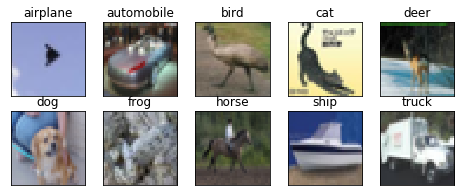

In [16]:
import matplotlib.pyplot as plt
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    #im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    ax.set_title(class_names[i])
    plt.imshow(features_idx[img_num,::])
plt.show()

In [17]:
print(np.shape(train_labels))
train_labels = keras.utils.to_categorical(train_labels,num_classes)
test_labels = keras.utils.to_categorical(test_labels,num_classes)
print(np.shape(train_labels))


(50000, 1)
(50000, 10)


In [18]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [8]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

model.fit(train_features,train_labels,
              batch_size=256,
              epochs=5,
              validation_data=(test_features, test_labels),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5


  256/50000 [..............................] - ETA: 4:42 - loss: 2.3075 - acc: 0.1133

  512/50000 [..............................] - ETA: 4:09 - loss: 2.3141 - acc: 0.0996

  768/50000 [..............................] - ETA: 3:54 - loss: 2.3083 - acc: 0.1003

 1024/50000 [..............................] - ETA: 3:46 - loss: 2.3064 - acc: 0.1064

 1280/50000 [..............................] - ETA: 3:39 - loss: 2.3054 - acc: 0.1133

 1536/50000 [..............................] - ETA: 3:35 - loss: 2.3016 - acc: 0.1172

 1792/50000 [>.............................] - ETA: 3:32 - loss: 2.2992 - acc: 0.1200

 2048/50000 [>.............................] - ETA: 3:29 - loss: 2.2981 - acc: 0.1196

 2304/50000 [>.............................] - ETA: 3:27 - loss: 2.2980 - acc: 0.1176

 2560/50000 [>.............................] - ETA: 3:24 - loss: 2.2971 - acc: 0.1191

 2816/50000 [>.............................] - ETA: 3:23 - loss: 2.2963 - acc: 0.1207

 3072/50000 [>.............................] - ETA: 3:22 - loss: 2.2960 - acc: 0.1198

 3328/50000 [>.............................] - ETA: 3:31 - loss: 2.2955 - acc: 0.1208

 3584/50000 [=>............................] - ETA: 3:45 - loss: 2.2959 - acc: 0.1164

 3840/50000 [=>............................] - ETA: 3:47 - loss: 2.2947 - acc: 0.1185

 4096/50000 [=>............................] - ETA: 3:48 - loss: 2.2935 - acc: 0.1191

 4352/50000 [=>............................] - ETA: 3:50 - loss: 2.2929 - acc: 0.1190

 4608/50000 [=>............................] - ETA: 3:50 - loss: 2.2916 - acc: 0.1211

 4864/50000 [=>............................] - ETA: 3:50 - loss: 2.2907 - acc: 0.1219

 5120/50000 [==>...........................] - ETA: 3:49 - loss: 2.2900 - acc: 0.1229

 5376/50000 [==>...........................] - ETA: 3:49 - loss: 2.2890 - acc: 0.1235

 5632/50000 [==>...........................] - ETA: 3:51 - loss: 2.2883 - acc: 0.1227

 5888/50000 [==>...........................] - ETA: 3:51 - loss: 2.2876 - acc: 0.1230

 6144/50000 [==>...........................] - ETA: 3:50 - loss: 2.2863 - acc: 0.1227

 6400/50000 [==>...........................] - ETA: 3:49 - loss: 2.2849 - acc: 0.1244

 6656/50000 [==>...........................] - ETA: 3:49 - loss: 2.2848 - acc: 0.1236

 6912/50000 [===>..........................] - ETA: 3:48 - loss: 2.2836 - acc: 0.1253

 7168/50000 [===>..........................] - ETA: 3:49 - loss: 2.2822 - acc: 0.1260

 7424/50000 [===>..........................] - ETA: 3:48 - loss: 2.2812 - acc: 0.1261

 7680/50000 [===>..........................] - ETA: 3:46 - loss: 2.2800 - acc: 0.1279

 7936/50000 [===>..........................] - ETA: 3:45 - loss: 2.2777 - acc: 0.1298

 8192/50000 [===>..........................] - ETA: 3:45 - loss: 2.2755 - acc: 0.1322

 8448/50000 [====>.........................] - ETA: 3:44 - loss: 2.2745 - acc: 0.1320

 8704/50000 [====>.........................] - ETA: 3:41 - loss: 2.2724 - acc: 0.1340

 8960/50000 [====>.........................] - ETA: 3:39 - loss: 2.2713 - acc: 0.1350

 9216/50000 [====>.........................] - ETA: 3:36 - loss: 2.2698 - acc: 0.1363

 9472/50000 [====>.........................] - ETA: 3:35 - loss: 2.2683 - acc: 0.1370

 9728/50000 [====>.........................] - ETA: 3:33 - loss: 2.2671 - acc: 0.1373

 9984/50000 [====>.........................] - ETA: 3:31 - loss: 2.2653 - acc: 0.1386

10240/50000 [=====>........................] - ETA: 3:29 - loss: 2.2630 - acc: 0.1420

10496/50000 [=====>........................] - ETA: 3:26 - loss: 2.2618 - acc: 0.1421

10752/50000 [=====>........................] - ETA: 3:25 - loss: 2.2600 - acc: 0.1439

11008/50000 [=====>........................] - ETA: 3:28 - loss: 2.2586 - acc: 0.1445

11264/50000 [=====>........................] - ETA: 3:26 - loss: 2.2568 - acc: 0.1458

11520/50000 [=====>........................] - ETA: 3:25 - loss: 2.2550 - acc: 0.1468

11776/50000 [======>.......................] - ETA: 3:23 - loss: 2.2533 - acc: 0.1478

12032/50000 [======>.......................] - ETA: 3:21 - loss: 2.2512 - acc: 0.1491

12288/50000 [======>.......................] - ETA: 3:19 - loss: 2.2491 - acc: 0.1501

12544/50000 [======>.......................] - ETA: 3:17 - loss: 2.2474 - acc: 0.1511

12800/50000 [======>.......................] - ETA: 3:15 - loss: 2.2454 - acc: 0.1520

13056/50000 [======>.......................] - ETA: 3:13 - loss: 2.2424 - acc: 0.1540

13312/50000 [======>.......................] - ETA: 3:11 - loss: 2.2388 - acc: 0.1562

13568/50000 [=======>......................] - ETA: 3:09 - loss: 2.2360 - acc: 0.1574

13824/50000 [=======>......................] - ETA: 3:08 - loss: 2.2344 - acc: 0.1584

14080/50000 [=======>......................] - ETA: 3:07 - loss: 2.2319 - acc: 0.1594

14336/50000 [=======>......................] - ETA: 3:05 - loss: 2.2292 - acc: 0.1612

14592/50000 [=======>......................] - ETA: 3:04 - loss: 2.2270 - acc: 0.1622

14848/50000 [=======>......................] - ETA: 3:03 - loss: 2.2253 - acc: 0.1631

15104/50000 [========>.....................] - ETA: 3:01 - loss: 2.2228 - acc: 0.1647

15360/50000 [========>.....................] - ETA: 3:00 - loss: 2.2212 - acc: 0.1658

15616/50000 [========>.....................] - ETA: 2:59 - loss: 2.2188 - acc: 0.1670

15872/50000 [========>.....................] - ETA: 2:57 - loss: 2.2163 - acc: 0.1682

16128/50000 [========>.....................] - ETA: 2:56 - loss: 2.2138 - acc: 0.1690

16384/50000 [========>.....................] - ETA: 2:55 - loss: 2.2116 - acc: 0.1697

16640/50000 [========>.....................] - ETA: 2:53 - loss: 2.2101 - acc: 0.1703

16896/50000 [=========>....................] - ETA: 2:52 - loss: 2.2078 - acc: 0.1716

17152/50000 [=========>....................] - ETA: 2:51 - loss: 2.2055 - acc: 0.1725

17408/50000 [=========>....................] - ETA: 2:49 - loss: 2.2035 - acc: 0.1743

17664/50000 [=========>....................] - ETA: 2:48 - loss: 2.2009 - acc: 0.1754

17920/50000 [=========>....................] - ETA: 2:46 - loss: 2.1993 - acc: 0.1763

18176/50000 [=========>....................] - ETA: 2:44 - loss: 2.1974 - acc: 0.1772

18432/50000 [==========>...................] - ETA: 2:43 - loss: 2.1955 - acc: 0.1781

18688/50000 [==========>...................] - ETA: 2:41 - loss: 2.1939 - acc: 0.1789

18944/50000 [==========>...................] - ETA: 2:40 - loss: 2.1927 - acc: 0.1801

19200/50000 [==========>...................] - ETA: 2:38 - loss: 2.1915 - acc: 0.1809

19456/50000 [==========>...................] - ETA: 2:37 - loss: 2.1897 - acc: 0.1816

19712/50000 [==========>...................] - ETA: 2:36 - loss: 2.1878 - acc: 0.1828

19968/50000 [==========>...................] - ETA: 2:35 - loss: 2.1859 - acc: 0.1837

20224/50000 [===========>..................] - ETA: 2:33 - loss: 2.1841 - acc: 0.1843

20480/50000 [===========>..................] - ETA: 2:31 - loss: 2.1816 - acc: 0.1854

20736/50000 [===========>..................] - ETA: 2:30 - loss: 2.1797 - acc: 0.1862

20992/50000 [===========>..................] - ETA: 2:29 - loss: 2.1774 - acc: 0.1872

21248/50000 [===========>..................] - ETA: 2:27 - loss: 2.1756 - acc: 0.1883

21504/50000 [===========>..................] - ETA: 2:27 - loss: 2.1750 - acc: 0.1886

21760/50000 [============>.................] - ETA: 2:26 - loss: 2.1748 - acc: 0.1886

22016/50000 [============>.................] - ETA: 2:25 - loss: 2.1735 - acc: 0.1891

22272/50000 [============>.................] - ETA: 2:24 - loss: 2.1717 - acc: 0.1902

22528/50000 [============>.................] - ETA: 2:22 - loss: 2.1702 - acc: 0.1909

22784/50000 [============>.................] - ETA: 2:21 - loss: 2.1688 - acc: 0.1916

23040/50000 [============>.................] - ETA: 2:20 - loss: 2.1677 - acc: 0.1922

23296/50000 [============>.................] - ETA: 2:19 - loss: 2.1664 - acc: 0.1929

23552/50000 [=============>................] - ETA: 2:18 - loss: 2.1645 - acc: 0.1933

23808/50000 [=============>................] - ETA: 2:16 - loss: 2.1630 - acc: 0.1938

24064/50000 [=============>................] - ETA: 2:15 - loss: 2.1620 - acc: 0.1942

24320/50000 [=============>................] - ETA: 2:14 - loss: 2.1604 - acc: 0.1951

24576/50000 [=============>................] - ETA: 2:13 - loss: 2.1592 - acc: 0.1954

24832/50000 [=============>................] - ETA: 2:11 - loss: 2.1580 - acc: 0.1959

25088/50000 [==============>...............] - ETA: 2:10 - loss: 2.1568 - acc: 0.1963

25344/50000 [==============>...............] - ETA: 2:09 - loss: 2.1555 - acc: 0.1972

25600/50000 [==============>...............] - ETA: 2:07 - loss: 2.1550 - acc: 0.1974

25856/50000 [==============>...............] - ETA: 2:06 - loss: 2.1534 - acc: 0.1981

26112/50000 [==============>...............] - ETA: 2:05 - loss: 2.1521 - acc: 0.1988

26368/50000 [==============>...............] - ETA: 2:03 - loss: 2.1506 - acc: 0.1997

26624/50000 [==============>...............] - ETA: 2:02 - loss: 2.1498 - acc: 0.2001

26880/50000 [===============>..............] - ETA: 2:00 - loss: 2.1486 - acc: 0.2007

27136/50000 [===============>..............] - ETA: 1:59 - loss: 2.1478 - acc: 0.2013

27392/50000 [===============>..............] - ETA: 1:58 - loss: 2.1466 - acc: 0.2017

27648/50000 [===============>..............] - ETA: 1:56 - loss: 2.1453 - acc: 0.2024

27904/50000 [===============>..............] - ETA: 1:55 - loss: 2.1444 - acc: 0.2026

28160/50000 [===============>..............] - ETA: 1:54 - loss: 2.1434 - acc: 0.2031

28416/50000 [================>.............] - ETA: 1:52 - loss: 2.1417 - acc: 0.2041

28672/50000 [================>.............] - ETA: 1:51 - loss: 2.1409 - acc: 0.2046

28928/50000 [================>.............] - ETA: 1:49 - loss: 2.1390 - acc: 0.2056

29184/50000 [================>.............] - ETA: 1:48 - loss: 2.1376 - acc: 0.2062

29440/50000 [================>.............] - ETA: 1:47 - loss: 2.1362 - acc: 0.2071

29696/50000 [================>.............] - ETA: 1:45 - loss: 2.1353 - acc: 0.2075

29952/50000 [================>.............] - ETA: 1:44 - loss: 2.1342 - acc: 0.2078

30208/50000 [=================>............] - ETA: 1:43 - loss: 2.1335 - acc: 0.2083

30464/50000 [=================>............] - ETA: 1:41 - loss: 2.1322 - acc: 0.2086

30720/50000 [=================>............] - ETA: 1:40 - loss: 2.1319 - acc: 0.2091

30976/50000 [=================>............] - ETA: 1:39 - loss: 2.1314 - acc: 0.2095

31232/50000 [=================>............] - ETA: 1:37 - loss: 2.1303 - acc: 0.2099

31488/50000 [=================>............] - ETA: 1:36 - loss: 2.1289 - acc: 0.2106

31744/50000 [==================>...........] - ETA: 1:35 - loss: 2.1279 - acc: 0.2110

32000/50000 [==================>...........] - ETA: 1:33 - loss: 2.1270 - acc: 0.2112

32256/50000 [==================>...........] - ETA: 1:32 - loss: 2.1261 - acc: 0.2120

32512/50000 [==================>...........] - ETA: 1:31 - loss: 2.1251 - acc: 0.2126

32768/50000 [==================>...........] - ETA: 1:29 - loss: 2.1246 - acc: 0.2129

33024/50000 [==================>...........] - ETA: 1:28 - loss: 2.1234 - acc: 0.2133

33280/50000 [==================>...........] - ETA: 1:27 - loss: 2.1221 - acc: 0.2137

33536/50000 [===================>..........] - ETA: 1:25 - loss: 2.1207 - acc: 0.2139

33792/50000 [===================>..........] - ETA: 1:24 - loss: 2.1196 - acc: 0.2140

34048/50000 [===================>..........] - ETA: 1:22 - loss: 2.1180 - acc: 0.2147

34304/50000 [===================>..........] - ETA: 1:21 - loss: 2.1173 - acc: 0.2150

34560/50000 [===================>..........] - ETA: 1:20 - loss: 2.1166 - acc: 0.2157

34816/50000 [===================>..........] - ETA: 1:19 - loss: 2.1155 - acc: 0.2161

35072/50000 [====================>.........] - ETA: 1:17 - loss: 2.1146 - acc: 0.2164

35328/50000 [====================>.........] - ETA: 1:16 - loss: 2.1138 - acc: 0.2167

35584/50000 [====================>.........] - ETA: 1:15 - loss: 2.1126 - acc: 0.2176

35840/50000 [====================>.........] - ETA: 1:13 - loss: 2.1115 - acc: 0.2179

36096/50000 [====================>.........] - ETA: 1:12 - loss: 2.1109 - acc: 0.2182

36352/50000 [====================>.........] - ETA: 1:11 - loss: 2.1100 - acc: 0.2184

36608/50000 [====================>.........] - ETA: 1:09 - loss: 2.1094 - acc: 0.2187

36864/50000 [=====================>........] - ETA: 1:08 - loss: 2.1081 - acc: 0.2192

37120/50000 [=====================>........] - ETA: 1:06 - loss: 2.1070 - acc: 0.2197

37376/50000 [=====================>........] - ETA: 1:05 - loss: 2.1062 - acc: 0.2198

37632/50000 [=====================>........] - ETA: 1:04 - loss: 2.1054 - acc: 0.2202

37888/50000 [=====================>........] - ETA: 1:03 - loss: 2.1042 - acc: 0.2206

38144/50000 [=====================>........] - ETA: 1:01 - loss: 2.1032 - acc: 0.2211

38400/50000 [======================>.......] - ETA: 1:00 - loss: 2.1025 - acc: 0.2215

38656/50000 [======================>.......] - ETA: 59s - loss: 2.1013 - acc: 0.2219 

38912/50000 [======================>.......] - ETA: 57s - loss: 2.0998 - acc: 0.2225

39168/50000 [======================>.......] - ETA: 56s - loss: 2.0987 - acc: 0.2229

39424/50000 [======================>.......] - ETA: 55s - loss: 2.0977 - acc: 0.2233

39680/50000 [======================>.......] - ETA: 53s - loss: 2.0969 - acc: 0.2237

39936/50000 [======================>.......] - ETA: 52s - loss: 2.0955 - acc: 0.2241

40192/50000 [=======================>......] - ETA: 51s - loss: 2.0950 - acc: 0.2245

40448/50000 [=======================>......] - ETA: 49s - loss: 2.0941 - acc: 0.2248

40704/50000 [=======================>......] - ETA: 48s - loss: 2.0928 - acc: 0.2255

40960/50000 [=======================>......] - ETA: 47s - loss: 2.0921 - acc: 0.2259

41216/50000 [=======================>......] - ETA: 45s - loss: 2.0913 - acc: 0.2260

41472/50000 [=======================>......] - ETA: 44s - loss: 2.0902 - acc: 0.2266

41728/50000 [========================>.....] - ETA: 43s - loss: 2.0893 - acc: 0.2272

41984/50000 [========================>.....] - ETA: 41s - loss: 2.0881 - acc: 0.2279

42240/50000 [========================>.....] - ETA: 40s - loss: 2.0871 - acc: 0.2282

42496/50000 [========================>.....] - ETA: 39s - loss: 2.0862 - acc: 0.2288

42752/50000 [========================>.....] - ETA: 37s - loss: 2.0852 - acc: 0.2294

43008/50000 [========================>.....] - ETA: 36s - loss: 2.0838 - acc: 0.2303

43264/50000 [========================>.....] - ETA: 35s - loss: 2.0824 - acc: 0.2312

43520/50000 [=========================>....] - ETA: 33s - loss: 2.0817 - acc: 0.2317

43776/50000 [=========================>....] - ETA: 32s - loss: 2.0808 - acc: 0.2322

44032/50000 [=========================>....] - ETA: 31s - loss: 2.0802 - acc: 0.2326

44288/50000 [=========================>....] - ETA: 29s - loss: 2.0791 - acc: 0.2330

44544/50000 [=========================>....] - ETA: 28s - loss: 2.0782 - acc: 0.2334

44800/50000 [=========================>....] - ETA: 27s - loss: 2.0772 - acc: 0.2337

45056/50000 [==========================>...] - ETA: 25s - loss: 2.0764 - acc: 0.2341

45312/50000 [==========================>...] - ETA: 24s - loss: 2.0754 - acc: 0.2345

45568/50000 [==========================>...] - ETA: 23s - loss: 2.0744 - acc: 0.2351

45824/50000 [==========================>...] - ETA: 21s - loss: 2.0734 - acc: 0.2355

46080/50000 [==========================>...] - ETA: 20s - loss: 2.0721 - acc: 0.2363

46336/50000 [==========================>...] - ETA: 19s - loss: 2.0709 - acc: 0.2369

46592/50000 [==========================>...] - ETA: 17s - loss: 2.0692 - acc: 0.2377

46848/50000 [===========================>..] - ETA: 16s - loss: 2.0684 - acc: 0.2383

47104/50000 [===========================>..] - ETA: 15s - loss: 2.0674 - acc: 0.2385

47360/50000 [===========================>..] - ETA: 13s - loss: 2.0671 - acc: 0.2386

47616/50000 [===========================>..] - ETA: 12s - loss: 2.0660 - acc: 0.2390

47872/50000 [===========================>..] - ETA: 11s - loss: 2.0652 - acc: 0.2392

48128/50000 [===========================>..] - ETA: 9s - loss: 2.0642 - acc: 0.2397 

48384/50000 [============================>.] - ETA: 8s - loss: 2.0633 - acc: 0.2401

48640/50000 [============================>.] - ETA: 7s - loss: 2.0625 - acc: 0.2405

48896/50000 [============================>.] - ETA: 5s - loss: 2.0617 - acc: 0.2409

49152/50000 [============================>.] - ETA: 4s - loss: 2.0606 - acc: 0.2415

49408/50000 [============================>.] - ETA: 3s - loss: 2.0599 - acc: 0.2419

49664/50000 [============================>.] - ETA: 1s - loss: 2.0594 - acc: 0.2421

49920/50000 [============================>.] - ETA: 0s - loss: 2.0587 - acc: 0.2424

50000/50000 [==============================] - 277s 6ms/step - loss: 2.0583 - acc: 0.2426 - val_loss: 1.8313 - val_acc: 0.3655


Epoch 2/5


  256/50000 [..............................] - ETA: 4:04 - loss: 1.8487 - acc: 0.3125

  512/50000 [..............................] - ETA: 4:02 - loss: 1.8390 - acc: 0.3457

  768/50000 [..............................] - ETA: 4:01 - loss: 1.8745 - acc: 0.3307

 1024/50000 [..............................] - ETA: 4:01 - loss: 1.8714 - acc: 0.3252

 1280/50000 [..............................] - ETA: 4:00 - loss: 1.8591 - acc: 0.3336

 1536/50000 [..............................] - ETA: 3:59 - loss: 1.8442 - acc: 0.3405

 1792/50000 [>.............................] - ETA: 3:58 - loss: 1.8532 - acc: 0.3365

 2048/50000 [>.............................] - ETA: 3:56 - loss: 1.8582 - acc: 0.3369

 2304/50000 [>.............................] - ETA: 3:55 - loss: 1.8643 - acc: 0.3333

 2560/50000 [>.............................] - ETA: 3:56 - loss: 1.8621 - acc: 0.3336

 2816/50000 [>.............................] - ETA: 3:57 - loss: 1.8587 - acc: 0.3359

 3072/50000 [>.............................] - ETA: 3:56 - loss: 1.8572 - acc: 0.3327

 3328/50000 [>.............................] - ETA: 3:54 - loss: 1.8620 - acc: 0.3320

 3584/50000 [=>............................] - ETA: 3:53 - loss: 1.8634 - acc: 0.3301

 3840/50000 [=>............................] - ETA: 3:51 - loss: 1.8638 - acc: 0.3302

 4096/50000 [=>............................] - ETA: 3:49 - loss: 1.8600 - acc: 0.3333

 4352/50000 [=>............................] - ETA: 3:49 - loss: 1.8670 - acc: 0.3309

 4608/50000 [=>............................] - ETA: 3:49 - loss: 1.8698 - acc: 0.3301

 4864/50000 [=>............................] - ETA: 3:50 - loss: 1.8741 - acc: 0.3287

 5120/50000 [==>...........................] - ETA: 3:49 - loss: 1.8762 - acc: 0.3281

 5376/50000 [==>...........................] - ETA: 3:49 - loss: 1.8765 - acc: 0.3257

 5632/50000 [==>...........................] - ETA: 3:49 - loss: 1.8760 - acc: 0.3260

 5888/50000 [==>...........................] - ETA: 3:48 - loss: 1.8781 - acc: 0.3256

 6144/50000 [==>...........................] - ETA: 3:47 - loss: 1.8787 - acc: 0.3244

 6400/50000 [==>...........................] - ETA: 3:46 - loss: 1.8762 - acc: 0.3256

 6656/50000 [==>...........................] - ETA: 3:45 - loss: 1.8758 - acc: 0.3265

 6912/50000 [===>..........................] - ETA: 3:43 - loss: 1.8730 - acc: 0.3283

 7168/50000 [===>..........................] - ETA: 3:42 - loss: 1.8728 - acc: 0.3280

 7424/50000 [===>..........................] - ETA: 3:40 - loss: 1.8723 - acc: 0.3276

 7680/50000 [===>..........................] - ETA: 3:40 - loss: 1.8697 - acc: 0.3284

 7936/50000 [===>..........................] - ETA: 3:39 - loss: 1.8699 - acc: 0.3261

 8192/50000 [===>..........................] - ETA: 3:38 - loss: 1.8686 - acc: 0.3270

 8448/50000 [====>.........................] - ETA: 3:37 - loss: 1.8682 - acc: 0.3275

 8704/50000 [====>.........................] - ETA: 3:35 - loss: 1.8660 - acc: 0.3298

 8960/50000 [====>.........................] - ETA: 3:33 - loss: 1.8612 - acc: 0.3310

 9216/50000 [====>.........................] - ETA: 3:32 - loss: 1.8585 - acc: 0.3325

 9472/50000 [====>.........................] - ETA: 3:31 - loss: 1.8567 - acc: 0.3329

 9728/50000 [====>.........................] - ETA: 3:29 - loss: 1.8565 - acc: 0.3325

 9984/50000 [====>.........................] - ETA: 3:28 - loss: 1.8562 - acc: 0.3327

10240/50000 [=====>........................] - ETA: 3:27 - loss: 1.8589 - acc: 0.3312

10496/50000 [=====>........................] - ETA: 3:25 - loss: 1.8593 - acc: 0.3309

10752/50000 [=====>........................] - ETA: 3:24 - loss: 1.8611 - acc: 0.3299

11008/50000 [=====>........................] - ETA: 3:22 - loss: 1.8615 - acc: 0.3311

11264/50000 [=====>........................] - ETA: 3:21 - loss: 1.8598 - acc: 0.3320

11520/50000 [=====>........................] - ETA: 3:19 - loss: 1.8585 - acc: 0.3329

11776/50000 [======>.......................] - ETA: 3:17 - loss: 1.8574 - acc: 0.3336

12032/50000 [======>.......................] - ETA: 3:16 - loss: 1.8557 - acc: 0.3339

12288/50000 [======>.......................] - ETA: 3:14 - loss: 1.8541 - acc: 0.3347

12544/50000 [======>.......................] - ETA: 3:13 - loss: 1.8528 - acc: 0.3350

12800/50000 [======>.......................] - ETA: 3:12 - loss: 1.8517 - acc: 0.3355

13056/50000 [======>.......................] - ETA: 3:10 - loss: 1.8498 - acc: 0.3358

13312/50000 [======>.......................] - ETA: 3:09 - loss: 1.8497 - acc: 0.3362

13568/50000 [=======>......................] - ETA: 3:07 - loss: 1.8480 - acc: 0.3362

13824/50000 [=======>......................] - ETA: 3:07 - loss: 1.8468 - acc: 0.3361

14080/50000 [=======>......................] - ETA: 3:05 - loss: 1.8456 - acc: 0.3369

14336/50000 [=======>......................] - ETA: 3:04 - loss: 1.8453 - acc: 0.3366

14592/50000 [=======>......................] - ETA: 3:02 - loss: 1.8462 - acc: 0.3362

14848/50000 [=======>......................] - ETA: 3:01 - loss: 1.8445 - acc: 0.3366

15104/50000 [========>.....................] - ETA: 3:00 - loss: 1.8426 - acc: 0.3370

15360/50000 [========>.....................] - ETA: 2:58 - loss: 1.8419 - acc: 0.3371

15616/50000 [========>.....................] - ETA: 2:57 - loss: 1.8424 - acc: 0.3370

15872/50000 [========>.....................] - ETA: 2:55 - loss: 1.8425 - acc: 0.3364

16128/50000 [========>.....................] - ETA: 2:54 - loss: 1.8418 - acc: 0.3365

16384/50000 [========>.....................] - ETA: 2:52 - loss: 1.8423 - acc: 0.3365

16640/50000 [========>.....................] - ETA: 2:51 - loss: 1.8413 - acc: 0.3372

16896/50000 [=========>....................] - ETA: 2:50 - loss: 1.8415 - acc: 0.3369

17152/50000 [=========>....................] - ETA: 2:48 - loss: 1.8429 - acc: 0.3364

17408/50000 [=========>....................] - ETA: 2:47 - loss: 1.8420 - acc: 0.3367

17664/50000 [=========>....................] - ETA: 2:46 - loss: 1.8408 - acc: 0.3374

17920/50000 [=========>....................] - ETA: 2:44 - loss: 1.8411 - acc: 0.3373

18176/50000 [=========>....................] - ETA: 2:43 - loss: 1.8398 - acc: 0.3372

18432/50000 [==========>...................] - ETA: 2:41 - loss: 1.8380 - acc: 0.3377

18688/50000 [==========>...................] - ETA: 2:40 - loss: 1.8385 - acc: 0.3376

18944/50000 [==========>...................] - ETA: 2:39 - loss: 1.8375 - acc: 0.3375

19200/50000 [==========>...................] - ETA: 2:37 - loss: 1.8367 - acc: 0.3377

19456/50000 [==========>...................] - ETA: 2:36 - loss: 1.8364 - acc: 0.3381

19712/50000 [==========>...................] - ETA: 2:35 - loss: 1.8355 - acc: 0.3382

19968/50000 [==========>...................] - ETA: 2:33 - loss: 1.8356 - acc: 0.3382

20224/50000 [===========>..................] - ETA: 2:32 - loss: 1.8356 - acc: 0.3380

20480/50000 [===========>..................] - ETA: 2:31 - loss: 1.8355 - acc: 0.3376

20736/50000 [===========>..................] - ETA: 2:29 - loss: 1.8349 - acc: 0.3373

20992/50000 [===========>..................] - ETA: 2:28 - loss: 1.8341 - acc: 0.3379

21248/50000 [===========>..................] - ETA: 2:27 - loss: 1.8332 - acc: 0.3388

21504/50000 [===========>..................] - ETA: 2:25 - loss: 1.8337 - acc: 0.3390

21760/50000 [============>.................] - ETA: 2:24 - loss: 1.8329 - acc: 0.3391

22016/50000 [============>.................] - ETA: 2:23 - loss: 1.8320 - acc: 0.3392

22272/50000 [============>.................] - ETA: 2:21 - loss: 1.8324 - acc: 0.3389

22528/50000 [============>.................] - ETA: 2:20 - loss: 1.8314 - acc: 0.3395

22784/50000 [============>.................] - ETA: 2:18 - loss: 1.8312 - acc: 0.3399

23040/50000 [============>.................] - ETA: 2:17 - loss: 1.8302 - acc: 0.3402

23296/50000 [============>.................] - ETA: 2:16 - loss: 1.8302 - acc: 0.3402

23552/50000 [=============>................] - ETA: 2:14 - loss: 1.8306 - acc: 0.3400

23808/50000 [=============>................] - ETA: 2:13 - loss: 1.8313 - acc: 0.3399

24064/50000 [=============>................] - ETA: 2:12 - loss: 1.8303 - acc: 0.3411

24320/50000 [=============>................] - ETA: 2:11 - loss: 1.8298 - acc: 0.3411

24576/50000 [=============>................] - ETA: 2:09 - loss: 1.8296 - acc: 0.3414

24832/50000 [=============>................] - ETA: 2:08 - loss: 1.8296 - acc: 0.3417

25088/50000 [==============>...............] - ETA: 2:07 - loss: 1.8288 - acc: 0.3420

25344/50000 [==============>...............] - ETA: 2:05 - loss: 1.8290 - acc: 0.3419

25600/50000 [==============>...............] - ETA: 2:04 - loss: 1.8284 - acc: 0.3419

25856/50000 [==============>...............] - ETA: 2:03 - loss: 1.8263 - acc: 0.3426

26112/50000 [==============>...............] - ETA: 2:02 - loss: 1.8254 - acc: 0.3428

26368/50000 [==============>...............] - ETA: 2:00 - loss: 1.8248 - acc: 0.3429

26624/50000 [==============>...............] - ETA: 1:59 - loss: 1.8234 - acc: 0.3434

26880/50000 [===============>..............] - ETA: 1:58 - loss: 1.8225 - acc: 0.3433

27136/50000 [===============>..............] - ETA: 1:56 - loss: 1.8221 - acc: 0.3433

27392/50000 [===============>..............] - ETA: 1:55 - loss: 1.8213 - acc: 0.3437

27648/50000 [===============>..............] - ETA: 1:54 - loss: 1.8206 - acc: 0.3438

27904/50000 [===============>..............] - ETA: 1:52 - loss: 1.8208 - acc: 0.3436

28160/50000 [===============>..............] - ETA: 1:51 - loss: 1.8203 - acc: 0.3439

28416/50000 [================>.............] - ETA: 1:50 - loss: 1.8199 - acc: 0.3436

28672/50000 [================>.............] - ETA: 1:48 - loss: 1.8192 - acc: 0.3437

28928/50000 [================>.............] - ETA: 1:47 - loss: 1.8184 - acc: 0.3440

29184/50000 [================>.............] - ETA: 1:46 - loss: 1.8181 - acc: 0.3440

29440/50000 [================>.............] - ETA: 1:44 - loss: 1.8175 - acc: 0.3443

29696/50000 [================>.............] - ETA: 1:43 - loss: 1.8173 - acc: 0.3440

29952/50000 [================>.............] - ETA: 1:42 - loss: 1.8168 - acc: 0.3443

30208/50000 [=================>............] - ETA: 1:40 - loss: 1.8165 - acc: 0.3442

30464/50000 [=================>............] - ETA: 1:39 - loss: 1.8171 - acc: 0.3440

30720/50000 [=================>............] - ETA: 1:38 - loss: 1.8163 - acc: 0.3443

30976/50000 [=================>............] - ETA: 1:36 - loss: 1.8156 - acc: 0.3446

31232/50000 [=================>............] - ETA: 1:35 - loss: 1.8150 - acc: 0.3449

31488/50000 [=================>............] - ETA: 1:34 - loss: 1.8146 - acc: 0.3450

31744/50000 [==================>...........] - ETA: 1:33 - loss: 1.8146 - acc: 0.3449

32000/50000 [==================>...........] - ETA: 1:31 - loss: 1.8141 - acc: 0.3450

32256/50000 [==================>...........] - ETA: 1:30 - loss: 1.8135 - acc: 0.3453

32512/50000 [==================>...........] - ETA: 1:29 - loss: 1.8126 - acc: 0.3456

32768/50000 [==================>...........] - ETA: 1:27 - loss: 1.8119 - acc: 0.3456

33024/50000 [==================>...........] - ETA: 1:26 - loss: 1.8114 - acc: 0.3456

33280/50000 [==================>...........] - ETA: 1:25 - loss: 1.8109 - acc: 0.3458

33536/50000 [===================>..........] - ETA: 1:23 - loss: 1.8110 - acc: 0.3460

33792/50000 [===================>..........] - ETA: 1:22 - loss: 1.8109 - acc: 0.3460

34048/50000 [===================>..........] - ETA: 1:21 - loss: 1.8110 - acc: 0.3457

34304/50000 [===================>..........] - ETA: 1:19 - loss: 1.8104 - acc: 0.3459

34560/50000 [===================>..........] - ETA: 1:18 - loss: 1.8100 - acc: 0.3459

34816/50000 [===================>..........] - ETA: 1:17 - loss: 1.8093 - acc: 0.3462

35072/50000 [====================>.........] - ETA: 1:16 - loss: 1.8089 - acc: 0.3461

35328/50000 [====================>.........] - ETA: 1:14 - loss: 1.8080 - acc: 0.3464

35584/50000 [====================>.........] - ETA: 1:13 - loss: 1.8074 - acc: 0.3466

35840/50000 [====================>.........] - ETA: 1:12 - loss: 1.8067 - acc: 0.3467

36096/50000 [====================>.........] - ETA: 1:10 - loss: 1.8065 - acc: 0.3468

36352/50000 [====================>.........] - ETA: 1:09 - loss: 1.8066 - acc: 0.3468

36608/50000 [====================>.........] - ETA: 1:08 - loss: 1.8067 - acc: 0.3468

36864/50000 [=====================>........] - ETA: 1:06 - loss: 1.8068 - acc: 0.3470

37120/50000 [=====================>........] - ETA: 1:05 - loss: 1.8064 - acc: 0.3471

37376/50000 [=====================>........] - ETA: 1:03 - loss: 1.8061 - acc: 0.3473

37632/50000 [=====================>........] - ETA: 1:02 - loss: 1.8059 - acc: 0.3473

37888/50000 [=====================>........] - ETA: 1:01 - loss: 1.8054 - acc: 0.3474

38144/50000 [=====================>........] - ETA: 59s - loss: 1.8051 - acc: 0.3473 

38400/50000 [======================>.......] - ETA: 58s - loss: 1.8046 - acc: 0.3476

38656/50000 [======================>.......] - ETA: 57s - loss: 1.8039 - acc: 0.3478

38912/50000 [======================>.......] - ETA: 55s - loss: 1.8040 - acc: 0.3477

39168/50000 [======================>.......] - ETA: 54s - loss: 1.8033 - acc: 0.3479

39424/50000 [======================>.......] - ETA: 53s - loss: 1.8029 - acc: 0.3479

39680/50000 [======================>.......] - ETA: 51s - loss: 1.8026 - acc: 0.3480

39936/50000 [======================>.......] - ETA: 50s - loss: 1.8024 - acc: 0.3481

40192/50000 [=======================>......] - ETA: 49s - loss: 1.8016 - acc: 0.3484

40448/50000 [=======================>......] - ETA: 47s - loss: 1.8010 - acc: 0.3486

40704/50000 [=======================>......] - ETA: 46s - loss: 1.8012 - acc: 0.3482

40960/50000 [=======================>......] - ETA: 45s - loss: 1.8009 - acc: 0.3484

41216/50000 [=======================>......] - ETA: 43s - loss: 1.8006 - acc: 0.3486

41472/50000 [=======================>......] - ETA: 42s - loss: 1.8001 - acc: 0.3489

41728/50000 [========================>.....] - ETA: 41s - loss: 1.7991 - acc: 0.3493

41984/50000 [========================>.....] - ETA: 39s - loss: 1.7992 - acc: 0.3494

42240/50000 [========================>.....] - ETA: 38s - loss: 1.7996 - acc: 0.3491

42496/50000 [========================>.....] - ETA: 37s - loss: 1.7994 - acc: 0.3491

42752/50000 [========================>.....] - ETA: 36s - loss: 1.7989 - acc: 0.3492

43008/50000 [========================>.....] - ETA: 34s - loss: 1.7986 - acc: 0.3494

43264/50000 [========================>.....] - ETA: 33s - loss: 1.7980 - acc: 0.3496

43520/50000 [=========================>....] - ETA: 32s - loss: 1.7977 - acc: 0.3496

43776/50000 [=========================>....] - ETA: 30s - loss: 1.7976 - acc: 0.3498

44032/50000 [=========================>....] - ETA: 29s - loss: 1.7974 - acc: 0.3500

44288/50000 [=========================>....] - ETA: 28s - loss: 1.7970 - acc: 0.3501

44544/50000 [=========================>....] - ETA: 26s - loss: 1.7965 - acc: 0.3500

44800/50000 [=========================>....] - ETA: 25s - loss: 1.7965 - acc: 0.3500

45056/50000 [==========================>...] - ETA: 24s - loss: 1.7967 - acc: 0.3499

45312/50000 [==========================>...] - ETA: 23s - loss: 1.7960 - acc: 0.3503

45568/50000 [==========================>...] - ETA: 21s - loss: 1.7956 - acc: 0.3505

45824/50000 [==========================>...] - ETA: 20s - loss: 1.7953 - acc: 0.3506

46080/50000 [==========================>...] - ETA: 19s - loss: 1.7954 - acc: 0.3507

46336/50000 [==========================>...] - ETA: 18s - loss: 1.7950 - acc: 0.3508

46592/50000 [==========================>...] - ETA: 16s - loss: 1.7945 - acc: 0.3511

46848/50000 [===========================>..] - ETA: 15s - loss: 1.7948 - acc: 0.3511

47104/50000 [===========================>..] - ETA: 14s - loss: 1.7945 - acc: 0.3512

47360/50000 [===========================>..] - ETA: 12s - loss: 1.7944 - acc: 0.3513

47616/50000 [===========================>..] - ETA: 11s - loss: 1.7934 - acc: 0.3517

47872/50000 [===========================>..] - ETA: 10s - loss: 1.7931 - acc: 0.3519

48128/50000 [===========================>..] - ETA: 9s - loss: 1.7929 - acc: 0.3517 

48384/50000 [============================>.] - ETA: 7s - loss: 1.7926 - acc: 0.3516

48640/50000 [============================>.] - ETA: 6s - loss: 1.7923 - acc: 0.3518

48896/50000 [============================>.] - ETA: 5s - loss: 1.7916 - acc: 0.3520

49152/50000 [============================>.] - ETA: 4s - loss: 1.7914 - acc: 0.3521

49408/50000 [============================>.] - ETA: 2s - loss: 1.7913 - acc: 0.3521

49664/50000 [============================>.] - ETA: 1s - loss: 1.7911 - acc: 0.3522

49920/50000 [============================>.] - ETA: 0s - loss: 1.7907 - acc: 0.3525

50000/50000 [==============================] - 259s 5ms/step - loss: 1.7906 - acc: 0.3526 - val_loss: 1.7584 - val_acc: 0.3710


Epoch 3/5


  256/50000 [..............................] - ETA: 4:41 - loss: 1.8393 - acc: 0.2773

  512/50000 [..............................] - ETA: 4:44 - loss: 1.7473 - acc: 0.3516

  768/50000 [..............................] - ETA: 4:40 - loss: 1.7083 - acc: 0.3763

 1024/50000 [..............................] - ETA: 4:46 - loss: 1.6959 - acc: 0.3916

 1280/50000 [..............................] - ETA: 4:54 - loss: 1.6944 - acc: 0.3891

 1536/50000 [..............................] - ETA: 5:10 - loss: 1.7053 - acc: 0.3815

 1792/50000 [>.............................] - ETA: 5:15 - loss: 1.6948 - acc: 0.3850

 2048/50000 [>.............................] - ETA: 5:18 - loss: 1.6931 - acc: 0.3838

 2304/50000 [>.............................] - ETA: 5:11 - loss: 1.6962 - acc: 0.3898

 2560/50000 [>.............................] - ETA: 4:59 - loss: 1.6920 - acc: 0.3937

 2816/50000 [>.............................] - ETA: 4:51 - loss: 1.7013 - acc: 0.3906

 3072/50000 [>.............................] - ETA: 4:43 - loss: 1.6996 - acc: 0.3913

 3328/50000 [>.............................] - ETA: 4:36 - loss: 1.6989 - acc: 0.3873

 3584/50000 [=>............................] - ETA: 4:30 - loss: 1.6985 - acc: 0.3870

 3840/50000 [=>............................] - ETA: 4:26 - loss: 1.6991 - acc: 0.3872

 4096/50000 [=>............................] - ETA: 4:22 - loss: 1.6966 - acc: 0.3879

 4352/50000 [=>............................] - ETA: 4:20 - loss: 1.7037 - acc: 0.3860

 4608/50000 [=>............................] - ETA: 4:19 - loss: 1.7080 - acc: 0.3859

 4864/50000 [=>............................] - ETA: 4:19 - loss: 1.7070 - acc: 0.3838

 5120/50000 [==>...........................] - ETA: 4:19 - loss: 1.7059 - acc: 0.3852

 5376/50000 [==>...........................] - ETA: 4:15 - loss: 1.7053 - acc: 0.3849

 5632/50000 [==>...........................] - ETA: 4:12 - loss: 1.7041 - acc: 0.3860

 5888/50000 [==>...........................] - ETA: 4:11 - loss: 1.7059 - acc: 0.3871

 6144/50000 [==>...........................] - ETA: 4:07 - loss: 1.7045 - acc: 0.3879

 6400/50000 [==>...........................] - ETA: 4:04 - loss: 1.7074 - acc: 0.3875

 6656/50000 [==>...........................] - ETA: 4:04 - loss: 1.7063 - acc: 0.3884

 6912/50000 [===>..........................] - ETA: 4:03 - loss: 1.7047 - acc: 0.3890

 7168/50000 [===>..........................] - ETA: 4:03 - loss: 1.7062 - acc: 0.3877

 7424/50000 [===>..........................] - ETA: 4:00 - loss: 1.7075 - acc: 0.3866

 7680/50000 [===>..........................] - ETA: 4:00 - loss: 1.7095 - acc: 0.3850

 7936/50000 [===>..........................] - ETA: 4:01 - loss: 1.7126 - acc: 0.3841

 8192/50000 [===>..........................] - ETA: 3:59 - loss: 1.7112 - acc: 0.3845

 8448/50000 [====>.........................] - ETA: 3:56 - loss: 1.7083 - acc: 0.3871

 8704/50000 [====>.........................] - ETA: 3:55 - loss: 1.7062 - acc: 0.3867

 8960/50000 [====>.........................] - ETA: 3:52 - loss: 1.7064 - acc: 0.3868

 9216/50000 [====>.........................] - ETA: 3:49 - loss: 1.7071 - acc: 0.3873

 9472/50000 [====>.........................] - ETA: 3:46 - loss: 1.7079 - acc: 0.3875

 9728/50000 [====>.........................] - ETA: 3:43 - loss: 1.7101 - acc: 0.3861

 9984/50000 [====>.........................] - ETA: 3:40 - loss: 1.7102 - acc: 0.3851

10240/50000 [=====>........................] - ETA: 3:38 - loss: 1.7096 - acc: 0.3851

10496/50000 [=====>........................] - ETA: 3:35 - loss: 1.7111 - acc: 0.3850

10752/50000 [=====>........................] - ETA: 3:33 - loss: 1.7103 - acc: 0.3853

11008/50000 [=====>........................] - ETA: 3:31 - loss: 1.7107 - acc: 0.3856

11264/50000 [=====>........................] - ETA: 3:29 - loss: 1.7111 - acc: 0.3856

11520/50000 [=====>........................] - ETA: 3:26 - loss: 1.7130 - acc: 0.3840

11776/50000 [======>.......................] - ETA: 3:24 - loss: 1.7147 - acc: 0.3837

12032/50000 [======>.......................] - ETA: 3:22 - loss: 1.7148 - acc: 0.3839

12288/50000 [======>.......................] - ETA: 3:20 - loss: 1.7142 - acc: 0.3840

12544/50000 [======>.......................] - ETA: 3:18 - loss: 1.7125 - acc: 0.3845

12800/50000 [======>.......................] - ETA: 3:16 - loss: 1.7125 - acc: 0.3836

13056/50000 [======>.......................] - ETA: 3:14 - loss: 1.7125 - acc: 0.3833

13312/50000 [======>.......................] - ETA: 3:12 - loss: 1.7115 - acc: 0.3839

13568/50000 [=======>......................] - ETA: 3:10 - loss: 1.7107 - acc: 0.3839

13824/50000 [=======>......................] - ETA: 3:08 - loss: 1.7095 - acc: 0.3847

14080/50000 [=======>......................] - ETA: 3:06 - loss: 1.7088 - acc: 0.3849

14336/50000 [=======>......................] - ETA: 3:04 - loss: 1.7074 - acc: 0.3864

14592/50000 [=======>......................] - ETA: 3:02 - loss: 1.7087 - acc: 0.3856

14848/50000 [=======>......................] - ETA: 3:00 - loss: 1.7065 - acc: 0.3865

15104/50000 [========>.....................] - ETA: 2:58 - loss: 1.7073 - acc: 0.3861

15360/50000 [========>.....................] - ETA: 2:57 - loss: 1.7072 - acc: 0.3858

15616/50000 [========>.....................] - ETA: 2:55 - loss: 1.7068 - acc: 0.3861

15872/50000 [========>.....................] - ETA: 2:54 - loss: 1.7052 - acc: 0.3863

16128/50000 [========>.....................] - ETA: 2:52 - loss: 1.7041 - acc: 0.3862

16384/50000 [========>.....................] - ETA: 2:51 - loss: 1.7060 - acc: 0.3858

16640/50000 [========>.....................] - ETA: 2:49 - loss: 1.7055 - acc: 0.3856

16896/50000 [=========>....................] - ETA: 2:48 - loss: 1.7052 - acc: 0.3861

17152/50000 [=========>....................] - ETA: 2:46 - loss: 1.7045 - acc: 0.3860

17408/50000 [=========>....................] - ETA: 2:45 - loss: 1.7036 - acc: 0.3861

17664/50000 [=========>....................] - ETA: 2:44 - loss: 1.7037 - acc: 0.3855

17920/50000 [=========>....................] - ETA: 2:42 - loss: 1.7034 - acc: 0.3853

18176/50000 [=========>....................] - ETA: 2:41 - loss: 1.7029 - acc: 0.3852

18432/50000 [==========>...................] - ETA: 2:41 - loss: 1.7024 - acc: 0.3849

18688/50000 [==========>...................] - ETA: 2:39 - loss: 1.7030 - acc: 0.3849

18944/50000 [==========>...................] - ETA: 2:38 - loss: 1.7032 - acc: 0.3850

19200/50000 [==========>...................] - ETA: 2:36 - loss: 1.7028 - acc: 0.3854

19456/50000 [==========>...................] - ETA: 2:35 - loss: 1.7021 - acc: 0.3856

19712/50000 [==========>...................] - ETA: 2:33 - loss: 1.7022 - acc: 0.3855

19968/50000 [==========>...................] - ETA: 2:32 - loss: 1.7026 - acc: 0.3852

20224/50000 [===========>..................] - ETA: 2:31 - loss: 1.7024 - acc: 0.3852

20480/50000 [===========>..................] - ETA: 2:30 - loss: 1.7013 - acc: 0.3851

20736/50000 [===========>..................] - ETA: 2:28 - loss: 1.7004 - acc: 0.3854

20992/50000 [===========>..................] - ETA: 2:27 - loss: 1.6997 - acc: 0.3854

21248/50000 [===========>..................] - ETA: 2:26 - loss: 1.6999 - acc: 0.3855

21504/50000 [===========>..................] - ETA: 2:25 - loss: 1.7002 - acc: 0.3856

21760/50000 [============>.................] - ETA: 2:24 - loss: 1.6997 - acc: 0.3858

22016/50000 [============>.................] - ETA: 2:22 - loss: 1.6990 - acc: 0.3863

22272/50000 [============>.................] - ETA: 2:21 - loss: 1.6976 - acc: 0.3864

22528/50000 [============>.................] - ETA: 2:20 - loss: 1.6968 - acc: 0.3866

22784/50000 [============>.................] - ETA: 2:19 - loss: 1.6966 - acc: 0.3866

23040/50000 [============>.................] - ETA: 2:18 - loss: 1.6970 - acc: 0.3864

23296/50000 [============>.................] - ETA: 2:17 - loss: 1.6973 - acc: 0.3858

23552/50000 [=============>................] - ETA: 2:16 - loss: 1.6966 - acc: 0.3857

23808/50000 [=============>................] - ETA: 2:15 - loss: 1.6968 - acc: 0.3852

24064/50000 [=============>................] - ETA: 2:14 - loss: 1.6967 - acc: 0.3850

24320/50000 [=============>................] - ETA: 2:13 - loss: 1.6966 - acc: 0.3852

24576/50000 [=============>................] - ETA: 2:11 - loss: 1.6962 - acc: 0.3852

24832/50000 [=============>................] - ETA: 2:10 - loss: 1.6969 - acc: 0.3851

25088/50000 [==============>...............] - ETA: 2:08 - loss: 1.6970 - acc: 0.3853

25344/50000 [==============>...............] - ETA: 2:07 - loss: 1.6961 - acc: 0.3855

25600/50000 [==============>...............] - ETA: 2:05 - loss: 1.6966 - acc: 0.3860

25856/50000 [==============>...............] - ETA: 2:04 - loss: 1.6966 - acc: 0.3861

26112/50000 [==============>...............] - ETA: 2:02 - loss: 1.6959 - acc: 0.3865

26368/50000 [==============>...............] - ETA: 2:01 - loss: 1.6959 - acc: 0.3863

26624/50000 [==============>...............] - ETA: 1:59 - loss: 1.6965 - acc: 0.3860

26880/50000 [===============>..............] - ETA: 1:58 - loss: 1.6967 - acc: 0.3858

27136/50000 [===============>..............] - ETA: 1:57 - loss: 1.6965 - acc: 0.3858

27392/50000 [===============>..............] - ETA: 1:56 - loss: 1.6964 - acc: 0.3858

27648/50000 [===============>..............] - ETA: 1:55 - loss: 1.6959 - acc: 0.3857

27904/50000 [===============>..............] - ETA: 1:53 - loss: 1.6959 - acc: 0.3859

28160/50000 [===============>..............] - ETA: 1:52 - loss: 1.6953 - acc: 0.3860

28416/50000 [================>.............] - ETA: 1:50 - loss: 1.6955 - acc: 0.3858

28672/50000 [================>.............] - ETA: 1:49 - loss: 1.6953 - acc: 0.3856

28928/50000 [================>.............] - ETA: 1:47 - loss: 1.6953 - acc: 0.3858

29184/50000 [================>.............] - ETA: 1:46 - loss: 1.6950 - acc: 0.3857

29440/50000 [================>.............] - ETA: 1:44 - loss: 1.6943 - acc: 0.3859

29696/50000 [================>.............] - ETA: 1:43 - loss: 1.6943 - acc: 0.3855

29952/50000 [================>.............] - ETA: 1:42 - loss: 1.6939 - acc: 0.3855

30208/50000 [=================>............] - ETA: 1:40 - loss: 1.6940 - acc: 0.3854

30464/50000 [=================>............] - ETA: 1:39 - loss: 1.6943 - acc: 0.3855

30720/50000 [=================>............] - ETA: 1:37 - loss: 1.6943 - acc: 0.3855

30976/50000 [=================>............] - ETA: 1:36 - loss: 1.6939 - acc: 0.3858

31232/50000 [=================>............] - ETA: 1:35 - loss: 1.6932 - acc: 0.3860

31488/50000 [=================>............] - ETA: 1:34 - loss: 1.6925 - acc: 0.3862

31744/50000 [==================>...........] - ETA: 1:33 - loss: 1.6920 - acc: 0.3866

32000/50000 [==================>...........] - ETA: 1:31 - loss: 1.6917 - acc: 0.3865

32256/50000 [==================>...........] - ETA: 1:30 - loss: 1.6909 - acc: 0.3870

32512/50000 [==================>...........] - ETA: 1:29 - loss: 1.6900 - acc: 0.3876

32768/50000 [==================>...........] - ETA: 1:27 - loss: 1.6900 - acc: 0.3877

33024/50000 [==================>...........] - ETA: 1:26 - loss: 1.6891 - acc: 0.3880

33280/50000 [==================>...........] - ETA: 1:24 - loss: 1.6891 - acc: 0.3882

33536/50000 [===================>..........] - ETA: 1:23 - loss: 1.6890 - acc: 0.3884

33792/50000 [===================>..........] - ETA: 1:22 - loss: 1.6892 - acc: 0.3883

34048/50000 [===================>..........] - ETA: 1:21 - loss: 1.6898 - acc: 0.3878

34304/50000 [===================>..........] - ETA: 1:20 - loss: 1.6902 - acc: 0.3874

34560/50000 [===================>..........] - ETA: 1:18 - loss: 1.6897 - acc: 0.3877

34816/50000 [===================>..........] - ETA: 1:17 - loss: 1.6897 - acc: 0.3876

35072/50000 [====================>.........] - ETA: 1:16 - loss: 1.6889 - acc: 0.3879

35328/50000 [====================>.........] - ETA: 1:15 - loss: 1.6885 - acc: 0.3880

35584/50000 [====================>.........] - ETA: 1:14 - loss: 1.6883 - acc: 0.3881

35840/50000 [====================>.........] - ETA: 1:12 - loss: 1.6878 - acc: 0.3878

36096/50000 [====================>.........] - ETA: 1:11 - loss: 1.6877 - acc: 0.3879

36352/50000 [====================>.........] - ETA: 1:10 - loss: 1.6877 - acc: 0.3877

36608/50000 [====================>.........] - ETA: 1:09 - loss: 1.6879 - acc: 0.3876

36864/50000 [=====================>........] - ETA: 1:07 - loss: 1.6884 - acc: 0.3876

37120/50000 [=====================>........] - ETA: 1:06 - loss: 1.6879 - acc: 0.3880

37376/50000 [=====================>........] - ETA: 1:05 - loss: 1.6878 - acc: 0.3882

37632/50000 [=====================>........] - ETA: 1:04 - loss: 1.6879 - acc: 0.3881

37888/50000 [=====================>........] - ETA: 1:02 - loss: 1.6880 - acc: 0.3882

38144/50000 [=====================>........] - ETA: 1:01 - loss: 1.6875 - acc: 0.3885

38400/50000 [======================>.......] - ETA: 1:00 - loss: 1.6867 - acc: 0.3890

38656/50000 [======================>.......] - ETA: 58s - loss: 1.6868 - acc: 0.3890 

38912/50000 [======================>.......] - ETA: 57s - loss: 1.6869 - acc: 0.3889

39168/50000 [======================>.......] - ETA: 56s - loss: 1.6870 - acc: 0.3888

39424/50000 [======================>.......] - ETA: 55s - loss: 1.6864 - acc: 0.3890

39680/50000 [======================>.......] - ETA: 53s - loss: 1.6865 - acc: 0.3892

39936/50000 [======================>.......] - ETA: 52s - loss: 1.6859 - acc: 0.3893

40192/50000 [=======================>......] - ETA: 51s - loss: 1.6861 - acc: 0.3892

40448/50000 [=======================>......] - ETA: 50s - loss: 1.6862 - acc: 0.3889

40704/50000 [=======================>......] - ETA: 48s - loss: 1.6862 - acc: 0.3891

40960/50000 [=======================>......] - ETA: 47s - loss: 1.6857 - acc: 0.3892

41216/50000 [=======================>......] - ETA: 46s - loss: 1.6855 - acc: 0.3893

41472/50000 [=======================>......] - ETA: 44s - loss: 1.6856 - acc: 0.3894

41728/50000 [========================>.....] - ETA: 43s - loss: 1.6861 - acc: 0.3892

41984/50000 [========================>.....] - ETA: 42s - loss: 1.6854 - acc: 0.3896

42240/50000 [========================>.....] - ETA: 40s - loss: 1.6852 - acc: 0.3897

42496/50000 [========================>.....] - ETA: 39s - loss: 1.6850 - acc: 0.3898

42752/50000 [========================>.....] - ETA: 38s - loss: 1.6843 - acc: 0.3900

43008/50000 [========================>.....] - ETA: 36s - loss: 1.6840 - acc: 0.3905

43264/50000 [========================>.....] - ETA: 35s - loss: 1.6840 - acc: 0.3902

43520/50000 [=========================>....] - ETA: 34s - loss: 1.6836 - acc: 0.3903

43776/50000 [=========================>....] - ETA: 32s - loss: 1.6831 - acc: 0.3903

44032/50000 [=========================>....] - ETA: 31s - loss: 1.6826 - acc: 0.3905

44288/50000 [=========================>....] - ETA: 30s - loss: 1.6830 - acc: 0.3904

44544/50000 [=========================>....] - ETA: 28s - loss: 1.6828 - acc: 0.3906

44800/50000 [=========================>....] - ETA: 27s - loss: 1.6829 - acc: 0.3906

45056/50000 [==========================>...] - ETA: 26s - loss: 1.6830 - acc: 0.3905

45312/50000 [==========================>...] - ETA: 24s - loss: 1.6823 - acc: 0.3909

45568/50000 [==========================>...] - ETA: 23s - loss: 1.6818 - acc: 0.3911

45824/50000 [==========================>...] - ETA: 22s - loss: 1.6812 - acc: 0.3915

46080/50000 [==========================>...] - ETA: 20s - loss: 1.6810 - acc: 0.3915

46336/50000 [==========================>...] - ETA: 19s - loss: 1.6807 - acc: 0.3916

46592/50000 [==========================>...] - ETA: 17s - loss: 1.6800 - acc: 0.3919

46848/50000 [===========================>..] - ETA: 16s - loss: 1.6799 - acc: 0.3919

47104/50000 [===========================>..] - ETA: 15s - loss: 1.6793 - acc: 0.3921

47360/50000 [===========================>..] - ETA: 13s - loss: 1.6787 - acc: 0.3923

47616/50000 [===========================>..] - ETA: 12s - loss: 1.6782 - acc: 0.3922

47872/50000 [===========================>..] - ETA: 11s - loss: 1.6782 - acc: 0.3922

48128/50000 [===========================>..] - ETA: 9s - loss: 1.6779 - acc: 0.3925 

48384/50000 [============================>.] - ETA: 8s - loss: 1.6776 - acc: 0.3926

48640/50000 [============================>.] - ETA: 7s - loss: 1.6778 - acc: 0.3927

48896/50000 [============================>.] - ETA: 5s - loss: 1.6780 - acc: 0.3927

49152/50000 [============================>.] - ETA: 4s - loss: 1.6784 - acc: 0.3926

49408/50000 [============================>.] - ETA: 3s - loss: 1.6782 - acc: 0.3926

49664/50000 [============================>.] - ETA: 1s - loss: 1.6782 - acc: 0.3925

49920/50000 [============================>.] - ETA: 0s - loss: 1.6782 - acc: 0.3925

50000/50000 [==============================] - 275s 5ms/step - loss: 1.6781 - acc: 0.3925 - val_loss: 1.6023 - val_acc: 0.4278


Epoch 4/5


  256/50000 [..............................] - ETA: 3:36 - loss: 1.6335 - acc: 0.4219

  512/50000 [..............................] - ETA: 3:58 - loss: 1.6142 - acc: 0.4316

  768/50000 [..............................] - ETA: 5:02 - loss: 1.6174 - acc: 0.4219

 1024/50000 [..............................] - ETA: 4:45 - loss: 1.6502 - acc: 0.4209

 1280/50000 [..............................] - ETA: 4:42 - loss: 1.6606 - acc: 0.4133

 1536/50000 [..............................] - ETA: 4:47 - loss: 1.6470 - acc: 0.4167

 1792/50000 [>.............................] - ETA: 4:46 - loss: 1.6390 - acc: 0.4185

 2048/50000 [>.............................] - ETA: 4:44 - loss: 1.6301 - acc: 0.4229

 2304/50000 [>.............................] - ETA: 4:46 - loss: 1.6227 - acc: 0.4249

 2560/50000 [>.............................] - ETA: 4:51 - loss: 1.6286 - acc: 0.4215

 2816/50000 [>.............................] - ETA: 4:49 - loss: 1.6239 - acc: 0.4208

 3072/50000 [>.............................] - ETA: 4:49 - loss: 1.6255 - acc: 0.4173

 3328/50000 [>.............................] - ETA: 4:43 - loss: 1.6297 - acc: 0.4147

 3584/50000 [=>............................] - ETA: 4:40 - loss: 1.6238 - acc: 0.4182

 3840/50000 [=>............................] - ETA: 4:35 - loss: 1.6195 - acc: 0.4201

 4096/50000 [=>............................] - ETA: 4:31 - loss: 1.6151 - acc: 0.4209

 4352/50000 [=>............................] - ETA: 4:26 - loss: 1.6190 - acc: 0.4173

 4608/50000 [=>............................] - ETA: 4:22 - loss: 1.6240 - acc: 0.4154

 4864/50000 [=>............................] - ETA: 4:19 - loss: 1.6251 - acc: 0.4132

 5120/50000 [==>...........................] - ETA: 4:17 - loss: 1.6263 - acc: 0.4139

 5376/50000 [==>...........................] - ETA: 4:15 - loss: 1.6278 - acc: 0.4139

 5632/50000 [==>...........................] - ETA: 4:14 - loss: 1.6323 - acc: 0.4112

 5888/50000 [==>...........................] - ETA: 4:14 - loss: 1.6333 - acc: 0.4108

 6144/50000 [==>...........................] - ETA: 4:14 - loss: 1.6299 - acc: 0.4118

 6400/50000 [==>...........................] - ETA: 4:13 - loss: 1.6302 - acc: 0.4114

 6656/50000 [==>...........................] - ETA: 4:11 - loss: 1.6297 - acc: 0.4124

 6912/50000 [===>..........................] - ETA: 4:10 - loss: 1.6337 - acc: 0.4110

 7168/50000 [===>..........................] - ETA: 4:07 - loss: 1.6336 - acc: 0.4116

 7424/50000 [===>..........................] - ETA: 4:05 - loss: 1.6339 - acc: 0.4104

 7680/50000 [===>..........................] - ETA: 4:06 - loss: 1.6342 - acc: 0.4095

 7936/50000 [===>..........................] - ETA: 4:05 - loss: 1.6377 - acc: 0.4085

 8192/50000 [===>..........................] - ETA: 4:03 - loss: 1.6377 - acc: 0.4082

 8448/50000 [====>.........................] - ETA: 4:01 - loss: 1.6376 - acc: 0.4087

 8704/50000 [====>.........................] - ETA: 3:59 - loss: 1.6403 - acc: 0.4069

 8960/50000 [====>.........................] - ETA: 3:56 - loss: 1.6380 - acc: 0.4075

 9216/50000 [====>.........................] - ETA: 3:55 - loss: 1.6356 - acc: 0.4080

 9472/50000 [====>.........................] - ETA: 3:53 - loss: 1.6365 - acc: 0.4073

 9728/50000 [====>.........................] - ETA: 3:51 - loss: 1.6366 - acc: 0.4068

 9984/50000 [====>.........................] - ETA: 3:49 - loss: 1.6369 - acc: 0.4077

10240/50000 [=====>........................] - ETA: 3:47 - loss: 1.6346 - acc: 0.4080

10496/50000 [=====>........................] - ETA: 3:45 - loss: 1.6355 - acc: 0.4082

10752/50000 [=====>........................] - ETA: 3:43 - loss: 1.6359 - acc: 0.4076

11008/50000 [=====>........................] - ETA: 3:40 - loss: 1.6355 - acc: 0.4076

11264/50000 [=====>........................] - ETA: 3:38 - loss: 1.6330 - acc: 0.4083

11520/50000 [=====>........................] - ETA: 3:36 - loss: 1.6307 - acc: 0.4089

11776/50000 [======>.......................] - ETA: 3:33 - loss: 1.6275 - acc: 0.4095

12032/50000 [======>.......................] - ETA: 3:31 - loss: 1.6245 - acc: 0.4110

12288/50000 [======>.......................] - ETA: 3:28 - loss: 1.6226 - acc: 0.4122

12544/50000 [======>.......................] - ETA: 3:26 - loss: 1.6225 - acc: 0.4123

12800/50000 [======>.......................] - ETA: 3:24 - loss: 1.6231 - acc: 0.4115

13056/50000 [======>.......................] - ETA: 3:21 - loss: 1.6250 - acc: 0.4115

13312/50000 [======>.......................] - ETA: 3:19 - loss: 1.6246 - acc: 0.4120

13568/50000 [=======>......................] - ETA: 3:17 - loss: 1.6242 - acc: 0.4113

13824/50000 [=======>......................] - ETA: 3:15 - loss: 1.6237 - acc: 0.4115

14080/50000 [=======>......................] - ETA: 3:14 - loss: 1.6236 - acc: 0.4118

14336/50000 [=======>......................] - ETA: 3:12 - loss: 1.6249 - acc: 0.4107

14592/50000 [=======>......................] - ETA: 3:10 - loss: 1.6255 - acc: 0.4100

14848/50000 [=======>......................] - ETA: 3:08 - loss: 1.6255 - acc: 0.4106

15104/50000 [========>.....................] - ETA: 3:07 - loss: 1.6241 - acc: 0.4115

15360/50000 [========>.....................] - ETA: 3:05 - loss: 1.6235 - acc: 0.4111

15616/50000 [========>.....................] - ETA: 3:03 - loss: 1.6222 - acc: 0.4111

15872/50000 [========>.....................] - ETA: 3:01 - loss: 1.6233 - acc: 0.4109

16128/50000 [========>.....................] - ETA: 2:59 - loss: 1.6254 - acc: 0.4101

16384/50000 [========>.....................] - ETA: 2:57 - loss: 1.6258 - acc: 0.4100

16640/50000 [========>.....................] - ETA: 2:55 - loss: 1.6247 - acc: 0.4107

16896/50000 [=========>....................] - ETA: 2:53 - loss: 1.6243 - acc: 0.4106

17152/50000 [=========>....................] - ETA: 2:51 - loss: 1.6246 - acc: 0.4103

17408/50000 [=========>....................] - ETA: 2:50 - loss: 1.6237 - acc: 0.4108

17664/50000 [=========>....................] - ETA: 2:50 - loss: 1.6225 - acc: 0.4116

17920/50000 [=========>....................] - ETA: 2:48 - loss: 1.6220 - acc: 0.4124

18176/50000 [=========>....................] - ETA: 2:47 - loss: 1.6222 - acc: 0.4127

18432/50000 [==========>...................] - ETA: 2:45 - loss: 1.6215 - acc: 0.4130

18688/50000 [==========>...................] - ETA: 2:44 - loss: 1.6211 - acc: 0.4132

18944/50000 [==========>...................] - ETA: 2:42 - loss: 1.6196 - acc: 0.4140

19200/50000 [==========>...................] - ETA: 2:40 - loss: 1.6201 - acc: 0.4136

19456/50000 [==========>...................] - ETA: 2:39 - loss: 1.6212 - acc: 0.4130

19712/50000 [==========>...................] - ETA: 2:37 - loss: 1.6217 - acc: 0.4127

19968/50000 [==========>...................] - ETA: 2:35 - loss: 1.6223 - acc: 0.4129

20224/50000 [===========>..................] - ETA: 2:34 - loss: 1.6215 - acc: 0.4133

20480/50000 [===========>..................] - ETA: 2:32 - loss: 1.6213 - acc: 0.4134

20736/50000 [===========>..................] - ETA: 2:30 - loss: 1.6207 - acc: 0.4139

20992/50000 [===========>..................] - ETA: 2:29 - loss: 1.6199 - acc: 0.4149

21248/50000 [===========>..................] - ETA: 2:27 - loss: 1.6201 - acc: 0.4149

21504/50000 [===========>..................] - ETA: 2:26 - loss: 1.6210 - acc: 0.4146

21760/50000 [============>.................] - ETA: 2:24 - loss: 1.6206 - acc: 0.4150

22016/50000 [============>.................] - ETA: 2:23 - loss: 1.6186 - acc: 0.4158

22272/50000 [============>.................] - ETA: 2:21 - loss: 1.6189 - acc: 0.4155

22528/50000 [============>.................] - ETA: 2:20 - loss: 1.6187 - acc: 0.4153

22784/50000 [============>.................] - ETA: 2:18 - loss: 1.6177 - acc: 0.4151

23040/50000 [============>.................] - ETA: 2:17 - loss: 1.6179 - acc: 0.4153

23296/50000 [============>.................] - ETA: 2:15 - loss: 1.6170 - acc: 0.4155

23552/50000 [=============>................] - ETA: 2:14 - loss: 1.6172 - acc: 0.4157

23808/50000 [=============>................] - ETA: 2:12 - loss: 1.6167 - acc: 0.4159

24064/50000 [=============>................] - ETA: 2:11 - loss: 1.6165 - acc: 0.4153

24320/50000 [=============>................] - ETA: 2:09 - loss: 1.6157 - acc: 0.4157

24576/50000 [=============>................] - ETA: 2:08 - loss: 1.6150 - acc: 0.4157

24832/50000 [=============>................] - ETA: 2:06 - loss: 1.6156 - acc: 0.4156

25088/50000 [==============>...............] - ETA: 2:05 - loss: 1.6149 - acc: 0.4156

25344/50000 [==============>...............] - ETA: 2:03 - loss: 1.6133 - acc: 0.4163

25600/50000 [==============>...............] - ETA: 2:02 - loss: 1.6138 - acc: 0.4164

25856/50000 [==============>...............] - ETA: 2:01 - loss: 1.6133 - acc: 0.4166

26112/50000 [==============>...............] - ETA: 1:59 - loss: 1.6139 - acc: 0.4167

26368/50000 [==============>...............] - ETA: 1:58 - loss: 1.6147 - acc: 0.4165

26624/50000 [==============>...............] - ETA: 1:57 - loss: 1.6140 - acc: 0.4167

26880/50000 [===============>..............] - ETA: 1:55 - loss: 1.6142 - acc: 0.4164

27136/50000 [===============>..............] - ETA: 1:54 - loss: 1.6133 - acc: 0.4166

27392/50000 [===============>..............] - ETA: 1:52 - loss: 1.6130 - acc: 0.4169

27648/50000 [===============>..............] - ETA: 1:51 - loss: 1.6135 - acc: 0.4167

27904/50000 [===============>..............] - ETA: 1:50 - loss: 1.6135 - acc: 0.4164

28160/50000 [===============>..............] - ETA: 1:48 - loss: 1.6132 - acc: 0.4165

28416/50000 [================>.............] - ETA: 1:47 - loss: 1.6133 - acc: 0.4163

28672/50000 [================>.............] - ETA: 1:45 - loss: 1.6133 - acc: 0.4165

28928/50000 [================>.............] - ETA: 1:44 - loss: 1.6129 - acc: 0.4164

29184/50000 [================>.............] - ETA: 1:43 - loss: 1.6132 - acc: 0.4163

29440/50000 [================>.............] - ETA: 1:41 - loss: 1.6128 - acc: 0.4165

29696/50000 [================>.............] - ETA: 1:40 - loss: 1.6119 - acc: 0.4166

29952/50000 [================>.............] - ETA: 1:39 - loss: 1.6117 - acc: 0.4170

30208/50000 [=================>............] - ETA: 1:37 - loss: 1.6127 - acc: 0.4165

30464/50000 [=================>............] - ETA: 1:36 - loss: 1.6134 - acc: 0.4161

30720/50000 [=================>............] - ETA: 1:35 - loss: 1.6127 - acc: 0.4165

30976/50000 [=================>............] - ETA: 1:33 - loss: 1.6123 - acc: 0.4165

31232/50000 [=================>............] - ETA: 1:32 - loss: 1.6123 - acc: 0.4165

31488/50000 [=================>............] - ETA: 1:31 - loss: 1.6122 - acc: 0.4164

31744/50000 [==================>...........] - ETA: 1:29 - loss: 1.6120 - acc: 0.4165

32000/50000 [==================>...........] - ETA: 1:28 - loss: 1.6124 - acc: 0.4163

32256/50000 [==================>...........] - ETA: 1:27 - loss: 1.6110 - acc: 0.4166

32512/50000 [==================>...........] - ETA: 1:25 - loss: 1.6105 - acc: 0.4166

32768/50000 [==================>...........] - ETA: 1:24 - loss: 1.6107 - acc: 0.4166

33024/50000 [==================>...........] - ETA: 1:23 - loss: 1.6111 - acc: 0.4166

33280/50000 [==================>...........] - ETA: 1:22 - loss: 1.6102 - acc: 0.4170

33536/50000 [===================>..........] - ETA: 1:20 - loss: 1.6097 - acc: 0.4172

33792/50000 [===================>..........] - ETA: 1:19 - loss: 1.6099 - acc: 0.4170

34048/50000 [===================>..........] - ETA: 1:18 - loss: 1.6098 - acc: 0.4168

34304/50000 [===================>..........] - ETA: 1:17 - loss: 1.6092 - acc: 0.4165

34560/50000 [===================>..........] - ETA: 1:15 - loss: 1.6092 - acc: 0.4168

34816/50000 [===================>..........] - ETA: 1:14 - loss: 1.6084 - acc: 0.4169

35072/50000 [====================>.........] - ETA: 1:13 - loss: 1.6084 - acc: 0.4167

35328/50000 [====================>.........] - ETA: 1:12 - loss: 1.6081 - acc: 0.4170

35584/50000 [====================>.........] - ETA: 1:10 - loss: 1.6072 - acc: 0.4173

35840/50000 [====================>.........] - ETA: 1:09 - loss: 1.6071 - acc: 0.4172

36096/50000 [====================>.........] - ETA: 1:08 - loss: 1.6077 - acc: 0.4169

36352/50000 [====================>.........] - ETA: 1:06 - loss: 1.6072 - acc: 0.4172

36608/50000 [====================>.........] - ETA: 1:05 - loss: 1.6064 - acc: 0.4174

36864/50000 [=====================>........] - ETA: 1:04 - loss: 1.6064 - acc: 0.4171

37120/50000 [=====================>........] - ETA: 1:03 - loss: 1.6067 - acc: 0.4168

37376/50000 [=====================>........] - ETA: 1:01 - loss: 1.6067 - acc: 0.4167

37632/50000 [=====================>........] - ETA: 1:00 - loss: 1.6064 - acc: 0.4167

37888/50000 [=====================>........] - ETA: 59s - loss: 1.6066 - acc: 0.4167 

38144/50000 [=====================>........] - ETA: 58s - loss: 1.6059 - acc: 0.4172

38400/50000 [======================>.......] - ETA: 56s - loss: 1.6051 - acc: 0.4178

38656/50000 [======================>.......] - ETA: 55s - loss: 1.6050 - acc: 0.4180

38912/50000 [======================>.......] - ETA: 54s - loss: 1.6048 - acc: 0.4181

39168/50000 [======================>.......] - ETA: 53s - loss: 1.6045 - acc: 0.4182

39424/50000 [======================>.......] - ETA: 51s - loss: 1.6045 - acc: 0.4183

39680/50000 [======================>.......] - ETA: 50s - loss: 1.6043 - acc: 0.4185

39936/50000 [======================>.......] - ETA: 49s - loss: 1.6044 - acc: 0.4184

40192/50000 [=======================>......] - ETA: 47s - loss: 1.6042 - acc: 0.4184

40448/50000 [=======================>......] - ETA: 46s - loss: 1.6039 - acc: 0.4184

40704/50000 [=======================>......] - ETA: 45s - loss: 1.6038 - acc: 0.4181

40960/50000 [=======================>......] - ETA: 44s - loss: 1.6034 - acc: 0.4185

41216/50000 [=======================>......] - ETA: 42s - loss: 1.6031 - acc: 0.4187

41472/50000 [=======================>......] - ETA: 41s - loss: 1.6035 - acc: 0.4187

41728/50000 [========================>.....] - ETA: 40s - loss: 1.6031 - acc: 0.4190

41984/50000 [========================>.....] - ETA: 39s - loss: 1.6025 - acc: 0.4192

42240/50000 [========================>.....] - ETA: 37s - loss: 1.6027 - acc: 0.4188

42496/50000 [========================>.....] - ETA: 36s - loss: 1.6026 - acc: 0.4190

42752/50000 [========================>.....] - ETA: 35s - loss: 1.6019 - acc: 0.4191

43008/50000 [========================>.....] - ETA: 33s - loss: 1.6013 - acc: 0.4191

43264/50000 [========================>.....] - ETA: 32s - loss: 1.6010 - acc: 0.4191

43520/50000 [=========================>....] - ETA: 31s - loss: 1.6014 - acc: 0.4190

43776/50000 [=========================>....] - ETA: 30s - loss: 1.6016 - acc: 0.4188

44032/50000 [=========================>....] - ETA: 28s - loss: 1.6007 - acc: 0.4191

44288/50000 [=========================>....] - ETA: 27s - loss: 1.6007 - acc: 0.4190

44544/50000 [=========================>....] - ETA: 26s - loss: 1.6004 - acc: 0.4191

44800/50000 [=========================>....] - ETA: 25s - loss: 1.6009 - acc: 0.4187

45056/50000 [==========================>...] - ETA: 23s - loss: 1.6008 - acc: 0.4187

45312/50000 [==========================>...] - ETA: 22s - loss: 1.6004 - acc: 0.4188

45568/50000 [==========================>...] - ETA: 21s - loss: 1.6002 - acc: 0.4188

45824/50000 [==========================>...] - ETA: 20s - loss: 1.5997 - acc: 0.4191

46080/50000 [==========================>...] - ETA: 18s - loss: 1.6000 - acc: 0.4190

46336/50000 [==========================>...] - ETA: 17s - loss: 1.6001 - acc: 0.4190

46592/50000 [==========================>...] - ETA: 16s - loss: 1.6002 - acc: 0.4192

46848/50000 [===========================>..] - ETA: 15s - loss: 1.6003 - acc: 0.4192

47104/50000 [===========================>..] - ETA: 13s - loss: 1.6001 - acc: 0.4190

47360/50000 [===========================>..] - ETA: 12s - loss: 1.5995 - acc: 0.4194

47616/50000 [===========================>..] - ETA: 11s - loss: 1.5995 - acc: 0.4195

47872/50000 [===========================>..] - ETA: 10s - loss: 1.5998 - acc: 0.4192

48128/50000 [===========================>..] - ETA: 9s - loss: 1.5992 - acc: 0.4194 

48384/50000 [============================>.] - ETA: 7s - loss: 1.5987 - acc: 0.4196

48640/50000 [============================>.] - ETA: 6s - loss: 1.5984 - acc: 0.4197

48896/50000 [============================>.] - ETA: 5s - loss: 1.5982 - acc: 0.4199

49152/50000 [============================>.] - ETA: 4s - loss: 1.5980 - acc: 0.4201

49408/50000 [============================>.] - ETA: 2s - loss: 1.5975 - acc: 0.4206

49664/50000 [============================>.] - ETA: 1s - loss: 1.5974 - acc: 0.4207

49920/50000 [============================>.] - ETA: 0s - loss: 1.5968 - acc: 0.4209

50000/50000 [==============================] - 257s 5ms/step - loss: 1.5968 - acc: 0.4210 - val_loss: 1.4886 - val_acc: 0.4666


Epoch 5/5


  256/50000 [..............................] - ETA: 3:38 - loss: 1.5806 - acc: 0.4062

  512/50000 [..............................] - ETA: 3:38 - loss: 1.5506 - acc: 0.4395

  768/50000 [..............................] - ETA: 3:35 - loss: 1.5471 - acc: 0.4323

 1024/50000 [..............................] - ETA: 3:34 - loss: 1.5494 - acc: 0.4297

 1280/50000 [..............................] - ETA: 3:32 - loss: 1.5483 - acc: 0.4336

 1536/50000 [..............................] - ETA: 3:33 - loss: 1.5403 - acc: 0.4355

 1792/50000 [>.............................] - ETA: 3:33 - loss: 1.5503 - acc: 0.4302

 2048/50000 [>.............................] - ETA: 3:36 - loss: 1.5606 - acc: 0.4282

 2304/50000 [>.............................] - ETA: 3:41 - loss: 1.5561 - acc: 0.4284

 2560/50000 [>.............................] - ETA: 3:42 - loss: 1.5479 - acc: 0.4316

 2816/50000 [>.............................] - ETA: 3:40 - loss: 1.5450 - acc: 0.4339

 3072/50000 [>.............................] - ETA: 3:38 - loss: 1.5493 - acc: 0.4333

 3328/50000 [>.............................] - ETA: 3:36 - loss: 1.5442 - acc: 0.4363

 3584/50000 [=>............................] - ETA: 3:36 - loss: 1.5511 - acc: 0.4330

 3840/50000 [=>............................] - ETA: 3:40 - loss: 1.5518 - acc: 0.4333

 4096/50000 [=>............................] - ETA: 3:40 - loss: 1.5529 - acc: 0.4338

 4352/50000 [=>............................] - ETA: 3:41 - loss: 1.5480 - acc: 0.4393

 4608/50000 [=>............................] - ETA: 3:41 - loss: 1.5535 - acc: 0.4353

 4864/50000 [=>............................] - ETA: 3:40 - loss: 1.5493 - acc: 0.4352

 5120/50000 [==>...........................] - ETA: 3:38 - loss: 1.5487 - acc: 0.4350

 5376/50000 [==>...........................] - ETA: 3:36 - loss: 1.5499 - acc: 0.4338

 5632/50000 [==>...........................] - ETA: 3:35 - loss: 1.5495 - acc: 0.4345

 5888/50000 [==>...........................] - ETA: 3:34 - loss: 1.5545 - acc: 0.4324

 6144/50000 [==>...........................] - ETA: 3:32 - loss: 1.5531 - acc: 0.4338

 6400/50000 [==>...........................] - ETA: 3:29 - loss: 1.5529 - acc: 0.4328

 6656/50000 [==>...........................] - ETA: 3:27 - loss: 1.5544 - acc: 0.4324

 6912/50000 [===>..........................] - ETA: 3:25 - loss: 1.5590 - acc: 0.4316

 7168/50000 [===>..........................] - ETA: 3:24 - loss: 1.5601 - acc: 0.4302

 7424/50000 [===>..........................] - ETA: 3:23 - loss: 1.5592 - acc: 0.4308

 7680/50000 [===>..........................] - ETA: 3:22 - loss: 1.5585 - acc: 0.4302

 7936/50000 [===>..........................] - ETA: 3:20 - loss: 1.5577 - acc: 0.4311

 8192/50000 [===>..........................] - ETA: 3:19 - loss: 1.5577 - acc: 0.4314

 8448/50000 [====>.........................] - ETA: 3:17 - loss: 1.5560 - acc: 0.4317

 8704/50000 [====>.........................] - ETA: 3:16 - loss: 1.5553 - acc: 0.4320

 8960/50000 [====>.........................] - ETA: 3:15 - loss: 1.5544 - acc: 0.4316

 9216/50000 [====>.........................] - ETA: 3:14 - loss: 1.5569 - acc: 0.4302

 9472/50000 [====>.........................] - ETA: 3:12 - loss: 1.5586 - acc: 0.4295

 9728/50000 [====>.........................] - ETA: 3:11 - loss: 1.5563 - acc: 0.4317

 9984/50000 [====>.........................] - ETA: 3:09 - loss: 1.5550 - acc: 0.4325

10240/50000 [=====>........................] - ETA: 3:07 - loss: 1.5543 - acc: 0.4328

10496/50000 [=====>........................] - ETA: 3:06 - loss: 1.5534 - acc: 0.4341

10752/50000 [=====>........................] - ETA: 3:04 - loss: 1.5507 - acc: 0.4349

11008/50000 [=====>........................] - ETA: 3:03 - loss: 1.5498 - acc: 0.4353

11264/50000 [=====>........................] - ETA: 3:02 - loss: 1.5489 - acc: 0.4360

11520/50000 [=====>........................] - ETA: 3:00 - loss: 1.5508 - acc: 0.4357

11776/50000 [======>.......................] - ETA: 2:59 - loss: 1.5518 - acc: 0.4347

12032/50000 [======>.......................] - ETA: 2:57 - loss: 1.5508 - acc: 0.4353

12288/50000 [======>.......................] - ETA: 2:57 - loss: 1.5497 - acc: 0.4360

12544/50000 [======>.......................] - ETA: 2:55 - loss: 1.5492 - acc: 0.4354

12800/50000 [======>.......................] - ETA: 2:54 - loss: 1.5509 - acc: 0.4346

13056/50000 [======>.......................] - ETA: 2:53 - loss: 1.5501 - acc: 0.4344

13312/50000 [======>.......................] - ETA: 2:52 - loss: 1.5483 - acc: 0.4349

13568/50000 [=======>......................] - ETA: 2:50 - loss: 1.5489 - acc: 0.4347

13824/50000 [=======>......................] - ETA: 2:49 - loss: 1.5495 - acc: 0.4351

14080/50000 [=======>......................] - ETA: 2:48 - loss: 1.5517 - acc: 0.4344

14336/50000 [=======>......................] - ETA: 2:47 - loss: 1.5545 - acc: 0.4335

14592/50000 [=======>......................] - ETA: 2:46 - loss: 1.5554 - acc: 0.4337

14848/50000 [=======>......................] - ETA: 2:45 - loss: 1.5554 - acc: 0.4344

15104/50000 [========>.....................] - ETA: 2:44 - loss: 1.5557 - acc: 0.4345

15360/50000 [========>.....................] - ETA: 2:43 - loss: 1.5552 - acc: 0.4341

15616/50000 [========>.....................] - ETA: 2:41 - loss: 1.5545 - acc: 0.4349

15872/50000 [========>.....................] - ETA: 2:40 - loss: 1.5537 - acc: 0.4352

16128/50000 [========>.....................] - ETA: 2:39 - loss: 1.5520 - acc: 0.4359

16384/50000 [========>.....................] - ETA: 2:38 - loss: 1.5518 - acc: 0.4359

16640/50000 [========>.....................] - ETA: 2:37 - loss: 1.5512 - acc: 0.4367

16896/50000 [=========>....................] - ETA: 2:36 - loss: 1.5506 - acc: 0.4373

17152/50000 [=========>....................] - ETA: 2:35 - loss: 1.5489 - acc: 0.4381

17408/50000 [=========>....................] - ETA: 2:34 - loss: 1.5492 - acc: 0.4376

17664/50000 [=========>....................] - ETA: 2:33 - loss: 1.5474 - acc: 0.4379

17920/50000 [=========>....................] - ETA: 2:31 - loss: 1.5472 - acc: 0.4378

18176/50000 [=========>....................] - ETA: 2:30 - loss: 1.5470 - acc: 0.4372

18432/50000 [==========>...................] - ETA: 2:29 - loss: 1.5470 - acc: 0.4372

18688/50000 [==========>...................] - ETA: 2:27 - loss: 1.5477 - acc: 0.4369

18944/50000 [==========>...................] - ETA: 2:26 - loss: 1.5481 - acc: 0.4368

19200/50000 [==========>...................] - ETA: 2:25 - loss: 1.5475 - acc: 0.4374

19456/50000 [==========>...................] - ETA: 2:24 - loss: 1.5478 - acc: 0.4381

19712/50000 [==========>...................] - ETA: 2:22 - loss: 1.5488 - acc: 0.4377

19968/50000 [==========>...................] - ETA: 2:21 - loss: 1.5478 - acc: 0.4376

20224/50000 [===========>..................] - ETA: 2:20 - loss: 1.5480 - acc: 0.4378

20480/50000 [===========>..................] - ETA: 2:19 - loss: 1.5469 - acc: 0.4380

20736/50000 [===========>..................] - ETA: 2:17 - loss: 1.5465 - acc: 0.4376

20992/50000 [===========>..................] - ETA: 2:16 - loss: 1.5462 - acc: 0.4381

21248/50000 [===========>..................] - ETA: 2:15 - loss: 1.5457 - acc: 0.4383

21504/50000 [===========>..................] - ETA: 2:13 - loss: 1.5446 - acc: 0.4387

21760/50000 [============>.................] - ETA: 2:12 - loss: 1.5440 - acc: 0.4384

22016/50000 [============>.................] - ETA: 2:11 - loss: 1.5437 - acc: 0.4385

22272/50000 [============>.................] - ETA: 2:10 - loss: 1.5432 - acc: 0.4389

22528/50000 [============>.................] - ETA: 2:09 - loss: 1.5436 - acc: 0.4380

22784/50000 [============>.................] - ETA: 2:08 - loss: 1.5446 - acc: 0.4375

23040/50000 [============>.................] - ETA: 2:07 - loss: 1.5454 - acc: 0.4372

23296/50000 [============>.................] - ETA: 2:06 - loss: 1.5449 - acc: 0.4378

23552/50000 [=============>................] - ETA: 2:05 - loss: 1.5439 - acc: 0.4381

23808/50000 [=============>................] - ETA: 2:03 - loss: 1.5446 - acc: 0.4380

24064/50000 [=============>................] - ETA: 2:03 - loss: 1.5450 - acc: 0.4377

24320/50000 [=============>................] - ETA: 2:01 - loss: 1.5445 - acc: 0.4379

24576/50000 [=============>................] - ETA: 2:00 - loss: 1.5449 - acc: 0.4381

24832/50000 [=============>................] - ETA: 1:59 - loss: 1.5443 - acc: 0.4385

25088/50000 [==============>...............] - ETA: 1:58 - loss: 1.5445 - acc: 0.4385

25344/50000 [==============>...............] - ETA: 1:57 - loss: 1.5447 - acc: 0.4384

25600/50000 [==============>...............] - ETA: 1:56 - loss: 1.5449 - acc: 0.4383

25856/50000 [==============>...............] - ETA: 1:55 - loss: 1.5440 - acc: 0.4390

26112/50000 [==============>...............] - ETA: 1:54 - loss: 1.5433 - acc: 0.4390

26368/50000 [==============>...............] - ETA: 1:52 - loss: 1.5449 - acc: 0.4385

26624/50000 [==============>...............] - ETA: 1:51 - loss: 1.5455 - acc: 0.4386

26880/50000 [===============>..............] - ETA: 1:50 - loss: 1.5461 - acc: 0.4381

27136/50000 [===============>..............] - ETA: 1:49 - loss: 1.5466 - acc: 0.4378

27392/50000 [===============>..............] - ETA: 1:48 - loss: 1.5463 - acc: 0.4378

27648/50000 [===============>..............] - ETA: 1:46 - loss: 1.5455 - acc: 0.4377

27904/50000 [===============>..............] - ETA: 1:45 - loss: 1.5450 - acc: 0.4384

28160/50000 [===============>..............] - ETA: 1:44 - loss: 1.5453 - acc: 0.4386

28416/50000 [================>.............] - ETA: 1:43 - loss: 1.5458 - acc: 0.4385

28672/50000 [================>.............] - ETA: 1:41 - loss: 1.5458 - acc: 0.4381

28928/50000 [================>.............] - ETA: 1:40 - loss: 1.5454 - acc: 0.4382

29184/50000 [================>.............] - ETA: 1:39 - loss: 1.5456 - acc: 0.4383

29440/50000 [================>.............] - ETA: 1:37 - loss: 1.5459 - acc: 0.4382

29696/50000 [================>.............] - ETA: 1:36 - loss: 1.5457 - acc: 0.4385

29952/50000 [================>.............] - ETA: 1:35 - loss: 1.5462 - acc: 0.4385

30208/50000 [=================>............] - ETA: 1:34 - loss: 1.5468 - acc: 0.4381

30464/50000 [=================>............] - ETA: 1:32 - loss: 1.5470 - acc: 0.4381

30720/50000 [=================>............] - ETA: 1:31 - loss: 1.5475 - acc: 0.4380

30976/50000 [=================>............] - ETA: 1:30 - loss: 1.5467 - acc: 0.4383

31232/50000 [=================>............] - ETA: 1:28 - loss: 1.5475 - acc: 0.4382

31488/50000 [=================>............] - ETA: 1:27 - loss: 1.5476 - acc: 0.4381

31744/50000 [==================>...........] - ETA: 1:26 - loss: 1.5469 - acc: 0.4384

32000/50000 [==================>...........] - ETA: 1:24 - loss: 1.5470 - acc: 0.4383

32256/50000 [==================>...........] - ETA: 1:23 - loss: 1.5466 - acc: 0.4384

32512/50000 [==================>...........] - ETA: 1:22 - loss: 1.5461 - acc: 0.4386

32768/50000 [==================>...........] - ETA: 1:21 - loss: 1.5459 - acc: 0.4384

33024/50000 [==================>...........] - ETA: 1:19 - loss: 1.5452 - acc: 0.4387

33280/50000 [==================>...........] - ETA: 1:18 - loss: 1.5449 - acc: 0.4389

33536/50000 [===================>..........] - ETA: 1:17 - loss: 1.5443 - acc: 0.4391

33792/50000 [===================>..........] - ETA: 1:16 - loss: 1.5441 - acc: 0.4391

34048/50000 [===================>..........] - ETA: 1:14 - loss: 1.5440 - acc: 0.4391

34304/50000 [===================>..........] - ETA: 1:13 - loss: 1.5441 - acc: 0.4390

34560/50000 [===================>..........] - ETA: 1:12 - loss: 1.5434 - acc: 0.4391

34816/50000 [===================>..........] - ETA: 1:11 - loss: 1.5432 - acc: 0.4393

35072/50000 [====================>.........] - ETA: 1:09 - loss: 1.5432 - acc: 0.4395

35328/50000 [====================>.........] - ETA: 1:08 - loss: 1.5429 - acc: 0.4396

35584/50000 [====================>.........] - ETA: 1:07 - loss: 1.5427 - acc: 0.4399

35840/50000 [====================>.........] - ETA: 1:06 - loss: 1.5432 - acc: 0.4396

36096/50000 [====================>.........] - ETA: 1:04 - loss: 1.5427 - acc: 0.4399

36352/50000 [====================>.........] - ETA: 1:03 - loss: 1.5423 - acc: 0.4398

36608/50000 [====================>.........] - ETA: 1:02 - loss: 1.5422 - acc: 0.4400

36864/50000 [=====================>........] - ETA: 1:01 - loss: 1.5416 - acc: 0.4399

37120/50000 [=====================>........] - ETA: 59s - loss: 1.5414 - acc: 0.4397 

37376/50000 [=====================>........] - ETA: 58s - loss: 1.5418 - acc: 0.4395

37632/50000 [=====================>........] - ETA: 57s - loss: 1.5411 - acc: 0.4399

37888/50000 [=====================>........] - ETA: 56s - loss: 1.5407 - acc: 0.4398

38144/50000 [=====================>........] - ETA: 55s - loss: 1.5406 - acc: 0.4400

38400/50000 [======================>.......] - ETA: 53s - loss: 1.5406 - acc: 0.4398

38656/50000 [======================>.......] - ETA: 52s - loss: 1.5405 - acc: 0.4397

38912/50000 [======================>.......] - ETA: 51s - loss: 1.5409 - acc: 0.4396

39168/50000 [======================>.......] - ETA: 50s - loss: 1.5407 - acc: 0.4397

39424/50000 [======================>.......] - ETA: 48s - loss: 1.5403 - acc: 0.4399

39680/50000 [======================>.......] - ETA: 47s - loss: 1.5400 - acc: 0.4401

39936/50000 [======================>.......] - ETA: 46s - loss: 1.5401 - acc: 0.4399

40192/50000 [=======================>......] - ETA: 45s - loss: 1.5398 - acc: 0.4399

40448/50000 [=======================>......] - ETA: 44s - loss: 1.5397 - acc: 0.4400

40704/50000 [=======================>......] - ETA: 42s - loss: 1.5393 - acc: 0.4402

40960/50000 [=======================>......] - ETA: 41s - loss: 1.5390 - acc: 0.4403

41216/50000 [=======================>......] - ETA: 40s - loss: 1.5390 - acc: 0.4402

41472/50000 [=======================>......] - ETA: 39s - loss: 1.5381 - acc: 0.4404

41728/50000 [========================>.....] - ETA: 38s - loss: 1.5380 - acc: 0.4404

41984/50000 [========================>.....] - ETA: 36s - loss: 1.5377 - acc: 0.4405

42240/50000 [========================>.....] - ETA: 35s - loss: 1.5377 - acc: 0.4406

42496/50000 [========================>.....] - ETA: 34s - loss: 1.5372 - acc: 0.4408

42752/50000 [========================>.....] - ETA: 33s - loss: 1.5376 - acc: 0.4407

43008/50000 [========================>.....] - ETA: 32s - loss: 1.5370 - acc: 0.4411

43264/50000 [========================>.....] - ETA: 30s - loss: 1.5370 - acc: 0.4410

43520/50000 [=========================>....] - ETA: 29s - loss: 1.5372 - acc: 0.4410

43776/50000 [=========================>....] - ETA: 28s - loss: 1.5371 - acc: 0.4409

44032/50000 [=========================>....] - ETA: 27s - loss: 1.5372 - acc: 0.4407

44288/50000 [=========================>....] - ETA: 26s - loss: 1.5371 - acc: 0.4405

44544/50000 [=========================>....] - ETA: 25s - loss: 1.5369 - acc: 0.4407

44800/50000 [=========================>....] - ETA: 23s - loss: 1.5366 - acc: 0.4406

45056/50000 [==========================>...] - ETA: 22s - loss: 1.5365 - acc: 0.4408

45312/50000 [==========================>...] - ETA: 21s - loss: 1.5368 - acc: 0.4406

45568/50000 [==========================>...] - ETA: 20s - loss: 1.5370 - acc: 0.4404

45824/50000 [==========================>...] - ETA: 19s - loss: 1.5372 - acc: 0.4405

46080/50000 [==========================>...] - ETA: 17s - loss: 1.5362 - acc: 0.4410

46336/50000 [==========================>...] - ETA: 16s - loss: 1.5356 - acc: 0.4411

46592/50000 [==========================>...] - ETA: 15s - loss: 1.5354 - acc: 0.4411

46848/50000 [===========================>..] - ETA: 14s - loss: 1.5350 - acc: 0.4412

47104/50000 [===========================>..] - ETA: 13s - loss: 1.5349 - acc: 0.4412

47360/50000 [===========================>..] - ETA: 12s - loss: 1.5353 - acc: 0.4410

47616/50000 [===========================>..] - ETA: 10s - loss: 1.5352 - acc: 0.4410

47872/50000 [===========================>..] - ETA: 9s - loss: 1.5347 - acc: 0.4411 

48128/50000 [===========================>..] - ETA: 8s - loss: 1.5342 - acc: 0.4414

48384/50000 [============================>.] - ETA: 7s - loss: 1.5344 - acc: 0.4411

48640/50000 [============================>.] - ETA: 6s - loss: 1.5350 - acc: 0.4407

48896/50000 [============================>.] - ETA: 5s - loss: 1.5350 - acc: 0.4407

49152/50000 [============================>.] - ETA: 3s - loss: 1.5349 - acc: 0.4408

49408/50000 [============================>.] - ETA: 2s - loss: 1.5346 - acc: 0.4408

49664/50000 [============================>.] - ETA: 1s - loss: 1.5347 - acc: 0.4406

49920/50000 [============================>.] - ETA: 0s - loss: 1.5344 - acc: 0.4408

50000/50000 [==============================] - 245s 5ms/step - loss: 1.5342 - acc: 0.4409 - val_loss: 1.4286 - val_acc: 0.4884


In [9]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)
scores = model.evaluate(test_features, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /home/amrita95/saved_models/keras_cifar10_trained_model.h5 
   32/10000 [..............................] - ETA: 19s

   64/10000 [..............................] - ETA: 17s

   96/10000 [..............................] - ETA: 20s

  128/10000 [..............................] - ETA: 20s

  160/10000 [..............................] - ETA: 21s

  192/10000 [..............................] - ETA: 22s

  224/10000 [..............................] - ETA: 23s

  256/10000 [..............................] - ETA: 24s

  288/10000 [..............................] - ETA: 24s

  320/10000 [..............................] - ETA: 24s

  352/10000 [>.............................] - ETA: 24s

  384/10000 [>.............................] - ETA: 24s

  416/10000 [>.............................] - ETA: 24s

  448/10000 [>.............................] - ETA: 24s

  480/10000 [>.............................] - ETA: 24s

  512/10000 [>.............................] - ETA: 23s

  544/10000 [>.............................] - ETA: 23s

  576/10000 [>.............................] - ETA: 23s

  608/10000 [>.............................] - ETA: 22s

  640/10000 [>.............................] - ETA: 22s

  672/10000 [=>............................] - ETA: 22s

  704/10000 [=>............................] - ETA: 22s

  736/10000 [=>............................] - ETA: 21s

  768/10000 [=>............................] - ETA: 21s

  832/10000 [=>............................] - ETA: 20s

  864/10000 [=>............................] - ETA: 20s

  896/10000 [=>............................] - ETA: 20s

  960/10000 [=>............................] - ETA: 19s

 1024/10000 [==>...........................] - ETA: 19s

 1088/10000 [==>...........................] - ETA: 18s

 1152/10000 [==>...........................] - ETA: 17s

 1216/10000 [==>...........................] - ETA: 17s

 1280/10000 [==>...........................] - ETA: 17s

 1344/10000 [===>..........................] - ETA: 16s

 1408/10000 [===>..........................] - ETA: 16s

 1472/10000 [===>..........................] - ETA: 15s

 1536/10000 [===>..........................] - ETA: 15s

 1600/10000 [===>..........................] - ETA: 15s

 1664/10000 [===>..........................] - ETA: 14s

 1728/10000 [====>.........................] - ETA: 14s

 1792/10000 [====>.........................] - ETA: 14s

 1824/10000 [====>.........................] - ETA: 14s

 1888/10000 [====>.........................] - ETA: 14s

 1952/10000 [====>.........................] - ETA: 13s

 2016/10000 [=====>........................] - ETA: 13s

 2080/10000 [=====>........................] - ETA: 13s

 2144/10000 [=====>........................] - ETA: 13s

 2208/10000 [=====>........................] - ETA: 12s

 2272/10000 [=====>........................] - ETA: 12s

 2336/10000 [======>.......................] - ETA: 12s

 2400/10000 [======>.......................] - ETA: 12s

 2464/10000 [======>.......................] - ETA: 12s

 2528/10000 [======>.......................] - ETA: 12s

 2592/10000 [======>.......................] - ETA: 11s

 2656/10000 [======>.......................] - ETA: 11s

 2720/10000 [=======>......................] - ETA: 11s

 2784/10000 [=======>......................] - ETA: 11s

 2848/10000 [=======>......................] - ETA: 11s

 2880/10000 [=======>......................] - ETA: 11s

 2944/10000 [=======>......................] - ETA: 11s

 3008/10000 [========>.....................] - ETA: 10s

 3072/10000 [========>.....................] - ETA: 10s

 3136/10000 [========>.....................] - ETA: 10s

 3200/10000 [========>.....................] - ETA: 10s

 3264/10000 [========>.....................] - ETA: 10s

 3328/10000 [========>.....................] - ETA: 10s

 3392/10000 [=========>....................] - ETA: 10s

 3456/10000 [=========>....................] - ETA: 9s 

 3520/10000 [=========>....................] - ETA: 9s

 3584/10000 [=========>....................] - ETA: 9s

 3648/10000 [=========>....................] - ETA: 9s

 3712/10000 [==========>...................] - ETA: 9s

 3776/10000 [==========>...................] - ETA: 9s

 3840/10000 [==========>...................] - ETA: 9s

 3904/10000 [==========>...................] - ETA: 9s

 3968/10000 [==========>...................] - ETA: 8s

 4032/10000 [===========>..................] - ETA: 8s

 4096/10000 [===========>..................] - ETA: 8s

 4160/10000 [===========>..................] - ETA: 8s

 4224/10000 [===========>..................] - ETA: 8s

 4288/10000 [===========>..................] - ETA: 8s

 4352/10000 [============>.................] - ETA: 8s

 4416/10000 [============>.................] - ETA: 8s

 4480/10000 [============>.................] - ETA: 8s

 4544/10000 [============>.................] - ETA: 7s

 4608/10000 [============>.................] - ETA: 7s

 4672/10000 [=============>................] - ETA: 7s

 4736/10000 [=============>................] - ETA: 7s

 4800/10000 [=============>................] - ETA: 7s

 4864/10000 [=============>................] - ETA: 7s

 4928/10000 [=============>................] - ETA: 7s

 4992/10000 [=============>................] - ETA: 7s

 5056/10000 [==============>...............] - ETA: 7s

 5120/10000 [==============>...............] - ETA: 6s

 5184/10000 [==============>...............] - ETA: 6s

 5248/10000 [==============>...............] - ETA: 6s

 5312/10000 [==============>...............] - ETA: 6s

 5376/10000 [===============>..............] - ETA: 6s

 5440/10000 [===============>..............] - ETA: 6s

 5504/10000 [===============>..............] - ETA: 6s

 5568/10000 [===============>..............] - ETA: 6s

 5632/10000 [===============>..............] - ETA: 6s

 5696/10000 [================>.............] - ETA: 6s

 5760/10000 [================>.............] - ETA: 5s

 5824/10000 [================>.............] - ETA: 5s

 5888/10000 [================>.............] - ETA: 5s

 5952/10000 [================>.............] - ETA: 5s

 6016/10000 [=================>............] - ETA: 5s

 6080/10000 [=================>............] - ETA: 5s

 6144/10000 [=================>............] - ETA: 5s

 6208/10000 [=================>............] - ETA: 5s

 6272/10000 [=================>............] - ETA: 5s

 6336/10000 [==================>...........] - ETA: 5s

 6400/10000 [==================>...........] - ETA: 5s

 6464/10000 [==================>...........] - ETA: 4s

 6528/10000 [==================>...........] - ETA: 4s

 6592/10000 [==================>...........] - ETA: 4s

 6656/10000 [==================>...........] - ETA: 4s

 6720/10000 [===================>..........] - ETA: 4s

 6784/10000 [===================>..........] - ETA: 4s

 6848/10000 [===================>..........] - ETA: 4s

 6912/10000 [===================>..........] - ETA: 4s

 6976/10000 [===================>..........] - ETA: 4s

 7040/10000 [====================>.........] - ETA: 4s

 7104/10000 [====================>.........] - ETA: 3s

 7168/10000 [====================>.........] - ETA: 3s

 7232/10000 [====================>.........] - ETA: 3s

 7296/10000 [====================>.........] - ETA: 3s

 7360/10000 [=====================>........] - ETA: 3s

 7424/10000 [=====================>........] - ETA: 3s

 7488/10000 [=====================>........] - ETA: 3s

 7552/10000 [=====================>........] - ETA: 3s

 7616/10000 [=====================>........] - ETA: 3s

 7680/10000 [======================>.......] - ETA: 3s

 7744/10000 [======================>.......] - ETA: 3s

 7808/10000 [======================>.......] - ETA: 3s

 7872/10000 [======================>.......] - ETA: 2s

 7936/10000 [======================>.......] - ETA: 2s

 8000/10000 [=======================>......] - ETA: 2s

 8064/10000 [=======================>......] - ETA: 2s

 8128/10000 [=======================>......] - ETA: 2s

 8192/10000 [=======================>......] - ETA: 2s

 8256/10000 [=======================>......] - ETA: 2s

 8320/10000 [=======================>......] - ETA: 2s

 8384/10000 [========================>.....] - ETA: 2s

 8448/10000 [========================>.....] - ETA: 2s

 8512/10000 [========================>.....] - ETA: 2s

 8576/10000 [========================>.....] - ETA: 1s

 8640/10000 [========================>.....] - ETA: 1s

 8704/10000 [=========================>....] - ETA: 1s

 8768/10000 [=========================>....] - ETA: 1s

 8832/10000 [=========================>....] - ETA: 1s

 8896/10000 [=========================>....] - ETA: 1s

 8960/10000 [=========================>....] - ETA: 1s

 9024/10000 [==========================>...] - ETA: 1s

 9088/10000 [==========================>...] - ETA: 1s

 9152/10000 [==========================>...] - ETA: 1s

 9216/10000 [==========================>...] - ETA: 1s

 9280/10000 [==========================>...] - ETA: 0s

 9344/10000 [===========================>..] - ETA: 0s

 9408/10000 [===========================>..] - ETA: 0s

 9472/10000 [===========================>..] - ETA: 0s

 9536/10000 [===========================>..] - ETA: 0s

 9600/10000 [===========================>..] - ETA: 0s

 9664/10000 [===========================>..] - ETA: 0s

 9728/10000 [============================>.] - ETA: 0s

 9792/10000 [============================>.] - ETA: 0s

 9856/10000 [============================>.] - ETA: 0s

 9920/10000 [============================>.] - ETA: 0s

 9984/10000 [============================>.] - ETA: 0s

10000/10000 [==============================] - 13s 1ms/step


Test loss: 1.42862722855
Test accuracy: 0.4884


In [19]:
print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(train_features)

model.fit_generator(datagen.flow(train_features,train_labels,
                                     batch_size=256),
                        epochs=5,
                        validation_data=(test_features, test_labels),
                        workers=4)


Using real-time data augmentation.


Epoch 1/5


  1/196 [..............................] - ETA: 7:23 - loss: 14.6242 - acc: 0.0898

  2/196 [..............................] - ETA: 5:27 - loss: 14.3696 - acc: 0.1055

  3/196 [..............................] - ETA: 4:47 - loss: 14.2899 - acc: 0.1094

  4/196 [..............................] - ETA: 4:26 - loss: 14.3733 - acc: 0.1006

  5/196 [..............................] - ETA: 4:13 - loss: 14.3194 - acc: 0.1039

  6/196 [..............................] - ETA: 4:05 - loss: 14.2951 - acc: 0.1042

  7/196 [>.............................] - ETA: 3:58 - loss: 14.2813 - acc: 0.1027

  8/196 [>.............................] - ETA: 3:52 - loss: 14.2309 - acc: 0.1064

  9/196 [>.............................] - ETA: 3:48 - loss: 14.2730 - acc: 0.1037

 10/196 [>.............................] - ETA: 3:44 - loss: 14.2544 - acc: 0.1047

 11/196 [>.............................] - ETA: 3:41 - loss: 14.2220 - acc: 0.1065

 12/196 [>.............................] - ETA: 3:38 - loss: 14.2219 - acc: 0.1071

 13/196 [>.............................] - ETA: 3:35 - loss: 14.2249 - acc: 0.1073

 14/196 [=>............................] - ETA: 3:33 - loss: 14.2068 - acc: 0.1085

 15/196 [=>............................] - ETA: 3:31 - loss: 14.2314 - acc: 0.1073

 16/196 [=>............................] - ETA: 3:28 - loss: 14.1936 - acc: 0.1086

 17/196 [=>............................] - ETA: 3:26 - loss: 14.1800 - acc: 0.1089

 18/196 [=>............................] - ETA: 3:25 - loss: 14.1873 - acc: 0.1085

 19/196 [=>............................] - ETA: 3:23 - loss: 14.1802 - acc: 0.1090

 20/196 [==>...........................] - ETA: 3:21 - loss: 14.1645 - acc: 0.1096

 21/196 [==>...........................] - ETA: 3:20 - loss: 14.1274 - acc: 0.1107

 22/196 [==>...........................] - ETA: 3:18 - loss: 14.1282 - acc: 0.1099

 23/196 [==>...........................] - ETA: 3:16 - loss: 14.1161 - acc: 0.1107

 24/196 [==>...........................] - ETA: 3:15 - loss: 14.1280 - acc: 0.1099

 25/196 [==>...........................] - ETA: 3:13 - loss: 14.1263 - acc: 0.1100

 26/196 [==>...........................] - ETA: 3:12 - loss: 14.1378 - acc: 0.1092

 27/196 [===>..........................] - ETA: 3:10 - loss: 14.1399 - acc: 0.1091

 28/196 [===>..........................] - ETA: 3:09 - loss: 14.1427 - acc: 0.1088

 29/196 [===>..........................] - ETA: 3:08 - loss: 14.1388 - acc: 0.1091

 30/196 [===>..........................] - ETA: 3:06 - loss: 14.1346 - acc: 0.1094

 31/196 [===>..........................] - ETA: 3:05 - loss: 14.1294 - acc: 0.1095

 32/196 [===>..........................] - ETA: 3:04 - loss: 14.1223 - acc: 0.1096

 33/196 [====>.........................] - ETA: 3:02 - loss: 14.1240 - acc: 0.1096

 34/196 [====>.........................] - ETA: 3:01 - loss: 14.1207 - acc: 0.1099

 35/196 [====>.........................] - ETA: 3:00 - loss: 14.1189 - acc: 0.1098

 36/196 [====>.........................] - ETA: 2:58 - loss: 14.1187 - acc: 0.1099

 37/196 [====>.........................] - ETA: 2:57 - loss: 14.1189 - acc: 0.1100

 38/196 [====>.........................] - ETA: 2:56 - loss: 14.1119 - acc: 0.1103

 39/196 [====>.........................] - ETA: 2:55 - loss: 14.1324 - acc: 0.1093

 40/196 [=====>........................] - ETA: 2:53 - loss: 14.1260 - acc: 0.1097

 41/196 [=====>........................] - ETA: 2:52 - loss: 14.1364 - acc: 0.1090

 42/196 [=====>........................] - ETA: 2:51 - loss: 14.1202 - acc: 0.1096

 43/196 [=====>........................] - ETA: 2:50 - loss: 14.1149 - acc: 0.1098

 44/196 [=====>........................] - ETA: 2:49 - loss: 14.1098 - acc: 0.1101

 45/196 [=====>........................] - ETA: 2:49 - loss: 14.1093 - acc: 0.1099

 46/196 [======>.......................] - ETA: 2:50 - loss: 14.0975 - acc: 0.1105

 47/196 [======>.......................] - ETA: 2:49 - loss: 14.1023 - acc: 0.1100

 48/196 [======>.......................] - ETA: 2:47 - loss: 14.0914 - acc: 0.1103

 49/196 [======>.......................] - ETA: 2:46 - loss: 14.0816 - acc: 0.1104

 50/196 [======>.......................] - ETA: 2:45 - loss: 14.0674 - acc: 0.1113

 51/196 [======>.......................] - ETA: 2:44 - loss: 14.0581 - acc: 0.1120

 52/196 [======>.......................] - ETA: 2:42 - loss: 14.0629 - acc: 0.1117

 53/196 [=======>......................] - ETA: 2:41 - loss: 14.0622 - acc: 0.1117

 54/196 [=======>......................] - ETA: 2:40 - loss: 14.0818 - acc: 0.1106

 55/196 [=======>......................] - ETA: 2:39 - loss: 14.0755 - acc: 0.1109

 56/196 [=======>......................] - ETA: 2:37 - loss: 14.0687 - acc: 0.1110

 57/196 [=======>......................] - ETA: 2:36 - loss: 14.0635 - acc: 0.1112

 58/196 [=======>......................] - ETA: 2:35 - loss: 14.0554 - acc: 0.1115

 59/196 [========>.....................] - ETA: 2:34 - loss: 14.0522 - acc: 0.1117

 60/196 [========>.....................] - ETA: 2:33 - loss: 14.0469 - acc: 0.1120

 61/196 [========>.....................] - ETA: 2:32 - loss: 14.0488 - acc: 0.1117

 62/196 [========>.....................] - ETA: 2:31 - loss: 14.0489 - acc: 0.1115

 63/196 [========>.....................] - ETA: 2:29 - loss: 14.0397 - acc: 0.1119

 64/196 [========>.....................] - ETA: 2:28 - loss: 14.0331 - acc: 0.1121

 65/196 [========>.....................] - ETA: 2:27 - loss: 14.0298 - acc: 0.1121

 66/196 [=========>....................] - ETA: 2:26 - loss: 14.0172 - acc: 0.1127

 67/196 [=========>....................] - ETA: 2:25 - loss: 14.0175 - acc: 0.1126

 68/196 [=========>....................] - ETA: 2:24 - loss: 14.0015 - acc: 0.1130

 69/196 [=========>....................] - ETA: 2:22 - loss: 13.9944 - acc: 0.1134

 70/196 [=========>....................] - ETA: 2:21 - loss: 13.9865 - acc: 0.1138

 71/196 [=========>....................] - ETA: 2:20 - loss: 13.9774 - acc: 0.1143

 72/196 [==========>...................] - ETA: 2:19 - loss: 13.9760 - acc: 0.1143

 73/196 [==========>...................] - ETA: 2:18 - loss: 13.9787 - acc: 0.1142

 74/196 [==========>...................] - ETA: 2:17 - loss: 13.9712 - acc: 0.1144

 75/196 [==========>...................] - ETA: 2:16 - loss: 13.9676 - acc: 0.1145

 76/196 [==========>...................] - ETA: 2:14 - loss: 13.9559 - acc: 0.1149

 77/196 [==========>...................] - ETA: 2:13 - loss: 13.9425 - acc: 0.1155

 78/196 [==========>...................] - ETA: 2:12 - loss: 13.9348 - acc: 0.1159

 79/196 [===========>..................] - ETA: 2:10 - loss: 13.9268 - acc: 0.1163

 80/196 [===========>..................] - ETA: 2:09 - loss: 13.9173 - acc: 0.1166

 81/196 [===========>..................] - ETA: 2:08 - loss: 13.9044 - acc: 0.1172

 82/196 [===========>..................] - ETA: 2:06 - loss: 13.8912 - acc: 0.1179

 83/196 [===========>..................] - ETA: 2:05 - loss: 13.8845 - acc: 0.1180

 84/196 [===========>..................] - ETA: 2:04 - loss: 13.8820 - acc: 0.1179

 85/196 [============>.................] - ETA: 2:03 - loss: 13.8727 - acc: 0.1183

 86/196 [============>.................] - ETA: 2:02 - loss: 13.8585 - acc: 0.1188

 87/196 [============>.................] - ETA: 2:01 - loss: 13.8573 - acc: 0.1186

 88/196 [============>.................] - ETA: 2:00 - loss: 13.8547 - acc: 0.1186

 89/196 [============>.................] - ETA: 1:59 - loss: 13.8444 - acc: 0.1188

 90/196 [============>.................] - ETA: 1:58 - loss: 13.8444 - acc: 0.1186

 91/196 [============>.................] - ETA: 1:57 - loss: 13.8363 - acc: 0.1189

 92/196 [=============>................] - ETA: 1:56 - loss: 13.8262 - acc: 0.1192

 93/196 [=============>................] - ETA: 1:54 - loss: 13.8177 - acc: 0.1197

 94/196 [=============>................] - ETA: 1:53 - loss: 13.8035 - acc: 0.1203

 95/196 [=============>................] - ETA: 1:52 - loss: 13.7930 - acc: 0.1208

 96/196 [=============>................] - ETA: 1:51 - loss: 13.7789 - acc: 0.1213

 97/196 [=============>................] - ETA: 1:50 - loss: 13.7704 - acc: 0.1216

 98/196 [==============>...............] - ETA: 1:49 - loss: 13.7601 - acc: 0.1221

 99/196 [==============>...............] - ETA: 1:48 - loss: 13.7535 - acc: 0.1222

100/196 [==============>...............] - ETA: 1:47 - loss: 13.7377 - acc: 0.1228

101/196 [==============>...............] - ETA: 1:46 - loss: 13.7243 - acc: 0.1235

102/196 [==============>...............] - ETA: 1:44 - loss: 13.7191 - acc: 0.1236

103/196 [==============>...............] - ETA: 1:43 - loss: 13.7072 - acc: 0.1241

104/196 [==============>...............] - ETA: 1:42 - loss: 13.6961 - acc: 0.1246

105/196 [===============>..............] - ETA: 1:41 - loss: 13.6899 - acc: 0.1247

106/196 [===============>..............] - ETA: 1:40 - loss: 13.6819 - acc: 0.1249

107/196 [===============>..............] - ETA: 1:39 - loss: 13.6734 - acc: 0.1251

108/196 [===============>..............] - ETA: 1:38 - loss: 13.6590 - acc: 0.1255

109/196 [===============>..............] - ETA: 1:37 - loss: 13.6534 - acc: 0.1254

110/196 [===============>..............] - ETA: 1:36 - loss: 13.6508 - acc: 0.1253

111/196 [===============>..............] - ETA: 1:34 - loss: 13.6437 - acc: 0.1253

112/196 [================>.............] - ETA: 1:33 - loss: 13.6308 - acc: 0.1255

113/196 [================>.............] - ETA: 1:32 - loss: 13.6168 - acc: 0.1259

114/196 [================>.............] - ETA: 1:31 - loss: 13.6030 - acc: 0.1263

115/196 [================>.............] - ETA: 1:30 - loss: 13.5852 - acc: 0.1270

116/196 [================>.............] - ETA: 1:29 - loss: 13.5727 - acc: 0.1274

117/196 [================>.............] - ETA: 1:28 - loss: 13.5570 - acc: 0.1279

118/196 [=================>............] - ETA: 1:27 - loss: 13.5418 - acc: 0.1284

119/196 [=================>............] - ETA: 1:26 - loss: 13.5217 - acc: 0.1291

120/196 [=================>............] - ETA: 1:24 - loss: 13.5089 - acc: 0.1295

121/196 [=================>............] - ETA: 1:23 - loss: 13.4931 - acc: 0.1300

122/196 [=================>............] - ETA: 1:22 - loss: 13.4795 - acc: 0.1303

123/196 [=================>............] - ETA: 1:21 - loss: 13.4687 - acc: 0.1304

124/196 [=================>............] - ETA: 1:20 - loss: 13.4562 - acc: 0.1308

125/196 [==================>...........] - ETA: 1:19 - loss: 13.4434 - acc: 0.1309

126/196 [==================>...........] - ETA: 1:18 - loss: 13.4280 - acc: 0.1313

127/196 [==================>...........] - ETA: 1:17 - loss: 13.4119 - acc: 0.1316

128/196 [==================>...........] - ETA: 1:16 - loss: 13.3985 - acc: 0.1318

129/196 [==================>...........] - ETA: 1:14 - loss: 13.3815 - acc: 0.1319

130/196 [==================>...........] - ETA: 1:13 - loss: 13.3640 - acc: 0.1322

131/196 [===================>..........] - ETA: 1:12 - loss: 13.3495 - acc: 0.1321

132/196 [===================>..........] - ETA: 1:11 - loss: 13.3286 - acc: 0.1325

133/196 [===================>..........] - ETA: 1:10 - loss: 13.3054 - acc: 0.1331

134/196 [===================>..........] - ETA: 1:09 - loss: 13.2837 - acc: 0.1332

135/196 [===================>..........] - ETA: 1:08 - loss: 13.2618 - acc: 0.1335

136/196 [===================>..........] - ETA: 1:07 - loss: 13.2398 - acc: 0.1338

137/196 [===================>..........] - ETA: 1:05 - loss: 13.2080 - acc: 0.1344

138/196 [====================>.........] - ETA: 1:04 - loss: 13.1847 - acc: 0.1347

139/196 [====================>.........] - ETA: 1:03 - loss: 13.1573 - acc: 0.1351

140/196 [====================>.........] - ETA: 1:02 - loss: 13.1296 - acc: 0.1354

141/196 [====================>.........] - ETA: 1:01 - loss: 13.0992 - acc: 0.1357

142/196 [====================>.........] - ETA: 1:00 - loss: 13.0694 - acc: 0.1361

143/196 [====================>.........] - ETA: 59s - loss: 13.0374 - acc: 0.1362 

144/196 [=====================>........] - ETA: 58s - loss: 13.0106 - acc: 0.1365

145/196 [=====================>........] - ETA: 56s - loss: 12.9766 - acc: 0.1368

146/196 [=====================>........] - ETA: 55s - loss: 12.9391 - acc: 0.1372

147/196 [=====================>........] - ETA: 54s - loss: 12.9037 - acc: 0.1372

148/196 [=====================>........] - ETA: 53s - loss: 12.8643 - acc: 0.1375

149/196 [=====================>........] - ETA: 52s - loss: 12.8252 - acc: 0.1378

150/196 [=====================>........] - ETA: 51s - loss: 12.7880 - acc: 0.1377

151/196 [======================>.......] - ETA: 50s - loss: 12.7468 - acc: 0.1377

152/196 [======================>.......] - ETA: 49s - loss: 12.7006 - acc: 0.1379

153/196 [======================>.......] - ETA: 48s - loss: 12.6591 - acc: 0.1378

154/196 [======================>.......] - ETA: 46s - loss: 12.6098 - acc: 0.1386

155/196 [======================>.......] - ETA: 45s - loss: 12.5629 - acc: 0.1389

156/196 [======================>.......] - ETA: 44s - loss: 12.5142 - acc: 0.1391

157/196 [=======================>......] - ETA: 43s - loss: 12.4658 - acc: 0.1394

158/196 [=======================>......] - ETA: 42s - loss: 12.4168 - acc: 0.1397

159/196 [=======================>......] - ETA: 41s - loss: 12.3684 - acc: 0.1397

160/196 [=======================>......] - ETA: 40s - loss: 12.3179 - acc: 0.1398

161/196 [=======================>......] - ETA: 39s - loss: 12.2653 - acc: 0.1402

162/196 [=======================>......] - ETA: 37s - loss: 12.2144 - acc: 0.1402

163/196 [=======================>......] - ETA: 36s - loss: 12.1643 - acc: 0.1403

164/196 [========================>.....] - ETA: 35s - loss: 12.1138 - acc: 0.1403

165/196 [========================>.....] - ETA: 34s - loss: 12.0636 - acc: 0.1402

166/196 [========================>.....] - ETA: 33s - loss: 12.0124 - acc: 0.1404

167/196 [========================>.....] - ETA: 32s - loss: 11.9622 - acc: 0.1404

168/196 [========================>.....] - ETA: 31s - loss: 11.9110 - acc: 0.1407

169/196 [========================>.....] - ETA: 30s - loss: 11.8606 - acc: 0.1408

170/196 [=========================>....] - ETA: 29s - loss: 11.8092 - acc: 0.1412

171/196 [=========================>....] - ETA: 27s - loss: 11.7594 - acc: 0.1413

172/196 [=========================>....] - ETA: 26s - loss: 11.7098 - acc: 0.1414

173/196 [=========================>....] - ETA: 25s - loss: 11.6611 - acc: 0.1414

174/196 [=========================>....] - ETA: 24s - loss: 11.6103 - acc: 0.1418

175/196 [=========================>....] - ETA: 23s - loss: 11.5598 - acc: 0.1419

176/196 [=========================>....] - ETA: 22s - loss: 11.5107 - acc: 0.1421

177/196 [==========================>...] - ETA: 21s - loss: 11.4626 - acc: 0.1422

178/196 [==========================>...] - ETA: 20s - loss: 11.4143 - acc: 0.1423

179/196 [==========================>...] - ETA: 18s - loss: 11.3655 - acc: 0.1425

180/196 [==========================>...] - ETA: 17s - loss: 11.3179 - acc: 0.1428

181/196 [==========================>...] - ETA: 16s - loss: 11.2695 - acc: 0.1432

182/196 [==========================>...] - ETA: 15s - loss: 11.2228 - acc: 0.1434

183/196 [===========================>..] - ETA: 14s - loss: 11.1757 - acc: 0.1436

184/196 [===========================>..] - ETA: 13s - loss: 11.1296 - acc: 0.1437

185/196 [===========================>..] - ETA: 12s - loss: 11.0829 - acc: 0.1439

186/196 [===========================>..] - ETA: 11s - loss: 11.0378 - acc: 0.1439

187/196 [===========================>..] - ETA: 10s - loss: 10.9927 - acc: 0.1440

188/196 [===========================>..] - ETA: 8s - loss: 10.9471 - acc: 0.1442 

189/196 [===========================>..] - ETA: 7s - loss: 10.9024 - acc: 0.1445

190/196 [============================>.] - ETA: 6s - loss: 10.8583 - acc: 0.1445

191/196 [============================>.] - ETA: 5s - loss: 10.8143 - acc: 0.1447

192/196 [============================>.] - ETA: 4s - loss: 10.7702 - acc: 0.1450

193/196 [============================>.] - ETA: 3s - loss: 10.7271 - acc: 0.1451

194/196 [============================>.] - ETA: 2s - loss: 10.6844 - acc: 0.1452

195/196 [============================>.] - ETA: 1s - loss: 10.6422 - acc: 0.1456

196/196 [==============================] - 233s 1s/step - loss: 10.6006 - acc: 0.1456 - val_loss: 2.0718 - val_acc: 0.2519


Epoch 2/5


  1/196 [..............................] - ETA: 3:48 - loss: 2.3563 - acc: 0.1914

  2/196 [..............................] - ETA: 3:44 - loss: 2.3712 - acc: 0.1758

  3/196 [..............................] - ETA: 3:41 - loss: 2.4113 - acc: 0.1654

  4/196 [..............................] - ETA: 3:39 - loss: 2.3942 - acc: 0.1797

  5/196 [..............................] - ETA: 3:37 - loss: 2.3801 - acc: 0.1828

  6/196 [..............................] - ETA: 3:37 - loss: 2.3673 - acc: 0.1849

  7/196 [>.............................] - ETA: 3:36 - loss: 2.3596 - acc: 0.1847

  8/196 [>.............................] - ETA: 3:34 - loss: 2.3566 - acc: 0.1855

  9/196 [>.............................] - ETA: 3:32 - loss: 2.3550 - acc: 0.1862

 10/196 [>.............................] - ETA: 3:31 - loss: 2.3434 - acc: 0.1891

 11/196 [>.............................] - ETA: 3:29 - loss: 2.3431 - acc: 0.1875

 12/196 [>.............................] - ETA: 3:28 - loss: 2.3345 - acc: 0.1895

 13/196 [>.............................] - ETA: 3:27 - loss: 2.3273 - acc: 0.1911

 14/196 [=>............................] - ETA: 3:25 - loss: 2.3252 - acc: 0.1928

 15/196 [=>............................] - ETA: 3:24 - loss: 2.3229 - acc: 0.1924

 16/196 [=>............................] - ETA: 3:22 - loss: 2.3214 - acc: 0.1907

 17/196 [=>............................] - ETA: 3:21 - loss: 2.3154 - acc: 0.1905

 18/196 [=>............................] - ETA: 3:20 - loss: 2.3117 - acc: 0.1918

 19/196 [=>............................] - ETA: 3:19 - loss: 2.3110 - acc: 0.1914

 20/196 [==>...........................] - ETA: 3:18 - loss: 2.3058 - acc: 0.1922

 21/196 [==>...........................] - ETA: 3:17 - loss: 2.2998 - acc: 0.1920

 22/196 [==>...........................] - ETA: 3:16 - loss: 2.2935 - acc: 0.1926

 23/196 [==>...........................] - ETA: 3:15 - loss: 2.2914 - acc: 0.1917

 24/196 [==>...........................] - ETA: 3:14 - loss: 2.2855 - acc: 0.1924

 25/196 [==>...........................] - ETA: 3:12 - loss: 2.2843 - acc: 0.1923

 26/196 [==>...........................] - ETA: 3:11 - loss: 2.2803 - acc: 0.1923

 27/196 [===>..........................] - ETA: 3:10 - loss: 2.2742 - acc: 0.1934

 28/196 [===>..........................] - ETA: 3:09 - loss: 2.2688 - acc: 0.1945

 29/196 [===>..........................] - ETA: 3:08 - loss: 2.2678 - acc: 0.1957

 30/196 [===>..........................] - ETA: 3:06 - loss: 2.2646 - acc: 0.1961

 31/196 [===>..........................] - ETA: 3:05 - loss: 2.2617 - acc: 0.1963

 32/196 [===>..........................] - ETA: 3:04 - loss: 2.2548 - acc: 0.1985

 33/196 [====>.........................] - ETA: 3:02 - loss: 2.2527 - acc: 0.1986

 34/196 [====>.........................] - ETA: 3:01 - loss: 2.2496 - acc: 0.1994

 35/196 [====>.........................] - ETA: 3:00 - loss: 2.2473 - acc: 0.1992

 36/196 [====>.........................] - ETA: 2:59 - loss: 2.2456 - acc: 0.1992

 37/196 [====>.........................] - ETA: 2:58 - loss: 2.2418 - acc: 0.2005

 38/196 [====>.........................] - ETA: 2:56 - loss: 2.2395 - acc: 0.2003

 39/196 [====>.........................] - ETA: 2:55 - loss: 2.2353 - acc: 0.2016

 40/196 [=====>........................] - ETA: 2:54 - loss: 2.2339 - acc: 0.2015

 41/196 [=====>........................] - ETA: 2:53 - loss: 2.2323 - acc: 0.2017

 42/196 [=====>........................] - ETA: 2:51 - loss: 2.2298 - acc: 0.2021

 43/196 [=====>........................] - ETA: 2:50 - loss: 2.2269 - acc: 0.2030

 44/196 [=====>........................] - ETA: 2:49 - loss: 2.2259 - acc: 0.2032

 45/196 [=====>........................] - ETA: 2:48 - loss: 2.2245 - acc: 0.2039

 46/196 [======>.......................] - ETA: 2:47 - loss: 2.2229 - acc: 0.2043

 47/196 [======>.......................] - ETA: 2:46 - loss: 2.2208 - acc: 0.2044

 48/196 [======>.......................] - ETA: 2:45 - loss: 2.2200 - acc: 0.2047

 49/196 [======>.......................] - ETA: 2:43 - loss: 2.2191 - acc: 0.2038

 50/196 [======>.......................] - ETA: 2:42 - loss: 2.2161 - acc: 0.2045

 51/196 [======>.......................] - ETA: 2:41 - loss: 2.2132 - acc: 0.2050

 52/196 [======>.......................] - ETA: 2:40 - loss: 2.2112 - acc: 0.2055

 53/196 [=======>......................] - ETA: 2:39 - loss: 2.2085 - acc: 0.2063

 54/196 [=======>......................] - ETA: 2:38 - loss: 2.2069 - acc: 0.2065

 55/196 [=======>......................] - ETA: 2:37 - loss: 2.2051 - acc: 0.2067

 56/196 [=======>......................] - ETA: 2:35 - loss: 2.2018 - acc: 0.2076

 57/196 [=======>......................] - ETA: 2:34 - loss: 2.1989 - acc: 0.2085

 58/196 [=======>......................] - ETA: 2:33 - loss: 2.1949 - acc: 0.2095

 59/196 [========>.....................] - ETA: 2:32 - loss: 2.1925 - acc: 0.2096

 60/196 [========>.....................] - ETA: 2:31 - loss: 2.1916 - acc: 0.2098

 61/196 [========>.....................] - ETA: 2:30 - loss: 2.1903 - acc: 0.2098

 62/196 [========>.....................] - ETA: 2:29 - loss: 2.1891 - acc: 0.2102

 63/196 [========>.....................] - ETA: 2:28 - loss: 2.1880 - acc: 0.2106

 64/196 [========>.....................] - ETA: 2:27 - loss: 2.1864 - acc: 0.2111

 65/196 [========>.....................] - ETA: 2:26 - loss: 2.1850 - acc: 0.2115

 66/196 [=========>....................] - ETA: 2:25 - loss: 2.1829 - acc: 0.2122

 67/196 [=========>....................] - ETA: 2:24 - loss: 2.1810 - acc: 0.2127

 68/196 [=========>....................] - ETA: 2:23 - loss: 2.1784 - acc: 0.2132

 69/196 [=========>....................] - ETA: 2:22 - loss: 2.1779 - acc: 0.2133

 70/196 [=========>....................] - ETA: 2:21 - loss: 2.1750 - acc: 0.2143

 71/196 [=========>....................] - ETA: 2:19 - loss: 2.1726 - acc: 0.2146

 72/196 [==========>...................] - ETA: 2:18 - loss: 2.1706 - acc: 0.2150

 73/196 [==========>...................] - ETA: 2:17 - loss: 2.1706 - acc: 0.2152

 74/196 [==========>...................] - ETA: 2:16 - loss: 2.1687 - acc: 0.2153

 75/196 [==========>...................] - ETA: 2:15 - loss: 2.1672 - acc: 0.2159

 76/196 [==========>...................] - ETA: 2:14 - loss: 2.1659 - acc: 0.2164

 77/196 [==========>...................] - ETA: 2:13 - loss: 2.1642 - acc: 0.2164

 78/196 [==========>...................] - ETA: 2:12 - loss: 2.1623 - acc: 0.2169

 79/196 [===========>..................] - ETA: 2:10 - loss: 2.1608 - acc: 0.2175

 80/196 [===========>..................] - ETA: 2:09 - loss: 2.1601 - acc: 0.2175

 81/196 [===========>..................] - ETA: 2:08 - loss: 2.1580 - acc: 0.2182

 82/196 [===========>..................] - ETA: 2:07 - loss: 2.1559 - acc: 0.2188

 83/196 [===========>..................] - ETA: 2:06 - loss: 2.1543 - acc: 0.2189

 84/196 [===========>..................] - ETA: 2:05 - loss: 2.1527 - acc: 0.2195

 85/196 [============>.................] - ETA: 2:04 - loss: 2.1507 - acc: 0.2201

 86/196 [============>.................] - ETA: 2:02 - loss: 2.1485 - acc: 0.2209

 87/196 [============>.................] - ETA: 2:01 - loss: 2.1467 - acc: 0.2211

 88/196 [============>.................] - ETA: 2:00 - loss: 2.1456 - acc: 0.2215

 89/196 [============>.................] - ETA: 1:59 - loss: 2.1447 - acc: 0.2220

 90/196 [============>.................] - ETA: 1:58 - loss: 2.1430 - acc: 0.2227

 91/196 [============>.................] - ETA: 1:57 - loss: 2.1410 - acc: 0.2230

 92/196 [=============>................] - ETA: 1:56 - loss: 2.1386 - acc: 0.2235

 93/196 [=============>................] - ETA: 1:54 - loss: 2.1373 - acc: 0.2238

 94/196 [=============>................] - ETA: 1:53 - loss: 2.1367 - acc: 0.2239

 95/196 [=============>................] - ETA: 1:52 - loss: 2.1345 - acc: 0.2247

 96/196 [=============>................] - ETA: 1:51 - loss: 2.1335 - acc: 0.2252

 97/196 [=============>................] - ETA: 1:50 - loss: 2.1325 - acc: 0.2252

 98/196 [==============>...............] - ETA: 1:49 - loss: 2.1308 - acc: 0.2260

 99/196 [==============>...............] - ETA: 1:48 - loss: 2.1298 - acc: 0.2266

100/196 [==============>...............] - ETA: 1:46 - loss: 2.1279 - acc: 0.2270

101/196 [==============>...............] - ETA: 1:45 - loss: 2.1264 - acc: 0.2276

102/196 [==============>...............] - ETA: 1:44 - loss: 2.1254 - acc: 0.2280

103/196 [==============>...............] - ETA: 1:43 - loss: 2.1234 - acc: 0.2286

104/196 [==============>...............] - ETA: 1:42 - loss: 2.1220 - acc: 0.2290

105/196 [===============>..............] - ETA: 1:41 - loss: 2.1209 - acc: 0.2295

106/196 [===============>..............] - ETA: 1:40 - loss: 2.1203 - acc: 0.2298

107/196 [===============>..............] - ETA: 1:39 - loss: 2.1191 - acc: 0.2300

108/196 [===============>..............] - ETA: 1:37 - loss: 2.1181 - acc: 0.2303

109/196 [===============>..............] - ETA: 1:36 - loss: 2.1162 - acc: 0.2310

110/196 [===============>..............] - ETA: 1:35 - loss: 2.1144 - acc: 0.2317

111/196 [===============>..............] - ETA: 1:34 - loss: 2.1133 - acc: 0.2319

112/196 [================>.............] - ETA: 1:33 - loss: 2.1125 - acc: 0.2323

113/196 [================>.............] - ETA: 1:32 - loss: 2.1112 - acc: 0.2325

114/196 [================>.............] - ETA: 1:31 - loss: 2.1097 - acc: 0.2334

115/196 [================>.............] - ETA: 1:30 - loss: 2.1085 - acc: 0.2340

116/196 [================>.............] - ETA: 1:29 - loss: 2.1078 - acc: 0.2346

117/196 [================>.............] - ETA: 1:28 - loss: 2.1070 - acc: 0.2349

118/196 [=================>............] - ETA: 1:27 - loss: 2.1044 - acc: 0.2359

119/196 [=================>............] - ETA: 1:25 - loss: 2.1034 - acc: 0.2360

120/196 [=================>............] - ETA: 1:24 - loss: 2.1020 - acc: 0.2366

121/196 [=================>............] - ETA: 1:23 - loss: 2.1008 - acc: 0.2366

122/196 [=================>............] - ETA: 1:22 - loss: 2.0999 - acc: 0.2370

123/196 [=================>............] - ETA: 1:21 - loss: 2.0985 - acc: 0.2375

124/196 [=================>............] - ETA: 1:20 - loss: 2.0973 - acc: 0.2377

125/196 [==================>...........] - ETA: 1:19 - loss: 2.0960 - acc: 0.2383

126/196 [==================>...........] - ETA: 1:18 - loss: 2.0950 - acc: 0.2385

127/196 [==================>...........] - ETA: 1:17 - loss: 2.0930 - acc: 0.2395

128/196 [==================>...........] - ETA: 1:15 - loss: 2.0916 - acc: 0.2403

129/196 [==================>...........] - ETA: 1:14 - loss: 2.0911 - acc: 0.2406

130/196 [==================>...........] - ETA: 1:13 - loss: 2.0900 - acc: 0.2409

131/196 [===================>..........] - ETA: 1:12 - loss: 2.0882 - acc: 0.2415

132/196 [===================>..........] - ETA: 1:11 - loss: 2.0869 - acc: 0.2418

133/196 [===================>..........] - ETA: 1:10 - loss: 2.0863 - acc: 0.2424

134/196 [===================>..........] - ETA: 1:09 - loss: 2.0846 - acc: 0.2429

135/196 [===================>..........] - ETA: 1:08 - loss: 2.0835 - acc: 0.2434

136/196 [===================>..........] - ETA: 1:07 - loss: 2.0824 - acc: 0.2435

137/196 [===================>..........] - ETA: 1:05 - loss: 2.0818 - acc: 0.2439

138/196 [====================>.........] - ETA: 1:04 - loss: 2.0805 - acc: 0.2446

139/196 [====================>.........] - ETA: 1:03 - loss: 2.0787 - acc: 0.2452

140/196 [====================>.........] - ETA: 1:02 - loss: 2.0774 - acc: 0.2457

141/196 [====================>.........] - ETA: 1:01 - loss: 2.0758 - acc: 0.2460

142/196 [====================>.........] - ETA: 1:00 - loss: 2.0749 - acc: 0.2460

143/196 [====================>.........] - ETA: 59s - loss: 2.0738 - acc: 0.2467 

144/196 [=====================>........] - ETA: 58s - loss: 2.0726 - acc: 0.2471

145/196 [=====================>........] - ETA: 56s - loss: 2.0720 - acc: 0.2473

146/196 [=====================>........] - ETA: 55s - loss: 2.0711 - acc: 0.2476

147/196 [=====================>........] - ETA: 54s - loss: 2.0698 - acc: 0.2479

148/196 [=====================>........] - ETA: 53s - loss: 2.0684 - acc: 0.2485

149/196 [=====================>........] - ETA: 52s - loss: 2.0674 - acc: 0.2489

150/196 [=====================>........] - ETA: 51s - loss: 2.0662 - acc: 0.2492

151/196 [======================>.......] - ETA: 50s - loss: 2.0645 - acc: 0.2498

152/196 [======================>.......] - ETA: 49s - loss: 2.0637 - acc: 0.2500

153/196 [======================>.......] - ETA: 48s - loss: 2.0633 - acc: 0.2499

154/196 [======================>.......] - ETA: 46s - loss: 2.0626 - acc: 0.2501

155/196 [======================>.......] - ETA: 45s - loss: 2.0612 - acc: 0.2504

156/196 [======================>.......] - ETA: 44s - loss: 2.0602 - acc: 0.2506

157/196 [=======================>......] - ETA: 43s - loss: 2.0590 - acc: 0.2508

158/196 [=======================>......] - ETA: 42s - loss: 2.0581 - acc: 0.2511

159/196 [=======================>......] - ETA: 41s - loss: 2.0576 - acc: 0.2513

160/196 [=======================>......] - ETA: 40s - loss: 2.0563 - acc: 0.2516

161/196 [=======================>......] - ETA: 38s - loss: 2.0549 - acc: 0.2520

162/196 [=======================>......] - ETA: 37s - loss: 2.0533 - acc: 0.2525

163/196 [=======================>......] - ETA: 36s - loss: 2.0523 - acc: 0.2530

164/196 [========================>.....] - ETA: 35s - loss: 2.0507 - acc: 0.2535

165/196 [========================>.....] - ETA: 34s - loss: 2.0497 - acc: 0.2539

166/196 [========================>.....] - ETA: 33s - loss: 2.0493 - acc: 0.2540

167/196 [========================>.....] - ETA: 32s - loss: 2.0484 - acc: 0.2543

168/196 [========================>.....] - ETA: 31s - loss: 2.0476 - acc: 0.2545

169/196 [========================>.....] - ETA: 30s - loss: 2.0469 - acc: 0.2547

170/196 [=========================>....] - ETA: 28s - loss: 2.0463 - acc: 0.2552

171/196 [=========================>....] - ETA: 27s - loss: 2.0458 - acc: 0.2552

172/196 [=========================>....] - ETA: 26s - loss: 2.0444 - acc: 0.2554

173/196 [=========================>....] - ETA: 25s - loss: 2.0440 - acc: 0.2556

174/196 [=========================>....] - ETA: 24s - loss: 2.0426 - acc: 0.2559

175/196 [=========================>....] - ETA: 23s - loss: 2.0410 - acc: 0.2565

176/196 [=========================>....] - ETA: 22s - loss: 2.0398 - acc: 0.2566

177/196 [==========================>...] - ETA: 21s - loss: 2.0385 - acc: 0.2572

178/196 [==========================>...] - ETA: 20s - loss: 2.0372 - acc: 0.2576

179/196 [==========================>...] - ETA: 18s - loss: 2.0359 - acc: 0.2581

180/196 [==========================>...] - ETA: 17s - loss: 2.0351 - acc: 0.2583

181/196 [==========================>...] - ETA: 16s - loss: 2.0342 - acc: 0.2585

182/196 [==========================>...] - ETA: 15s - loss: 2.0338 - acc: 0.2586

183/196 [===========================>..] - ETA: 14s - loss: 2.0329 - acc: 0.2590

184/196 [===========================>..] - ETA: 13s - loss: 2.0324 - acc: 0.2591

185/196 [===========================>..] - ETA: 12s - loss: 2.0317 - acc: 0.2593

186/196 [===========================>..] - ETA: 11s - loss: 2.0311 - acc: 0.2596

187/196 [===========================>..] - ETA: 10s - loss: 2.0299 - acc: 0.2601

188/196 [===========================>..] - ETA: 8s - loss: 2.0292 - acc: 0.2600 

189/196 [===========================>..] - ETA: 7s - loss: 2.0282 - acc: 0.2602

190/196 [============================>.] - ETA: 6s - loss: 2.0271 - acc: 0.2607

191/196 [============================>.] - ETA: 5s - loss: 2.0264 - acc: 0.2611

192/196 [============================>.] - ETA: 4s - loss: 2.0259 - acc: 0.2611

193/196 [============================>.] - ETA: 3s - loss: 2.0246 - acc: 0.2615

194/196 [============================>.] - ETA: 2s - loss: 2.0240 - acc: 0.2616

195/196 [============================>.] - ETA: 1s - loss: 2.0234 - acc: 0.2618

196/196 [==============================] - 233s 1s/step - loss: 2.0221 - acc: 0.2622 - val_loss: 1.7141 - val_acc: 0.4018


Epoch 3/5


  1/196 [..............................] - ETA: 3:35 - loss: 1.9145 - acc: 0.3008

  2/196 [..............................] - ETA: 3:32 - loss: 1.8681 - acc: 0.3086

  3/196 [..............................] - ETA: 3:31 - loss: 1.8647 - acc: 0.3060

  4/196 [..............................] - ETA: 3:31 - loss: 1.8506 - acc: 0.3184

  5/196 [..............................] - ETA: 3:30 - loss: 1.8364 - acc: 0.3305

  6/196 [..............................] - ETA: 3:29 - loss: 1.8285 - acc: 0.3288

  7/196 [>.............................] - ETA: 3:28 - loss: 1.8362 - acc: 0.3248

  8/196 [>.............................] - ETA: 3:27 - loss: 1.8325 - acc: 0.3320

  9/196 [>.............................] - ETA: 3:27 - loss: 1.8318 - acc: 0.3342

 10/196 [>.............................] - ETA: 3:26 - loss: 1.8299 - acc: 0.3312

 11/196 [>.............................] - ETA: 3:25 - loss: 1.8228 - acc: 0.3356

 12/196 [>.............................] - ETA: 3:24 - loss: 1.8258 - acc: 0.3350

 13/196 [>.............................] - ETA: 3:23 - loss: 1.8254 - acc: 0.3329

 14/196 [=>............................] - ETA: 3:22 - loss: 1.8322 - acc: 0.3309

 15/196 [=>............................] - ETA: 3:21 - loss: 1.8311 - acc: 0.3305

 16/196 [=>............................] - ETA: 3:20 - loss: 1.8327 - acc: 0.3262

 17/196 [=>............................] - ETA: 3:19 - loss: 1.8321 - acc: 0.3263

 18/196 [=>............................] - ETA: 3:18 - loss: 1.8392 - acc: 0.3273

 19/196 [=>............................] - ETA: 3:17 - loss: 1.8328 - acc: 0.3273

 20/196 [==>...........................] - ETA: 3:16 - loss: 1.8364 - acc: 0.3258

 21/196 [==>...........................] - ETA: 3:15 - loss: 1.8385 - acc: 0.3253

 22/196 [==>...........................] - ETA: 3:14 - loss: 1.8370 - acc: 0.3251

 23/196 [==>...........................] - ETA: 3:13 - loss: 1.8389 - acc: 0.3249

 24/196 [==>...........................] - ETA: 3:12 - loss: 1.8365 - acc: 0.3252

 25/196 [==>...........................] - ETA: 3:10 - loss: 1.8380 - acc: 0.3239

 26/196 [==>...........................] - ETA: 3:09 - loss: 1.8380 - acc: 0.3241

 27/196 [===>..........................] - ETA: 3:08 - loss: 1.8373 - acc: 0.3244

 28/196 [===>..........................] - ETA: 3:07 - loss: 1.8429 - acc: 0.3228

 29/196 [===>..........................] - ETA: 3:06 - loss: 1.8471 - acc: 0.3206

 30/196 [===>..........................] - ETA: 3:05 - loss: 1.8461 - acc: 0.3207

 31/196 [===>..........................] - ETA: 3:04 - loss: 1.8440 - acc: 0.3202

 32/196 [===>..........................] - ETA: 3:03 - loss: 1.8450 - acc: 0.3201

 33/196 [====>.........................] - ETA: 3:02 - loss: 1.8443 - acc: 0.3209

 34/196 [====>.........................] - ETA: 3:01 - loss: 1.8411 - acc: 0.3220

 35/196 [====>.........................] - ETA: 3:00 - loss: 1.8411 - acc: 0.3212

 36/196 [====>.........................] - ETA: 2:59 - loss: 1.8386 - acc: 0.3217

 37/196 [====>.........................] - ETA: 2:57 - loss: 1.8391 - acc: 0.3224

 38/196 [====>.........................] - ETA: 2:56 - loss: 1.8384 - acc: 0.3229

 39/196 [====>.........................] - ETA: 2:55 - loss: 1.8399 - acc: 0.3228

 40/196 [=====>........................] - ETA: 2:54 - loss: 1.8406 - acc: 0.3237

 41/196 [=====>........................] - ETA: 2:53 - loss: 1.8404 - acc: 0.3232

 42/196 [=====>........................] - ETA: 2:52 - loss: 1.8390 - acc: 0.3244

 43/196 [=====>........................] - ETA: 2:51 - loss: 1.8378 - acc: 0.3245

 44/196 [=====>........................] - ETA: 2:50 - loss: 1.8383 - acc: 0.3240

 45/196 [=====>........................] - ETA: 2:49 - loss: 1.8379 - acc: 0.3248

 46/196 [======>.......................] - ETA: 2:47 - loss: 1.8389 - acc: 0.3246

 47/196 [======>.......................] - ETA: 2:46 - loss: 1.8375 - acc: 0.3250

 48/196 [======>.......................] - ETA: 2:45 - loss: 1.8360 - acc: 0.3262

 49/196 [======>.......................] - ETA: 2:44 - loss: 1.8368 - acc: 0.3257

 50/196 [======>.......................] - ETA: 2:43 - loss: 1.8355 - acc: 0.3257

 51/196 [======>.......................] - ETA: 2:42 - loss: 1.8341 - acc: 0.3258

 52/196 [======>.......................] - ETA: 2:40 - loss: 1.8324 - acc: 0.3259

 53/196 [=======>......................] - ETA: 2:39 - loss: 1.8327 - acc: 0.3250

 54/196 [=======>......................] - ETA: 2:38 - loss: 1.8328 - acc: 0.3257

 55/196 [=======>......................] - ETA: 2:37 - loss: 1.8340 - acc: 0.3252

 56/196 [=======>......................] - ETA: 2:36 - loss: 1.8333 - acc: 0.3256

 57/196 [=======>......................] - ETA: 2:35 - loss: 1.8333 - acc: 0.3258

 58/196 [=======>......................] - ETA: 2:34 - loss: 1.8344 - acc: 0.3252

 59/196 [========>.....................] - ETA: 2:33 - loss: 1.8348 - acc: 0.3247

 60/196 [========>.....................] - ETA: 2:32 - loss: 1.8353 - acc: 0.3245

 61/196 [========>.....................] - ETA: 2:31 - loss: 1.8340 - acc: 0.3253

 62/196 [========>.....................] - ETA: 2:30 - loss: 1.8331 - acc: 0.3248

 63/196 [========>.....................] - ETA: 2:28 - loss: 1.8309 - acc: 0.3253

 64/196 [========>.....................] - ETA: 2:27 - loss: 1.8304 - acc: 0.3247

 65/196 [========>.....................] - ETA: 2:26 - loss: 1.8296 - acc: 0.3248

 66/196 [=========>....................] - ETA: 2:25 - loss: 1.8295 - acc: 0.3252

 67/196 [=========>....................] - ETA: 2:24 - loss: 1.8304 - acc: 0.3251

 68/196 [=========>....................] - ETA: 2:23 - loss: 1.8290 - acc: 0.3255

 69/196 [=========>....................] - ETA: 2:22 - loss: 1.8275 - acc: 0.3256

 70/196 [=========>....................] - ETA: 2:21 - loss: 1.8273 - acc: 0.3258

 71/196 [=========>....................] - ETA: 2:20 - loss: 1.8263 - acc: 0.3261

 72/196 [==========>...................] - ETA: 2:18 - loss: 1.8254 - acc: 0.3268

 73/196 [==========>...................] - ETA: 2:17 - loss: 1.8248 - acc: 0.3270

 74/196 [==========>...................] - ETA: 2:16 - loss: 1.8242 - acc: 0.3276

 75/196 [==========>...................] - ETA: 2:15 - loss: 1.8236 - acc: 0.3279

 76/196 [==========>...................] - ETA: 2:14 - loss: 1.8224 - acc: 0.3286

 77/196 [==========>...................] - ETA: 2:13 - loss: 1.8212 - acc: 0.3286

 78/196 [==========>...................] - ETA: 2:12 - loss: 1.8199 - acc: 0.3287

 79/196 [===========>..................] - ETA: 2:10 - loss: 1.8198 - acc: 0.3285

 80/196 [===========>..................] - ETA: 2:09 - loss: 1.8191 - acc: 0.3292

 81/196 [===========>..................] - ETA: 2:08 - loss: 1.8190 - acc: 0.3293

 82/196 [===========>..................] - ETA: 2:07 - loss: 1.8188 - acc: 0.3291

 83/196 [===========>..................] - ETA: 2:06 - loss: 1.8180 - acc: 0.3293

 84/196 [===========>..................] - ETA: 2:05 - loss: 1.8191 - acc: 0.3293

 85/196 [============>.................] - ETA: 2:04 - loss: 1.8193 - acc: 0.3296

 86/196 [============>.................] - ETA: 2:03 - loss: 1.8181 - acc: 0.3299

 87/196 [============>.................] - ETA: 2:01 - loss: 1.8177 - acc: 0.3297

 88/196 [============>.................] - ETA: 2:00 - loss: 1.8174 - acc: 0.3300

 89/196 [============>.................] - ETA: 1:59 - loss: 1.8177 - acc: 0.3298

 90/196 [============>.................] - ETA: 1:58 - loss: 1.8173 - acc: 0.3304

 91/196 [============>.................] - ETA: 1:57 - loss: 1.8160 - acc: 0.3310

 92/196 [=============>................] - ETA: 1:56 - loss: 1.8155 - acc: 0.3315

 93/196 [=============>................] - ETA: 1:55 - loss: 1.8152 - acc: 0.3314

 94/196 [=============>................] - ETA: 1:53 - loss: 1.8149 - acc: 0.3314

 95/196 [=============>................] - ETA: 1:52 - loss: 1.8134 - acc: 0.3316

 96/196 [=============>................] - ETA: 1:51 - loss: 1.8131 - acc: 0.3314

 97/196 [=============>................] - ETA: 1:50 - loss: 1.8127 - acc: 0.3313

 98/196 [==============>...............] - ETA: 1:49 - loss: 1.8130 - acc: 0.3313

 99/196 [==============>...............] - ETA: 1:48 - loss: 1.8129 - acc: 0.3312

100/196 [==============>...............] - ETA: 1:47 - loss: 1.8126 - acc: 0.3313

101/196 [==============>...............] - ETA: 1:46 - loss: 1.8119 - acc: 0.3315

102/196 [==============>...............] - ETA: 1:44 - loss: 1.8118 - acc: 0.3316

103/196 [==============>...............] - ETA: 1:43 - loss: 1.8123 - acc: 0.3312

104/196 [==============>...............] - ETA: 1:42 - loss: 1.8111 - acc: 0.3318

105/196 [===============>..............] - ETA: 1:41 - loss: 1.8111 - acc: 0.3321

106/196 [===============>..............] - ETA: 1:40 - loss: 1.8109 - acc: 0.3323

107/196 [===============>..............] - ETA: 1:39 - loss: 1.8113 - acc: 0.3319

108/196 [===============>..............] - ETA: 1:38 - loss: 1.8104 - acc: 0.3322

109/196 [===============>..............] - ETA: 1:37 - loss: 1.8094 - acc: 0.3322

110/196 [===============>..............] - ETA: 1:35 - loss: 1.8090 - acc: 0.3328

111/196 [===============>..............] - ETA: 1:34 - loss: 1.8091 - acc: 0.3326

112/196 [================>.............] - ETA: 1:33 - loss: 1.8072 - acc: 0.3331

113/196 [================>.............] - ETA: 1:32 - loss: 1.8065 - acc: 0.3331

114/196 [================>.............] - ETA: 1:31 - loss: 1.8066 - acc: 0.3328

115/196 [================>.............] - ETA: 1:30 - loss: 1.8069 - acc: 0.3327

116/196 [================>.............] - ETA: 1:28 - loss: 1.8065 - acc: 0.3326

117/196 [================>.............] - ETA: 1:27 - loss: 1.8072 - acc: 0.3324

118/196 [=================>............] - ETA: 1:26 - loss: 1.8075 - acc: 0.3322

119/196 [=================>............] - ETA: 1:25 - loss: 1.8074 - acc: 0.3324

120/196 [=================>............] - ETA: 1:24 - loss: 1.8066 - acc: 0.3331

121/196 [=================>............] - ETA: 1:23 - loss: 1.8056 - acc: 0.3336

122/196 [=================>............] - ETA: 1:22 - loss: 1.8049 - acc: 0.3340

123/196 [=================>............] - ETA: 1:21 - loss: 1.8036 - acc: 0.3345

124/196 [=================>............] - ETA: 1:19 - loss: 1.8021 - acc: 0.3351

125/196 [==================>...........] - ETA: 1:18 - loss: 1.8016 - acc: 0.3357

126/196 [==================>...........] - ETA: 1:17 - loss: 1.8014 - acc: 0.3358

127/196 [==================>...........] - ETA: 1:16 - loss: 1.8013 - acc: 0.3358

128/196 [==================>...........] - ETA: 1:15 - loss: 1.8015 - acc: 0.3356

129/196 [==================>...........] - ETA: 1:14 - loss: 1.8016 - acc: 0.3358

130/196 [==================>...........] - ETA: 1:13 - loss: 1.8013 - acc: 0.3359

131/196 [===================>..........] - ETA: 1:12 - loss: 1.8016 - acc: 0.3357

132/196 [===================>..........] - ETA: 1:11 - loss: 1.8020 - acc: 0.3357

133/196 [===================>..........] - ETA: 1:09 - loss: 1.8020 - acc: 0.3359

134/196 [===================>..........] - ETA: 1:08 - loss: 1.8012 - acc: 0.3360

135/196 [===================>..........] - ETA: 1:07 - loss: 1.8008 - acc: 0.3360

136/196 [===================>..........] - ETA: 1:06 - loss: 1.8006 - acc: 0.3361

137/196 [===================>..........] - ETA: 1:05 - loss: 1.8001 - acc: 0.3363

138/196 [====================>.........] - ETA: 1:04 - loss: 1.7999 - acc: 0.3365

139/196 [====================>.........] - ETA: 1:03 - loss: 1.7992 - acc: 0.3368

140/196 [====================>.........] - ETA: 1:02 - loss: 1.7990 - acc: 0.3371

141/196 [====================>.........] - ETA: 1:01 - loss: 1.7982 - acc: 0.3375

142/196 [====================>.........] - ETA: 59s - loss: 1.7986 - acc: 0.3375 

143/196 [====================>.........] - ETA: 58s - loss: 1.7991 - acc: 0.3375

144/196 [=====================>........] - ETA: 57s - loss: 1.7992 - acc: 0.3376

145/196 [=====================>........] - ETA: 56s - loss: 1.7988 - acc: 0.3374

146/196 [=====================>........] - ETA: 55s - loss: 1.7980 - acc: 0.3375

147/196 [=====================>........] - ETA: 54s - loss: 1.7975 - acc: 0.3376

148/196 [=====================>........] - ETA: 53s - loss: 1.7980 - acc: 0.3377

149/196 [=====================>........] - ETA: 52s - loss: 1.7973 - acc: 0.3381

150/196 [=====================>........] - ETA: 51s - loss: 1.7968 - acc: 0.3382

151/196 [======================>.......] - ETA: 49s - loss: 1.7970 - acc: 0.3382

152/196 [======================>.......] - ETA: 48s - loss: 1.7962 - acc: 0.3385

153/196 [======================>.......] - ETA: 47s - loss: 1.7960 - acc: 0.3383

154/196 [======================>.......] - ETA: 46s - loss: 1.7952 - acc: 0.3384

155/196 [======================>.......] - ETA: 45s - loss: 1.7949 - acc: 0.3384

156/196 [======================>.......] - ETA: 44s - loss: 1.7941 - acc: 0.3385

157/196 [=======================>......] - ETA: 43s - loss: 1.7932 - acc: 0.3393

158/196 [=======================>......] - ETA: 42s - loss: 1.7925 - acc: 0.3397

159/196 [=======================>......] - ETA: 41s - loss: 1.7921 - acc: 0.3399

160/196 [=======================>......] - ETA: 39s - loss: 1.7912 - acc: 0.3402

161/196 [=======================>......] - ETA: 38s - loss: 1.7909 - acc: 0.3404

162/196 [=======================>......] - ETA: 37s - loss: 1.7910 - acc: 0.3401

163/196 [=======================>......] - ETA: 36s - loss: 1.7904 - acc: 0.3405

164/196 [========================>.....] - ETA: 35s - loss: 1.7902 - acc: 0.3406

165/196 [========================>.....] - ETA: 34s - loss: 1.7910 - acc: 0.3402

166/196 [========================>.....] - ETA: 33s - loss: 1.7903 - acc: 0.3403

167/196 [========================>.....] - ETA: 32s - loss: 1.7904 - acc: 0.3400

168/196 [========================>.....] - ETA: 31s - loss: 1.7900 - acc: 0.3401

169/196 [========================>.....] - ETA: 29s - loss: 1.7894 - acc: 0.3404

170/196 [=========================>....] - ETA: 28s - loss: 1.7891 - acc: 0.3406

171/196 [=========================>....] - ETA: 27s - loss: 1.7888 - acc: 0.3408

172/196 [=========================>....] - ETA: 26s - loss: 1.7880 - acc: 0.3413

173/196 [=========================>....] - ETA: 25s - loss: 1.7882 - acc: 0.3413

174/196 [=========================>....] - ETA: 24s - loss: 1.7884 - acc: 0.3413

175/196 [=========================>....] - ETA: 23s - loss: 1.7884 - acc: 0.3414

176/196 [=========================>....] - ETA: 22s - loss: 1.7892 - acc: 0.3412

177/196 [==========================>...] - ETA: 21s - loss: 1.7892 - acc: 0.3413

178/196 [==========================>...] - ETA: 19s - loss: 1.7890 - acc: 0.3414

179/196 [==========================>...] - ETA: 18s - loss: 1.7880 - acc: 0.3417

180/196 [==========================>...] - ETA: 17s - loss: 1.7877 - acc: 0.3417

181/196 [==========================>...] - ETA: 16s - loss: 1.7877 - acc: 0.3415

182/196 [==========================>...] - ETA: 15s - loss: 1.7876 - acc: 0.3413

183/196 [===========================>..] - ETA: 14s - loss: 1.7876 - acc: 0.3415

184/196 [===========================>..] - ETA: 13s - loss: 1.7876 - acc: 0.3415

185/196 [===========================>..] - ETA: 12s - loss: 1.7874 - acc: 0.3416

186/196 [===========================>..] - ETA: 11s - loss: 1.7875 - acc: 0.3415

187/196 [===========================>..] - ETA: 9s - loss: 1.7874 - acc: 0.3412 

188/196 [===========================>..] - ETA: 8s - loss: 1.7868 - acc: 0.3415

189/196 [===========================>..] - ETA: 7s - loss: 1.7865 - acc: 0.3415

190/196 [============================>.] - ETA: 6s - loss: 1.7863 - acc: 0.3414

191/196 [============================>.] - ETA: 5s - loss: 1.7862 - acc: 0.3413

192/196 [============================>.] - ETA: 4s - loss: 1.7862 - acc: 0.3415

193/196 [============================>.] - ETA: 3s - loss: 1.7858 - acc: 0.3416

194/196 [============================>.] - ETA: 2s - loss: 1.7857 - acc: 0.3416

195/196 [============================>.] - ETA: 1s - loss: 1.7858 - acc: 0.3418

196/196 [==============================] - 235s 1s/step - loss: 1.7852 - acc: 0.3419 - val_loss: 1.5841 - val_acc: 0.4380


Epoch 4/5


  1/196 [..............................] - ETA: 4:25 - loss: 1.7940 - acc: 0.3633

  2/196 [..............................] - ETA: 4:09 - loss: 1.7044 - acc: 0.3926

  3/196 [..............................] - ETA: 4:15 - loss: 1.7232 - acc: 0.3724

  4/196 [..............................] - ETA: 4:25 - loss: 1.6874 - acc: 0.3760

  5/196 [..............................] - ETA: 4:17 - loss: 1.6890 - acc: 0.3789

  6/196 [..............................] - ETA: 4:17 - loss: 1.6995 - acc: 0.3724

  7/196 [>.............................] - ETA: 4:15 - loss: 1.6890 - acc: 0.3811

  8/196 [>.............................] - ETA: 4:15 - loss: 1.6960 - acc: 0.3799

  9/196 [>.............................] - ETA: 4:16 - loss: 1.6768 - acc: 0.3832

 10/196 [>.............................] - ETA: 4:13 - loss: 1.6786 - acc: 0.3863

 11/196 [>.............................] - ETA: 4:08 - loss: 1.6834 - acc: 0.3817

 12/196 [>.............................] - ETA: 4:05 - loss: 1.6737 - acc: 0.3805

 13/196 [>.............................] - ETA: 3:50 - loss: 1.6586 - acc: 0.3811

 14/196 [=>............................] - ETA: 3:48 - loss: 1.6724 - acc: 0.3781

 15/196 [=>............................] - ETA: 3:46 - loss: 1.6730 - acc: 0.3784

 16/196 [=>............................] - ETA: 3:49 - loss: 1.6726 - acc: 0.3797

 17/196 [=>............................] - ETA: 3:49 - loss: 1.6844 - acc: 0.3785

 18/196 [=>............................] - ETA: 3:48 - loss: 1.6836 - acc: 0.3787

 19/196 [=>............................] - ETA: 3:49 - loss: 1.6815 - acc: 0.3816

 20/196 [==>...........................] - ETA: 3:49 - loss: 1.6782 - acc: 0.3815

 21/196 [==>...........................] - ETA: 3:46 - loss: 1.6791 - acc: 0.3812

 22/196 [==>...........................] - ETA: 3:43 - loss: 1.6799 - acc: 0.3809

 23/196 [==>...........................] - ETA: 3:41 - loss: 1.6790 - acc: 0.3805

 24/196 [==>...........................] - ETA: 3:38 - loss: 1.6766 - acc: 0.3809

 25/196 [==>...........................] - ETA: 3:36 - loss: 1.6757 - acc: 0.3817

 26/196 [==>...........................] - ETA: 3:34 - loss: 1.6748 - acc: 0.3839

 27/196 [===>..........................] - ETA: 3:32 - loss: 1.6738 - acc: 0.3853

 28/196 [===>..........................] - ETA: 3:31 - loss: 1.6750 - acc: 0.3842

 29/196 [===>..........................] - ETA: 3:30 - loss: 1.6789 - acc: 0.3826

 30/196 [===>..........................] - ETA: 3:32 - loss: 1.6825 - acc: 0.3818

 31/196 [===>..........................] - ETA: 3:34 - loss: 1.6842 - acc: 0.3821

 32/196 [===>..........................] - ETA: 3:34 - loss: 1.6884 - acc: 0.3811

 33/196 [====>.........................] - ETA: 3:33 - loss: 1.6921 - acc: 0.3798

 34/196 [====>.........................] - ETA: 3:33 - loss: 1.6909 - acc: 0.3802

 35/196 [====>.........................] - ETA: 3:32 - loss: 1.6884 - acc: 0.3804

 36/196 [====>.........................] - ETA: 3:31 - loss: 1.6885 - acc: 0.3807

 37/196 [====>.........................] - ETA: 3:29 - loss: 1.6867 - acc: 0.3806

 38/196 [====>.........................] - ETA: 3:28 - loss: 1.6872 - acc: 0.3802

 39/196 [====>.........................] - ETA: 3:27 - loss: 1.6891 - acc: 0.3787

 40/196 [=====>........................] - ETA: 3:26 - loss: 1.6906 - acc: 0.3777

 41/196 [=====>........................] - ETA: 3:24 - loss: 1.6928 - acc: 0.3769

 42/196 [=====>........................] - ETA: 3:23 - loss: 1.6899 - acc: 0.3788

 43/196 [=====>........................] - ETA: 3:21 - loss: 1.6884 - acc: 0.3795

 44/196 [=====>........................] - ETA: 3:21 - loss: 1.6876 - acc: 0.3795

 45/196 [=====>........................] - ETA: 3:21 - loss: 1.6860 - acc: 0.3792

 46/196 [======>.......................] - ETA: 3:20 - loss: 1.6853 - acc: 0.3788

 47/196 [======>.......................] - ETA: 3:19 - loss: 1.6862 - acc: 0.3780

 48/196 [======>.......................] - ETA: 3:19 - loss: 1.6855 - acc: 0.3794

 49/196 [======>.......................] - ETA: 3:18 - loss: 1.6847 - acc: 0.3796

 50/196 [======>.......................] - ETA: 3:17 - loss: 1.6832 - acc: 0.3802

 51/196 [======>.......................] - ETA: 3:17 - loss: 1.6835 - acc: 0.3797

 52/196 [======>.......................] - ETA: 3:17 - loss: 1.6842 - acc: 0.3797

 53/196 [=======>......................] - ETA: 3:15 - loss: 1.6832 - acc: 0.3801

 54/196 [=======>......................] - ETA: 3:14 - loss: 1.6828 - acc: 0.3796

 55/196 [=======>......................] - ETA: 3:13 - loss: 1.6826 - acc: 0.3801

 56/196 [=======>......................] - ETA: 3:13 - loss: 1.6836 - acc: 0.3796

 57/196 [=======>......................] - ETA: 3:12 - loss: 1.6858 - acc: 0.3784

 58/196 [=======>......................] - ETA: 3:11 - loss: 1.6858 - acc: 0.3784

 59/196 [========>.....................] - ETA: 3:09 - loss: 1.6847 - acc: 0.3787

 60/196 [========>.....................] - ETA: 3:08 - loss: 1.6848 - acc: 0.3782

 61/196 [========>.....................] - ETA: 3:07 - loss: 1.6852 - acc: 0.3785

 62/196 [========>.....................] - ETA: 3:06 - loss: 1.6858 - acc: 0.3785

 63/196 [========>.....................] - ETA: 3:05 - loss: 1.6859 - acc: 0.3779

 64/196 [========>.....................] - ETA: 3:04 - loss: 1.6849 - acc: 0.3787

 65/196 [========>.....................] - ETA: 3:03 - loss: 1.6838 - acc: 0.3789

 66/196 [=========>....................] - ETA: 3:02 - loss: 1.6835 - acc: 0.3793

 67/196 [=========>....................] - ETA: 3:01 - loss: 1.6864 - acc: 0.3785

 68/196 [=========>....................] - ETA: 3:00 - loss: 1.6868 - acc: 0.3788

 69/196 [=========>....................] - ETA: 2:59 - loss: 1.6865 - acc: 0.3794

 70/196 [=========>....................] - ETA: 2:58 - loss: 1.6872 - acc: 0.3793

 71/196 [=========>....................] - ETA: 2:57 - loss: 1.6879 - acc: 0.3791

 72/196 [==========>...................] - ETA: 2:55 - loss: 1.6863 - acc: 0.3797

 73/196 [==========>...................] - ETA: 2:54 - loss: 1.6860 - acc: 0.3798

 74/196 [==========>...................] - ETA: 2:53 - loss: 1.6864 - acc: 0.3804

 75/196 [==========>...................] - ETA: 2:52 - loss: 1.6860 - acc: 0.3799

 76/196 [==========>...................] - ETA: 2:51 - loss: 1.6850 - acc: 0.3802

 77/196 [==========>...................] - ETA: 2:49 - loss: 1.6825 - acc: 0.3814

 78/196 [==========>...................] - ETA: 2:48 - loss: 1.6831 - acc: 0.3813

 79/196 [===========>..................] - ETA: 2:47 - loss: 1.6836 - acc: 0.3807

 80/196 [===========>..................] - ETA: 2:46 - loss: 1.6865 - acc: 0.3806

 81/196 [===========>..................] - ETA: 2:45 - loss: 1.6872 - acc: 0.3803

 82/196 [===========>..................] - ETA: 2:44 - loss: 1.6867 - acc: 0.3804

 83/196 [===========>..................] - ETA: 2:43 - loss: 1.6877 - acc: 0.3802

 84/196 [===========>..................] - ETA: 2:41 - loss: 1.6865 - acc: 0.3807

 85/196 [============>.................] - ETA: 2:40 - loss: 1.6866 - acc: 0.3809

 86/196 [============>.................] - ETA: 2:38 - loss: 1.6864 - acc: 0.3811

 87/196 [============>.................] - ETA: 2:37 - loss: 1.6860 - acc: 0.3808

 88/196 [============>.................] - ETA: 2:36 - loss: 1.6861 - acc: 0.3806

 89/196 [============>.................] - ETA: 2:35 - loss: 1.6854 - acc: 0.3810

 90/196 [============>.................] - ETA: 2:34 - loss: 1.6846 - acc: 0.3805

 91/196 [============>.................] - ETA: 2:32 - loss: 1.6846 - acc: 0.3807

 92/196 [=============>................] - ETA: 2:31 - loss: 1.6839 - acc: 0.3812

 93/196 [=============>................] - ETA: 2:29 - loss: 1.6838 - acc: 0.3814

 94/196 [=============>................] - ETA: 2:28 - loss: 1.6822 - acc: 0.3819

 95/196 [=============>................] - ETA: 2:26 - loss: 1.6833 - acc: 0.3815

 96/196 [=============>................] - ETA: 2:25 - loss: 1.6829 - acc: 0.3813

 97/196 [=============>................] - ETA: 2:23 - loss: 1.6836 - acc: 0.3812

 98/196 [==============>...............] - ETA: 2:22 - loss: 1.6843 - acc: 0.3810

 99/196 [==============>...............] - ETA: 2:20 - loss: 1.6845 - acc: 0.3810

100/196 [==============>...............] - ETA: 2:19 - loss: 1.6832 - acc: 0.3817

101/196 [==============>...............] - ETA: 2:18 - loss: 1.6821 - acc: 0.3820

102/196 [==============>...............] - ETA: 2:16 - loss: 1.6823 - acc: 0.3820

103/196 [==============>...............] - ETA: 2:15 - loss: 1.6812 - acc: 0.3819

104/196 [==============>...............] - ETA: 2:13 - loss: 1.6803 - acc: 0.3819

105/196 [===============>..............] - ETA: 2:12 - loss: 1.6794 - acc: 0.3820

106/196 [===============>..............] - ETA: 2:10 - loss: 1.6795 - acc: 0.3820

107/196 [===============>..............] - ETA: 2:09 - loss: 1.6802 - acc: 0.3820

108/196 [===============>..............] - ETA: 2:07 - loss: 1.6794 - acc: 0.3823

109/196 [===============>..............] - ETA: 2:06 - loss: 1.6792 - acc: 0.3825

110/196 [===============>..............] - ETA: 2:04 - loss: 1.6799 - acc: 0.3824

111/196 [===============>..............] - ETA: 2:03 - loss: 1.6797 - acc: 0.3827

112/196 [================>.............] - ETA: 2:01 - loss: 1.6797 - acc: 0.3826

113/196 [================>.............] - ETA: 2:00 - loss: 1.6792 - acc: 0.3830

114/196 [================>.............] - ETA: 1:58 - loss: 1.6790 - acc: 0.3828

115/196 [================>.............] - ETA: 1:56 - loss: 1.6785 - acc: 0.3830

116/196 [================>.............] - ETA: 1:55 - loss: 1.6797 - acc: 0.3827

117/196 [================>.............] - ETA: 1:53 - loss: 1.6795 - acc: 0.3825

118/196 [=================>............] - ETA: 1:52 - loss: 1.6795 - acc: 0.3826

119/196 [=================>............] - ETA: 1:50 - loss: 1.6798 - acc: 0.3823

120/196 [=================>............] - ETA: 1:49 - loss: 1.6797 - acc: 0.3822

121/196 [=================>............] - ETA: 1:47 - loss: 1.6791 - acc: 0.3821

122/196 [=================>............] - ETA: 1:46 - loss: 1.6787 - acc: 0.3821

123/196 [=================>............] - ETA: 1:44 - loss: 1.6786 - acc: 0.3825

124/196 [=================>............] - ETA: 1:43 - loss: 1.6791 - acc: 0.3822

125/196 [==================>...........] - ETA: 1:41 - loss: 1.6797 - acc: 0.3820

126/196 [==================>...........] - ETA: 1:40 - loss: 1.6791 - acc: 0.3819

127/196 [==================>...........] - ETA: 1:38 - loss: 1.6794 - acc: 0.3817

128/196 [==================>...........] - ETA: 1:37 - loss: 1.6793 - acc: 0.3820

129/196 [==================>...........] - ETA: 1:35 - loss: 1.6798 - acc: 0.3821

130/196 [==================>...........] - ETA: 1:34 - loss: 1.6801 - acc: 0.3821

131/196 [===================>..........] - ETA: 1:32 - loss: 1.6800 - acc: 0.3822

132/196 [===================>..........] - ETA: 1:31 - loss: 1.6804 - acc: 0.3819

133/196 [===================>..........] - ETA: 1:29 - loss: 1.6805 - acc: 0.3820

134/196 [===================>..........] - ETA: 1:28 - loss: 1.6814 - acc: 0.3817

135/196 [===================>..........] - ETA: 1:26 - loss: 1.6815 - acc: 0.3818

136/196 [===================>..........] - ETA: 1:25 - loss: 1.6814 - acc: 0.3818

137/196 [===================>..........] - ETA: 1:23 - loss: 1.6809 - acc: 0.3821

138/196 [====================>.........] - ETA: 1:22 - loss: 1.6812 - acc: 0.3822

139/196 [====================>.........] - ETA: 1:21 - loss: 1.6808 - acc: 0.3822

140/196 [====================>.........] - ETA: 1:19 - loss: 1.6810 - acc: 0.3820

141/196 [====================>.........] - ETA: 1:18 - loss: 1.6808 - acc: 0.3821

142/196 [====================>.........] - ETA: 1:16 - loss: 1.6804 - acc: 0.3819

143/196 [====================>.........] - ETA: 1:15 - loss: 1.6798 - acc: 0.3820

144/196 [=====================>........] - ETA: 1:13 - loss: 1.6790 - acc: 0.3824

145/196 [=====================>........] - ETA: 1:12 - loss: 1.6792 - acc: 0.3822

146/196 [=====================>........] - ETA: 1:10 - loss: 1.6790 - acc: 0.3820

147/196 [=====================>........] - ETA: 1:09 - loss: 1.6792 - acc: 0.3819

148/196 [=====================>........] - ETA: 1:07 - loss: 1.6794 - acc: 0.3817

149/196 [=====================>........] - ETA: 1:06 - loss: 1.6798 - acc: 0.3816

150/196 [=====================>........] - ETA: 1:05 - loss: 1.6796 - acc: 0.3816

151/196 [======================>.......] - ETA: 1:03 - loss: 1.6794 - acc: 0.3816

152/196 [======================>.......] - ETA: 1:02 - loss: 1.6797 - acc: 0.3816

153/196 [======================>.......] - ETA: 1:00 - loss: 1.6794 - acc: 0.3817

154/196 [======================>.......] - ETA: 59s - loss: 1.6791 - acc: 0.3819 

155/196 [======================>.......] - ETA: 57s - loss: 1.6783 - acc: 0.3819

156/196 [======================>.......] - ETA: 56s - loss: 1.6783 - acc: 0.3820

157/196 [=======================>......] - ETA: 54s - loss: 1.6779 - acc: 0.3820

158/196 [=======================>......] - ETA: 53s - loss: 1.6777 - acc: 0.3819

159/196 [=======================>......] - ETA: 52s - loss: 1.6773 - acc: 0.3819

160/196 [=======================>......] - ETA: 50s - loss: 1.6770 - acc: 0.3818

161/196 [=======================>......] - ETA: 49s - loss: 1.6767 - acc: 0.3820

162/196 [=======================>......] - ETA: 47s - loss: 1.6764 - acc: 0.3822

163/196 [=======================>......] - ETA: 46s - loss: 1.6767 - acc: 0.3822

164/196 [========================>.....] - ETA: 44s - loss: 1.6764 - acc: 0.3824

165/196 [========================>.....] - ETA: 43s - loss: 1.6761 - acc: 0.3820

166/196 [========================>.....] - ETA: 42s - loss: 1.6766 - acc: 0.3817

167/196 [========================>.....] - ETA: 40s - loss: 1.6762 - acc: 0.3818

168/196 [========================>.....] - ETA: 39s - loss: 1.6759 - acc: 0.3819

169/196 [========================>.....] - ETA: 37s - loss: 1.6760 - acc: 0.3821

170/196 [=========================>....] - ETA: 36s - loss: 1.6758 - acc: 0.3824

171/196 [=========================>....] - ETA: 35s - loss: 1.6757 - acc: 0.3825

172/196 [=========================>....] - ETA: 33s - loss: 1.6758 - acc: 0.3825

173/196 [=========================>....] - ETA: 32s - loss: 1.6746 - acc: 0.3829

174/196 [=========================>....] - ETA: 30s - loss: 1.6739 - acc: 0.3832

175/196 [=========================>....] - ETA: 29s - loss: 1.6741 - acc: 0.3831

176/196 [=========================>....] - ETA: 27s - loss: 1.6745 - acc: 0.3828

177/196 [==========================>...] - ETA: 26s - loss: 1.6743 - acc: 0.3827

178/196 [==========================>...] - ETA: 25s - loss: 1.6743 - acc: 0.3826

179/196 [==========================>...] - ETA: 23s - loss: 1.6741 - acc: 0.3827

180/196 [==========================>...] - ETA: 22s - loss: 1.6744 - acc: 0.3825

181/196 [==========================>...] - ETA: 20s - loss: 1.6741 - acc: 0.3828

182/196 [==========================>...] - ETA: 19s - loss: 1.6741 - acc: 0.3828

183/196 [===========================>..] - ETA: 18s - loss: 1.6740 - acc: 0.3831

184/196 [===========================>..] - ETA: 16s - loss: 1.6739 - acc: 0.3830

185/196 [===========================>..] - ETA: 15s - loss: 1.6743 - acc: 0.3828

186/196 [===========================>..] - ETA: 13s - loss: 1.6732 - acc: 0.3831

187/196 [===========================>..] - ETA: 12s - loss: 1.6728 - acc: 0.3832

188/196 [===========================>..] - ETA: 11s - loss: 1.6728 - acc: 0.3833

189/196 [===========================>..] - ETA: 9s - loss: 1.6721 - acc: 0.3836 

190/196 [============================>.] - ETA: 8s - loss: 1.6717 - acc: 0.3836

191/196 [============================>.] - ETA: 6s - loss: 1.6715 - acc: 0.3838

192/196 [============================>.] - ETA: 5s - loss: 1.6712 - acc: 0.3838

193/196 [============================>.] - ETA: 4s - loss: 1.6709 - acc: 0.3841

194/196 [============================>.] - ETA: 2s - loss: 1.6710 - acc: 0.3841

195/196 [============================>.] - ETA: 1s - loss: 1.6710 - acc: 0.3841

196/196 [==============================] - 291s 1s/step - loss: 1.6714 - acc: 0.3841 - val_loss: 1.5420 - val_acc: 0.4599


Epoch 5/5


  1/196 [..............................] - ETA: 4:19 - loss: 1.7863 - acc: 0.3711

  2/196 [..............................] - ETA: 4:12 - loss: 1.7007 - acc: 0.3945

  3/196 [..............................] - ETA: 4:16 - loss: 1.6827 - acc: 0.3997

  4/196 [..............................] - ETA: 4:20 - loss: 1.6455 - acc: 0.4082

  5/196 [..............................] - ETA: 4:36 - loss: 1.6402 - acc: 0.3984

  6/196 [..............................] - ETA: 4:40 - loss: 1.6243 - acc: 0.4036

  7/196 [>.............................] - ETA: 4:49 - loss: 1.6252 - acc: 0.3996

  8/196 [>.............................] - ETA: 4:45 - loss: 1.6321 - acc: 0.3984

  9/196 [>.............................] - ETA: 4:40 - loss: 1.6298 - acc: 0.3967

 10/196 [>.............................] - ETA: 4:36 - loss: 1.6326 - acc: 0.3965

 11/196 [>.............................] - ETA: 4:33 - loss: 1.6254 - acc: 0.3988

 12/196 [>.............................] - ETA: 4:30 - loss: 1.6218 - acc: 0.4069

 13/196 [>.............................] - ETA: 4:27 - loss: 1.6227 - acc: 0.4096

 14/196 [=>............................] - ETA: 4:29 - loss: 1.6262 - acc: 0.4076

 15/196 [=>............................] - ETA: 4:31 - loss: 1.6312 - acc: 0.4086

 16/196 [=>............................] - ETA: 4:33 - loss: 1.6252 - acc: 0.4119

 17/196 [=>............................] - ETA: 4:35 - loss: 1.6224 - acc: 0.4138

 18/196 [=>............................] - ETA: 4:36 - loss: 1.6242 - acc: 0.4132

 19/196 [=>............................] - ETA: 4:34 - loss: 1.6198 - acc: 0.4157

 20/196 [==>...........................] - ETA: 4:33 - loss: 1.6211 - acc: 0.4158

 21/196 [==>...........................] - ETA: 4:31 - loss: 1.6192 - acc: 0.4165

 22/196 [==>...........................] - ETA: 4:30 - loss: 1.6212 - acc: 0.4146

 23/196 [==>...........................] - ETA: 4:30 - loss: 1.6239 - acc: 0.4124

 24/196 [==>...........................] - ETA: 4:29 - loss: 1.6252 - acc: 0.4115

 25/196 [==>...........................] - ETA: 4:29 - loss: 1.6270 - acc: 0.4105

 26/196 [==>...........................] - ETA: 4:30 - loss: 1.6321 - acc: 0.4075

 27/196 [===>..........................] - ETA: 4:30 - loss: 1.6301 - acc: 0.4083

 28/196 [===>..........................] - ETA: 4:27 - loss: 1.6314 - acc: 0.4075

 29/196 [===>..........................] - ETA: 4:24 - loss: 1.6327 - acc: 0.4069

 30/196 [===>..........................] - ETA: 4:23 - loss: 1.6300 - acc: 0.4070

 31/196 [===>..........................] - ETA: 4:22 - loss: 1.6253 - acc: 0.4080

 32/196 [===>..........................] - ETA: 4:22 - loss: 1.6245 - acc: 0.4088

 33/196 [====>.........................] - ETA: 4:20 - loss: 1.6225 - acc: 0.4102

 34/196 [====>.........................] - ETA: 4:18 - loss: 1.6240 - acc: 0.4092

 35/196 [====>.........................] - ETA: 4:16 - loss: 1.6233 - acc: 0.4088

 36/196 [====>.........................] - ETA: 4:16 - loss: 1.6252 - acc: 0.4080

 37/196 [====>.........................] - ETA: 4:16 - loss: 1.6247 - acc: 0.4088

 38/196 [====>.........................] - ETA: 4:14 - loss: 1.6300 - acc: 0.4072

 39/196 [====>.........................] - ETA: 4:12 - loss: 1.6297 - acc: 0.4076

 40/196 [=====>........................] - ETA: 4:10 - loss: 1.6322 - acc: 0.4069

 41/196 [=====>........................] - ETA: 4:09 - loss: 1.6303 - acc: 0.4083

 42/196 [=====>........................] - ETA: 4:08 - loss: 1.6291 - acc: 0.4084

 43/196 [=====>........................] - ETA: 4:06 - loss: 1.6295 - acc: 0.4082

 44/196 [=====>........................] - ETA: 4:03 - loss: 1.6306 - acc: 0.4066

 45/196 [=====>........................] - ETA: 4:00 - loss: 1.6304 - acc: 0.4066

 46/196 [======>.......................] - ETA: 3:58 - loss: 1.6315 - acc: 0.4070

 47/196 [======>.......................] - ETA: 3:56 - loss: 1.6302 - acc: 0.4076

 48/196 [======>.......................] - ETA: 3:53 - loss: 1.6305 - acc: 0.4074

 49/196 [======>.......................] - ETA: 3:51 - loss: 1.6302 - acc: 0.4079

 50/196 [======>.......................] - ETA: 3:49 - loss: 1.6356 - acc: 0.4066

 51/196 [======>.......................] - ETA: 3:47 - loss: 1.6388 - acc: 0.4059

 52/196 [======>.......................] - ETA: 3:45 - loss: 1.6390 - acc: 0.4056

 53/196 [=======>......................] - ETA: 3:43 - loss: 1.6389 - acc: 0.4055

 54/196 [=======>......................] - ETA: 3:43 - loss: 1.6391 - acc: 0.4057

 55/196 [=======>......................] - ETA: 3:42 - loss: 1.6397 - acc: 0.4062

 56/196 [=======>......................] - ETA: 3:38 - loss: 1.6391 - acc: 0.4063

 57/196 [=======>......................] - ETA: 3:35 - loss: 1.6396 - acc: 0.4066

 58/196 [=======>......................] - ETA: 3:34 - loss: 1.6401 - acc: 0.4059

 59/196 [========>.....................] - ETA: 3:32 - loss: 1.6375 - acc: 0.4068

 60/196 [========>.....................] - ETA: 3:29 - loss: 1.6364 - acc: 0.4067

 61/196 [========>.....................] - ETA: 3:27 - loss: 1.6360 - acc: 0.4069

 62/196 [========>.....................] - ETA: 3:26 - loss: 1.6365 - acc: 0.4066

 63/196 [========>.....................] - ETA: 3:24 - loss: 1.6371 - acc: 0.4060

 64/196 [========>.....................] - ETA: 3:22 - loss: 1.6366 - acc: 0.4065

 65/196 [========>.....................] - ETA: 3:22 - loss: 1.6375 - acc: 0.4065

 66/196 [=========>....................] - ETA: 3:20 - loss: 1.6369 - acc: 0.4065

 67/196 [=========>....................] - ETA: 3:18 - loss: 1.6369 - acc: 0.4063

 68/196 [=========>....................] - ETA: 3:16 - loss: 1.6360 - acc: 0.4063

 69/196 [=========>....................] - ETA: 3:14 - loss: 1.6365 - acc: 0.4058

 70/196 [=========>....................] - ETA: 3:12 - loss: 1.6350 - acc: 0.4061

 71/196 [=========>....................] - ETA: 3:11 - loss: 1.6346 - acc: 0.4063

 72/196 [==========>...................] - ETA: 3:09 - loss: 1.6357 - acc: 0.4062

 73/196 [==========>...................] - ETA: 3:07 - loss: 1.6353 - acc: 0.4060

 74/196 [==========>...................] - ETA: 3:05 - loss: 1.6350 - acc: 0.4058

 75/196 [==========>...................] - ETA: 3:04 - loss: 1.6354 - acc: 0.4056

 76/196 [==========>...................] - ETA: 3:03 - loss: 1.6365 - acc: 0.4049

 77/196 [==========>...................] - ETA: 3:02 - loss: 1.6390 - acc: 0.4044

 78/196 [==========>...................] - ETA: 3:00 - loss: 1.6390 - acc: 0.4039

 79/196 [===========>..................] - ETA: 2:58 - loss: 1.6385 - acc: 0.4035

 80/196 [===========>..................] - ETA: 2:56 - loss: 1.6383 - acc: 0.4036

 81/196 [===========>..................] - ETA: 2:55 - loss: 1.6373 - acc: 0.4038

 82/196 [===========>..................] - ETA: 2:53 - loss: 1.6382 - acc: 0.4040

 83/196 [===========>..................] - ETA: 2:52 - loss: 1.6375 - acc: 0.4038

 84/196 [===========>..................] - ETA: 2:50 - loss: 1.6368 - acc: 0.4039

 85/196 [============>.................] - ETA: 2:49 - loss: 1.6355 - acc: 0.4043

 86/196 [============>.................] - ETA: 2:47 - loss: 1.6339 - acc: 0.4051

 87/196 [============>.................] - ETA: 2:45 - loss: 1.6333 - acc: 0.4052

 88/196 [============>.................] - ETA: 2:44 - loss: 1.6321 - acc: 0.4055

 89/196 [============>.................] - ETA: 2:42 - loss: 1.6322 - acc: 0.4055

 90/196 [============>.................] - ETA: 2:41 - loss: 1.6331 - acc: 0.4055

 91/196 [============>.................] - ETA: 2:40 - loss: 1.6330 - acc: 0.4057

 92/196 [=============>................] - ETA: 2:38 - loss: 1.6324 - acc: 0.4062

 93/196 [=============>................] - ETA: 2:36 - loss: 1.6316 - acc: 0.4064

 94/196 [=============>................] - ETA: 2:35 - loss: 1.6315 - acc: 0.4062

 95/196 [=============>................] - ETA: 2:34 - loss: 1.6314 - acc: 0.4058

 96/196 [=============>................] - ETA: 2:32 - loss: 1.6299 - acc: 0.4064

 97/196 [=============>................] - ETA: 2:31 - loss: 1.6300 - acc: 0.4061

 98/196 [==============>...............] - ETA: 2:29 - loss: 1.6297 - acc: 0.4062

 99/196 [==============>...............] - ETA: 2:28 - loss: 1.6308 - acc: 0.4058

100/196 [==============>...............] - ETA: 2:27 - loss: 1.6321 - acc: 0.4053

101/196 [==============>...............] - ETA: 2:25 - loss: 1.6321 - acc: 0.4053

102/196 [==============>...............] - ETA: 2:24 - loss: 1.6316 - acc: 0.4055

103/196 [==============>...............] - ETA: 2:23 - loss: 1.6304 - acc: 0.4057

104/196 [==============>...............] - ETA: 2:21 - loss: 1.6289 - acc: 0.4062

105/196 [===============>..............] - ETA: 2:20 - loss: 1.6296 - acc: 0.4056

106/196 [===============>..............] - ETA: 2:19 - loss: 1.6301 - acc: 0.4058

107/196 [===============>..............] - ETA: 2:18 - loss: 1.6305 - acc: 0.4057

108/196 [===============>..............] - ETA: 2:17 - loss: 1.6303 - acc: 0.4055

109/196 [===============>..............] - ETA: 2:16 - loss: 1.6304 - acc: 0.4061

110/196 [===============>..............] - ETA: 2:14 - loss: 1.6298 - acc: 0.4062

111/196 [===============>..............] - ETA: 2:13 - loss: 1.6289 - acc: 0.4065

112/196 [================>.............] - ETA: 2:11 - loss: 1.6296 - acc: 0.4061

113/196 [================>.............] - ETA: 2:10 - loss: 1.6294 - acc: 0.4060

114/196 [================>.............] - ETA: 2:08 - loss: 1.6299 - acc: 0.4061

115/196 [================>.............] - ETA: 2:07 - loss: 1.6288 - acc: 0.4068

116/196 [================>.............] - ETA: 2:05 - loss: 1.6285 - acc: 0.4066

117/196 [================>.............] - ETA: 2:04 - loss: 1.6294 - acc: 0.4065

118/196 [=================>............] - ETA: 2:02 - loss: 1.6286 - acc: 0.4064

119/196 [=================>............] - ETA: 2:00 - loss: 1.6276 - acc: 0.4066

120/196 [=================>............] - ETA: 1:59 - loss: 1.6277 - acc: 0.4068

121/196 [=================>............] - ETA: 1:57 - loss: 1.6275 - acc: 0.4070

122/196 [=================>............] - ETA: 1:55 - loss: 1.6277 - acc: 0.4069

123/196 [=================>............] - ETA: 1:53 - loss: 1.6278 - acc: 0.4066

124/196 [=================>............] - ETA: 1:52 - loss: 1.6272 - acc: 0.4067

125/196 [==================>...........] - ETA: 1:50 - loss: 1.6272 - acc: 0.4069

126/196 [==================>...........] - ETA: 1:48 - loss: 1.6271 - acc: 0.4072

127/196 [==================>...........] - ETA: 1:47 - loss: 1.6272 - acc: 0.4072

128/196 [==================>...........] - ETA: 1:45 - loss: 1.6268 - acc: 0.4074

129/196 [==================>...........] - ETA: 1:43 - loss: 1.6268 - acc: 0.4073

130/196 [==================>...........] - ETA: 1:42 - loss: 1.6261 - acc: 0.4076

131/196 [===================>..........] - ETA: 1:40 - loss: 1.6267 - acc: 0.4073

132/196 [===================>..........] - ETA: 1:38 - loss: 1.6269 - acc: 0.4072

133/196 [===================>..........] - ETA: 1:37 - loss: 1.6264 - acc: 0.4079

134/196 [===================>..........] - ETA: 1:35 - loss: 1.6256 - acc: 0.4080

135/196 [===================>..........] - ETA: 1:33 - loss: 1.6249 - acc: 0.4082

136/196 [===================>..........] - ETA: 1:32 - loss: 1.6237 - acc: 0.4089

137/196 [===================>..........] - ETA: 1:30 - loss: 1.6226 - acc: 0.4092

138/196 [====================>.........] - ETA: 1:28 - loss: 1.6226 - acc: 0.4093

139/196 [====================>.........] - ETA: 1:27 - loss: 1.6230 - acc: 0.4094

140/196 [====================>.........] - ETA: 1:25 - loss: 1.6236 - acc: 0.4093

141/196 [====================>.........] - ETA: 1:24 - loss: 1.6234 - acc: 0.4093

142/196 [====================>.........] - ETA: 1:22 - loss: 1.6226 - acc: 0.4098

143/196 [====================>.........] - ETA: 1:20 - loss: 1.6225 - acc: 0.4101

144/196 [=====================>........] - ETA: 1:19 - loss: 1.6218 - acc: 0.4102

145/196 [=====================>........] - ETA: 1:17 - loss: 1.6216 - acc: 0.4102

146/196 [=====================>........] - ETA: 1:16 - loss: 1.6215 - acc: 0.4101

147/196 [=====================>........] - ETA: 1:14 - loss: 1.6206 - acc: 0.4104

148/196 [=====================>........] - ETA: 1:12 - loss: 1.6201 - acc: 0.4103

149/196 [=====================>........] - ETA: 1:11 - loss: 1.6190 - acc: 0.4104

150/196 [=====================>........] - ETA: 1:09 - loss: 1.6188 - acc: 0.4103

151/196 [======================>.......] - ETA: 1:08 - loss: 1.6177 - acc: 0.4107

152/196 [======================>.......] - ETA: 1:06 - loss: 1.6166 - acc: 0.4110

153/196 [======================>.......] - ETA: 1:04 - loss: 1.6164 - acc: 0.4109

154/196 [======================>.......] - ETA: 1:03 - loss: 1.6161 - acc: 0.4112

155/196 [======================>.......] - ETA: 1:01 - loss: 1.6161 - acc: 0.4112

156/196 [======================>.......] - ETA: 1:00 - loss: 1.6158 - acc: 0.4115

157/196 [=======================>......] - ETA: 58s - loss: 1.6157 - acc: 0.4115 

158/196 [=======================>......] - ETA: 57s - loss: 1.6159 - acc: 0.4117

159/196 [=======================>......] - ETA: 55s - loss: 1.6156 - acc: 0.4117

160/196 [=======================>......] - ETA: 53s - loss: 1.6154 - acc: 0.4117

161/196 [=======================>......] - ETA: 52s - loss: 1.6155 - acc: 0.4119

162/196 [=======================>......] - ETA: 50s - loss: 1.6152 - acc: 0.4122

163/196 [=======================>......] - ETA: 49s - loss: 1.6149 - acc: 0.4123

164/196 [========================>.....] - ETA: 47s - loss: 1.6146 - acc: 0.4123

165/196 [========================>.....] - ETA: 46s - loss: 1.6155 - acc: 0.4121

166/196 [========================>.....] - ETA: 44s - loss: 1.6153 - acc: 0.4120

167/196 [========================>.....] - ETA: 43s - loss: 1.6154 - acc: 0.4120

168/196 [========================>.....] - ETA: 41s - loss: 1.6148 - acc: 0.4121

169/196 [========================>.....] - ETA: 40s - loss: 1.6146 - acc: 0.4119

170/196 [=========================>....] - ETA: 38s - loss: 1.6149 - acc: 0.4119

171/196 [=========================>....] - ETA: 37s - loss: 1.6145 - acc: 0.4122

172/196 [=========================>....] - ETA: 35s - loss: 1.6140 - acc: 0.4124

173/196 [=========================>....] - ETA: 34s - loss: 1.6141 - acc: 0.4125

174/196 [=========================>....] - ETA: 32s - loss: 1.6143 - acc: 0.4124

175/196 [=========================>....] - ETA: 30s - loss: 1.6139 - acc: 0.4126

176/196 [=========================>....] - ETA: 29s - loss: 1.6134 - acc: 0.4126

177/196 [==========================>...] - ETA: 27s - loss: 1.6122 - acc: 0.4130

178/196 [==========================>...] - ETA: 26s - loss: 1.6117 - acc: 0.4130

179/196 [==========================>...] - ETA: 24s - loss: 1.6120 - acc: 0.4129

180/196 [==========================>...] - ETA: 23s - loss: 1.6115 - acc: 0.4132

181/196 [==========================>...] - ETA: 22s - loss: 1.6114 - acc: 0.4131

182/196 [==========================>...] - ETA: 20s - loss: 1.6114 - acc: 0.4130

183/196 [===========================>..] - ETA: 19s - loss: 1.6110 - acc: 0.4133

184/196 [===========================>..] - ETA: 17s - loss: 1.6108 - acc: 0.4132

185/196 [===========================>..] - ETA: 16s - loss: 1.6102 - acc: 0.4132

186/196 [===========================>..] - ETA: 14s - loss: 1.6096 - acc: 0.4135

187/196 [===========================>..] - ETA: 13s - loss: 1.6095 - acc: 0.4134

188/196 [===========================>..] - ETA: 11s - loss: 1.6094 - acc: 0.4134

189/196 [===========================>..] - ETA: 10s - loss: 1.6102 - acc: 0.4133

190/196 [============================>.] - ETA: 8s - loss: 1.6107 - acc: 0.4131 

191/196 [============================>.] - ETA: 7s - loss: 1.6109 - acc: 0.4131

192/196 [============================>.] - ETA: 5s - loss: 1.6110 - acc: 0.4130

193/196 [============================>.] - ETA: 4s - loss: 1.6110 - acc: 0.4131

194/196 [============================>.] - ETA: 2s - loss: 1.6111 - acc: 0.4131

195/196 [============================>.] - ETA: 1s - loss: 1.6108 - acc: 0.4133

196/196 [==============================] - 297s 2s/step - loss: 1.6101 - acc: 0.4136 - val_loss: 1.4264 - val_acc: 0.4962


In [20]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
model.save_weights(weights)
print('Saved trained model at %s ' % model_path)
scores = model.evaluate(test_features, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /home/amrita95/saved_models/keras_cifar10_trained_model.h5 
   32/10000 [..............................] - ETA: 14s

   96/10000 [..............................] - ETA: 14s

  128/10000 [..............................] - ETA: 14s

  192/10000 [..............................] - ETA: 14s

  224/10000 [..............................] - ETA: 15s

  256/10000 [..............................] - ETA: 16s

  288/10000 [..............................] - ETA: 16s

  320/10000 [..............................] - ETA: 17s

  352/10000 [>.............................] - ETA: 17s

  384/10000 [>.............................] - ETA: 17s

  416/10000 [>.............................] - ETA: 17s

  448/10000 [>.............................] - ETA: 17s

  480/10000 [>.............................] - ETA: 18s

  512/10000 [>.............................] - ETA: 18s

  544/10000 [>.............................] - ETA: 18s

  576/10000 [>.............................] - ETA: 18s

  608/10000 [>.............................] - ETA: 18s

  640/10000 [>.............................] - ETA: 18s

  672/10000 [=>............................] - ETA: 18s

  704/10000 [=>............................] - ETA: 17s

  736/10000 [=>............................] - ETA: 17s

  768/10000 [=>............................] - ETA: 17s

  832/10000 [=>............................] - ETA: 17s

  864/10000 [=>............................] - ETA: 17s

  896/10000 [=>............................] - ETA: 16s

  928/10000 [=>............................] - ETA: 16s

  992/10000 [=>............................] - ETA: 16s

 1056/10000 [==>...........................] - ETA: 15s

 1120/10000 [==>...........................] - ETA: 15s

 1184/10000 [==>...........................] - ETA: 15s

 1248/10000 [==>...........................] - ETA: 14s

 1312/10000 [==>...........................] - ETA: 14s

 1376/10000 [===>..........................] - ETA: 14s

 1440/10000 [===>..........................] - ETA: 13s

 1504/10000 [===>..........................] - ETA: 13s

 1568/10000 [===>..........................] - ETA: 13s

 1632/10000 [===>..........................] - ETA: 13s

 1696/10000 [====>.........................] - ETA: 12s

 1760/10000 [====>.........................] - ETA: 12s

 1824/10000 [====>.........................] - ETA: 12s

 1888/10000 [====>.........................] - ETA: 12s

 1952/10000 [====>.........................] - ETA: 12s

 2016/10000 [=====>........................] - ETA: 11s

 2080/10000 [=====>........................] - ETA: 11s

 2144/10000 [=====>........................] - ETA: 11s

 2208/10000 [=====>........................] - ETA: 11s

 2272/10000 [=====>........................] - ETA: 11s

 2336/10000 [======>.......................] - ETA: 11s

 2400/10000 [======>.......................] - ETA: 11s

 2464/10000 [======>.......................] - ETA: 10s

 2528/10000 [======>.......................] - ETA: 10s

 2592/10000 [======>.......................] - ETA: 10s

 2656/10000 [======>.......................] - ETA: 10s

 2720/10000 [=======>......................] - ETA: 10s

 2784/10000 [=======>......................] - ETA: 10s

 2848/10000 [=======>......................] - ETA: 10s

 2912/10000 [=======>......................] - ETA: 9s 

 2976/10000 [=======>......................] - ETA: 9s

 3040/10000 [========>.....................] - ETA: 9s

 3104/10000 [========>.....................] - ETA: 9s

 3168/10000 [========>.....................] - ETA: 9s

 3232/10000 [========>.....................] - ETA: 9s

 3296/10000 [========>.....................] - ETA: 9s

 3360/10000 [=========>....................] - ETA: 9s

 3424/10000 [=========>....................] - ETA: 9s

 3488/10000 [=========>....................] - ETA: 8s

 3552/10000 [=========>....................] - ETA: 8s

 3616/10000 [=========>....................] - ETA: 8s

 3680/10000 [==========>...................] - ETA: 8s

 3744/10000 [==========>...................] - ETA: 8s

 3808/10000 [==========>...................] - ETA: 8s

 3872/10000 [==========>...................] - ETA: 8s

 3936/10000 [==========>...................] - ETA: 8s

 4000/10000 [===========>..................] - ETA: 8s

 4064/10000 [===========>..................] - ETA: 8s

 4128/10000 [===========>..................] - ETA: 7s

 4192/10000 [===========>..................] - ETA: 7s

 4256/10000 [===========>..................] - ETA: 7s

 4320/10000 [===========>..................] - ETA: 7s

 4384/10000 [============>.................] - ETA: 7s

 4448/10000 [============>.................] - ETA: 7s

 4512/10000 [============>.................] - ETA: 7s

 4576/10000 [============>.................] - ETA: 7s

 4640/10000 [============>.................] - ETA: 7s

 4704/10000 [=============>................] - ETA: 7s

 4768/10000 [=============>................] - ETA: 6s

 4832/10000 [=============>................] - ETA: 6s

 4896/10000 [=============>................] - ETA: 6s

 4960/10000 [=============>................] - ETA: 6s

 5024/10000 [==============>...............] - ETA: 6s

 5088/10000 [==============>...............] - ETA: 6s

 5152/10000 [==============>...............] - ETA: 6s

 5216/10000 [==============>...............] - ETA: 6s

 5280/10000 [==============>...............] - ETA: 6s

 5344/10000 [===============>..............] - ETA: 6s

 5408/10000 [===============>..............] - ETA: 6s

 5472/10000 [===============>..............] - ETA: 5s

 5536/10000 [===============>..............] - ETA: 5s

 5600/10000 [===============>..............] - ETA: 5s

 5664/10000 [===============>..............] - ETA: 5s

 5728/10000 [================>.............] - ETA: 5s

 5792/10000 [================>.............] - ETA: 5s

 5856/10000 [================>.............] - ETA: 5s

 5920/10000 [================>.............] - ETA: 5s

 5984/10000 [================>.............] - ETA: 5s

 6048/10000 [=================>............] - ETA: 5s

 6112/10000 [=================>............] - ETA: 5s

 6176/10000 [=================>............] - ETA: 4s

 6240/10000 [=================>............] - ETA: 4s

 6304/10000 [=================>............] - ETA: 4s

 6368/10000 [==================>...........] - ETA: 4s

 6432/10000 [==================>...........] - ETA: 4s

 6496/10000 [==================>...........] - ETA: 4s

 6560/10000 [==================>...........] - ETA: 4s

 6624/10000 [==================>...........] - ETA: 4s

 6688/10000 [===================>..........] - ETA: 4s

 6752/10000 [===================>..........] - ETA: 4s

 6816/10000 [===================>..........] - ETA: 4s

 6880/10000 [===================>..........] - ETA: 4s

 6944/10000 [===================>..........] - ETA: 3s

 7008/10000 [====================>.........] - ETA: 3s

 7072/10000 [====================>.........] - ETA: 3s

 7136/10000 [====================>.........] - ETA: 3s

 7200/10000 [====================>.........] - ETA: 3s

 7264/10000 [====================>.........] - ETA: 3s

 7328/10000 [====================>.........] - ETA: 3s

 7392/10000 [=====================>........] - ETA: 3s

 7456/10000 [=====================>........] - ETA: 3s

 7520/10000 [=====================>........] - ETA: 3s

 7584/10000 [=====================>........] - ETA: 3s

 7648/10000 [=====================>........] - ETA: 3s

 7712/10000 [======================>.......] - ETA: 2s

 7776/10000 [======================>.......] - ETA: 2s

 7840/10000 [======================>.......] - ETA: 2s

 7904/10000 [======================>.......] - ETA: 2s

 7968/10000 [======================>.......] - ETA: 2s

 8032/10000 [=======================>......] - ETA: 2s

 8096/10000 [=======================>......] - ETA: 2s

 8160/10000 [=======================>......] - ETA: 2s

 8224/10000 [=======================>......] - ETA: 2s

 8288/10000 [=======================>......] - ETA: 2s

 8352/10000 [========================>.....] - ETA: 2s

 8416/10000 [========================>.....] - ETA: 2s

 8480/10000 [========================>.....] - ETA: 1s

 8544/10000 [========================>.....] - ETA: 1s

 8608/10000 [========================>.....] - ETA: 1s

 8672/10000 [=========================>....] - ETA: 1s

 8736/10000 [=========================>....] - ETA: 1s

 8800/10000 [=========================>....] - ETA: 1s

 8864/10000 [=========================>....] - ETA: 1s

 8928/10000 [=========================>....] - ETA: 1s

 8992/10000 [=========================>....] - ETA: 1s

 9056/10000 [==========================>...] - ETA: 1s

 9120/10000 [==========================>...] - ETA: 1s

 9184/10000 [==========================>...] - ETA: 1s

 9248/10000 [==========================>...] - ETA: 0s

 9312/10000 [==========================>...] - ETA: 0s

 9376/10000 [===========================>..] - ETA: 0s

 9440/10000 [===========================>..] - ETA: 0s

 9504/10000 [===========================>..] - ETA: 0s

 9568/10000 [===========================>..] - ETA: 0s

 9632/10000 [===========================>..] - ETA: 0s

 9696/10000 [============================>.] - ETA: 0s

 9760/10000 [============================>.] - ETA: 0s

 9824/10000 [============================>.] - ETA: 0s

 9888/10000 [============================>.] - ETA: 0s

 9952/10000 [============================>.] - ETA: 0s

10000/10000 [==============================] - 13s 1ms/step


Test loss: 1.42636170712
Test accuracy: 0.4962
